In [258]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import   seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [259]:
df_Rose=pd.read_csv('Rose.csv',parse_dates=True,index_col='YearMonth')

In [260]:
df_Rose.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [261]:
df_Rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [262]:
df_Sparkling=pd.read_csv('Sparkling.csv',parse_dates=True,index_col='YearMonth')

In [263]:
df_Sparkling.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [264]:
df_Sparkling.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [265]:
df_Rose.isnull().sum()

Rose    2
dtype: int64

In [266]:
df_Sparkling.isnull().sum()

Sparkling    0
dtype: int64

In [267]:
df_Rose.isna().sum()

Rose    2
dtype: int64

In [268]:
df_Sparkling.isna().sum()

Sparkling    0
dtype: int64

In [269]:
from pylab import rcParams
rcParams['figure.figsize'] = 16,12

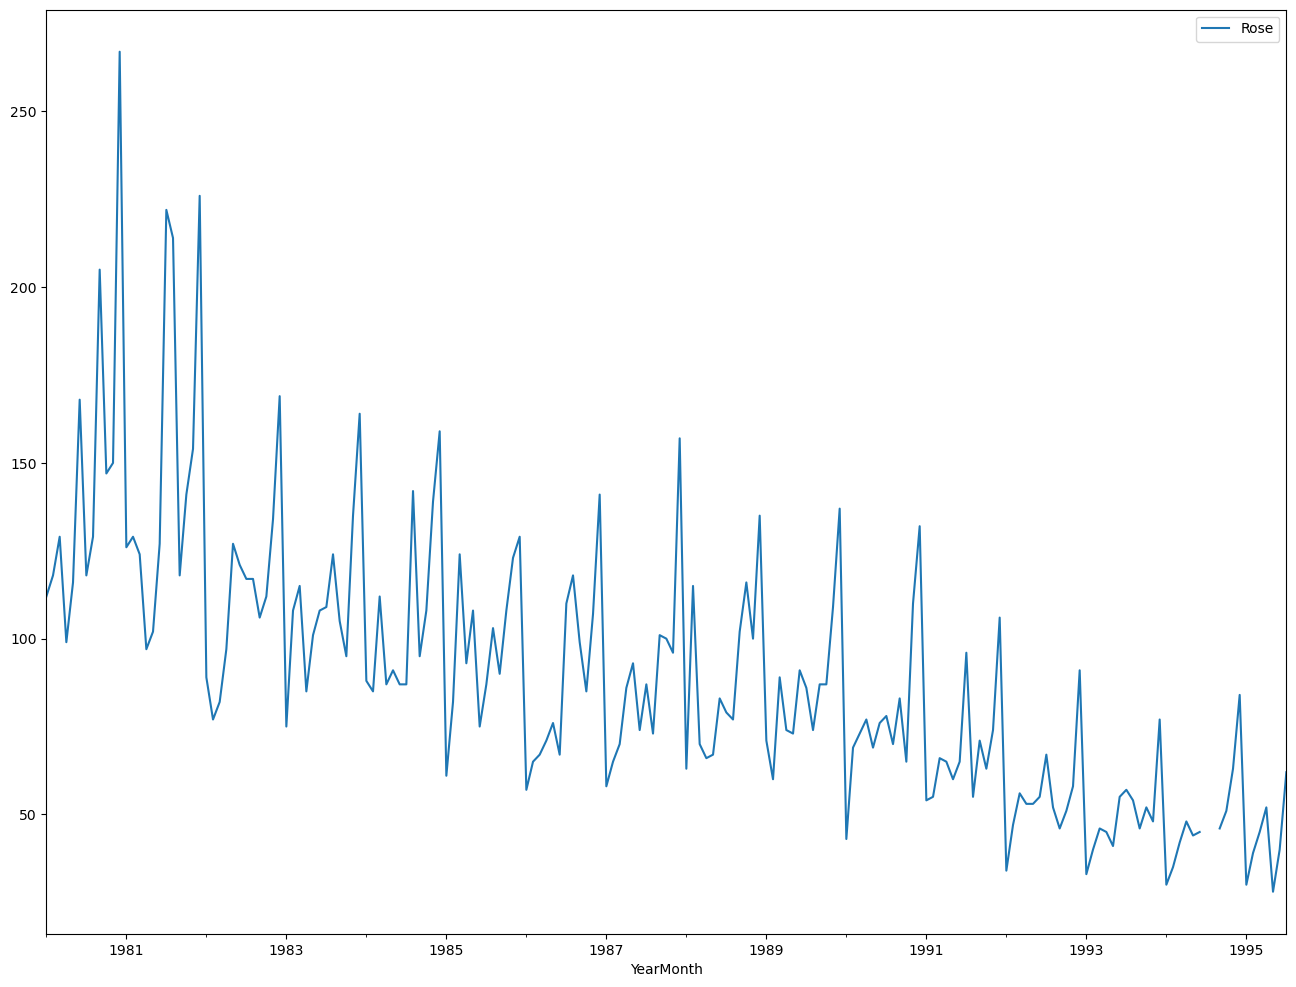

In [270]:
df_Rose.plot();


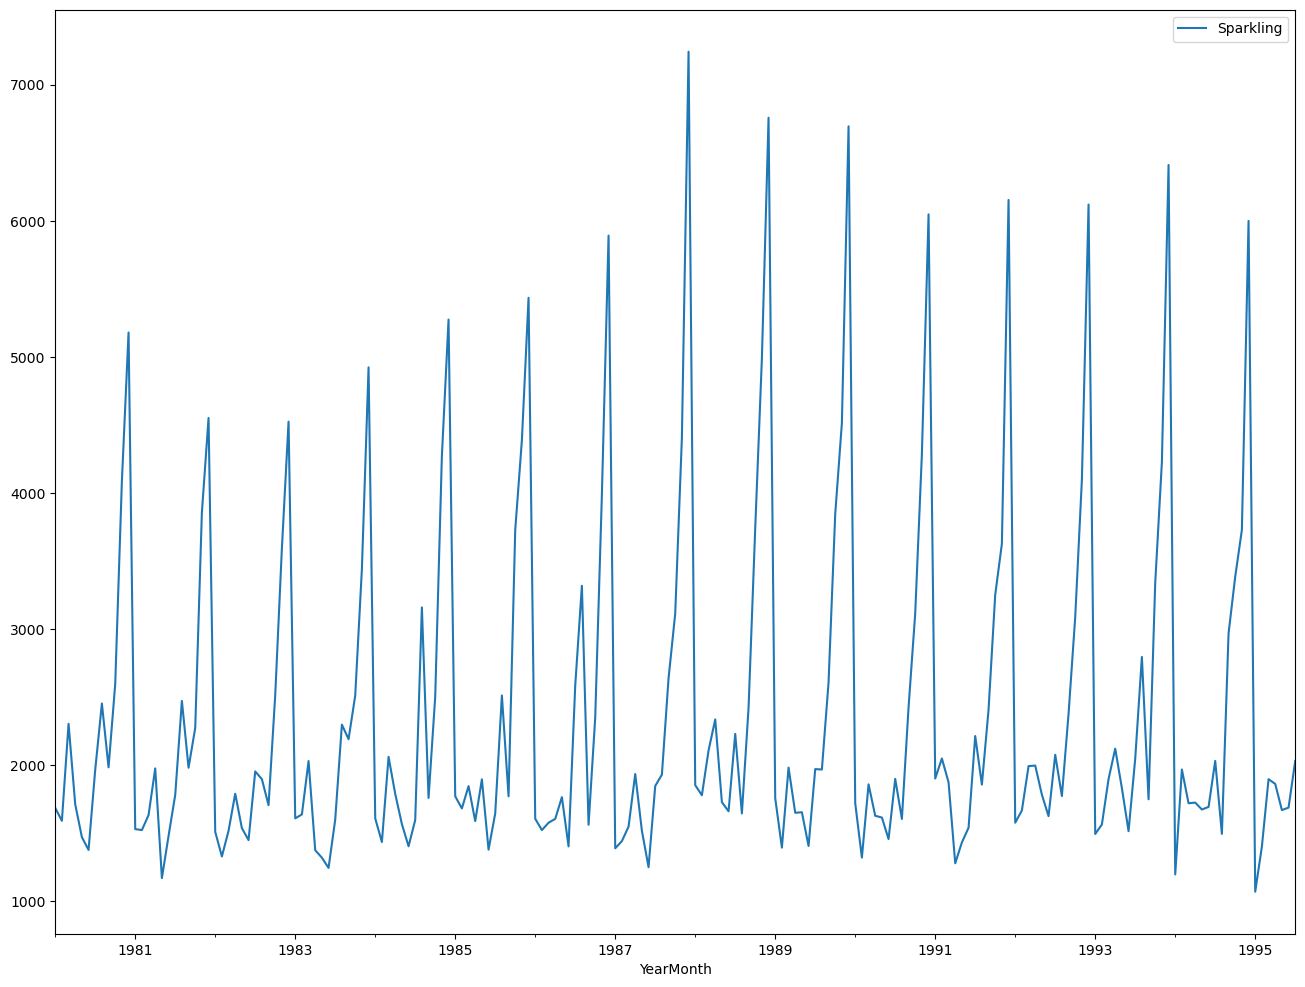

In [271]:
df_Sparkling.plot();

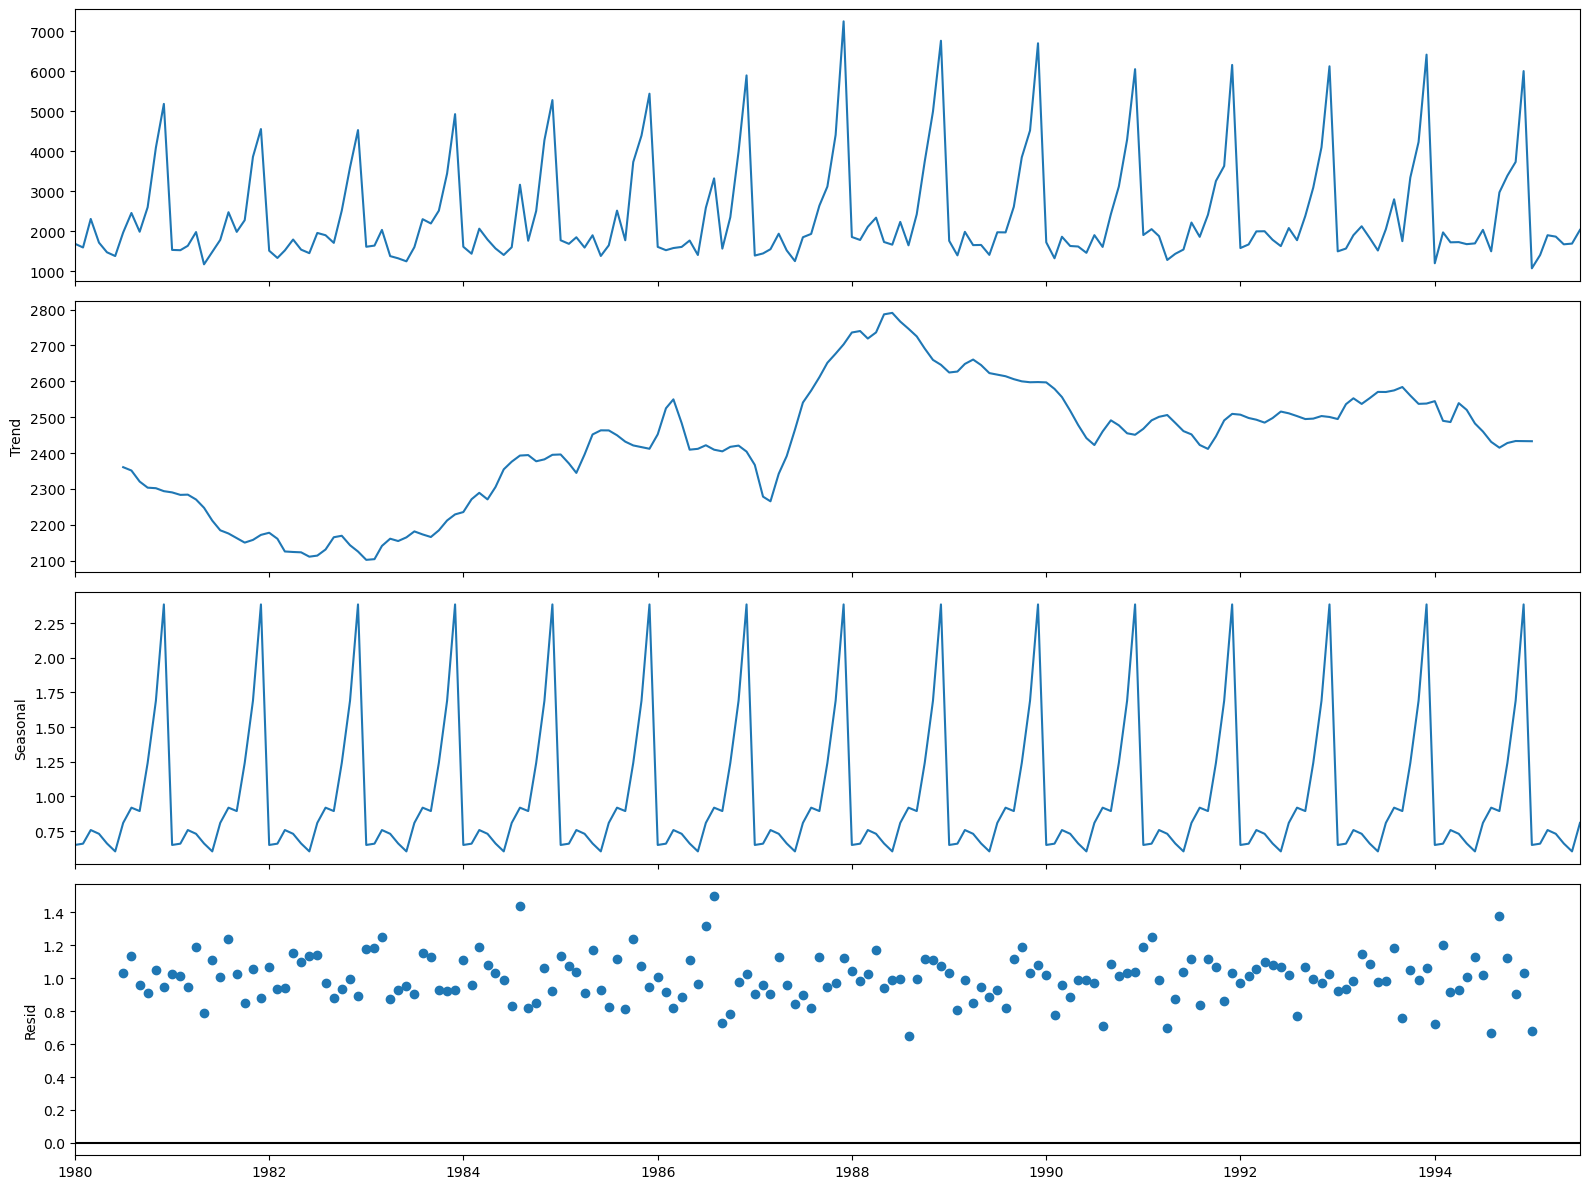

In [272]:
decomposition1 = seasonal_decompose(df_Sparkling,model='multiplicative')
decomposition1.plot();

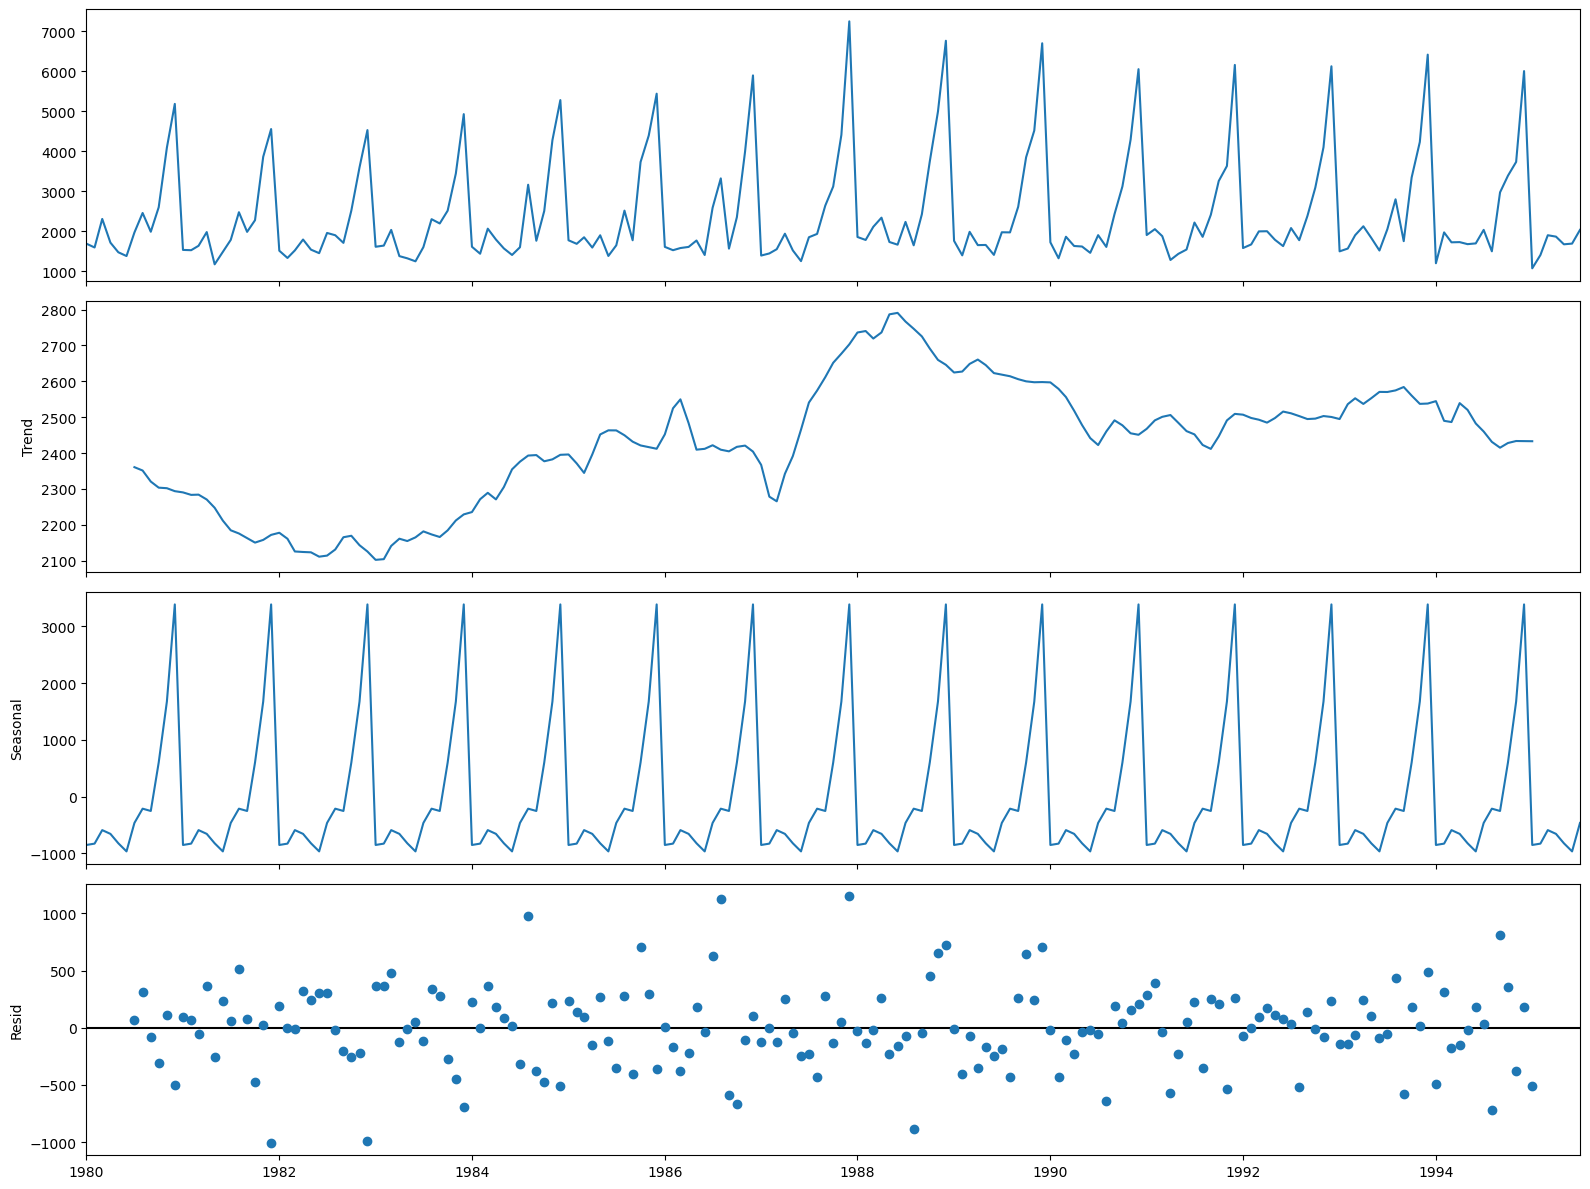

In [273]:
decomposition1 = seasonal_decompose(df_Sparkling,model='additive')
decomposition1.plot();

In [274]:
df_Rose = df_Rose.interpolate(method = 'polynomial', order =3)

## After treating the missing values

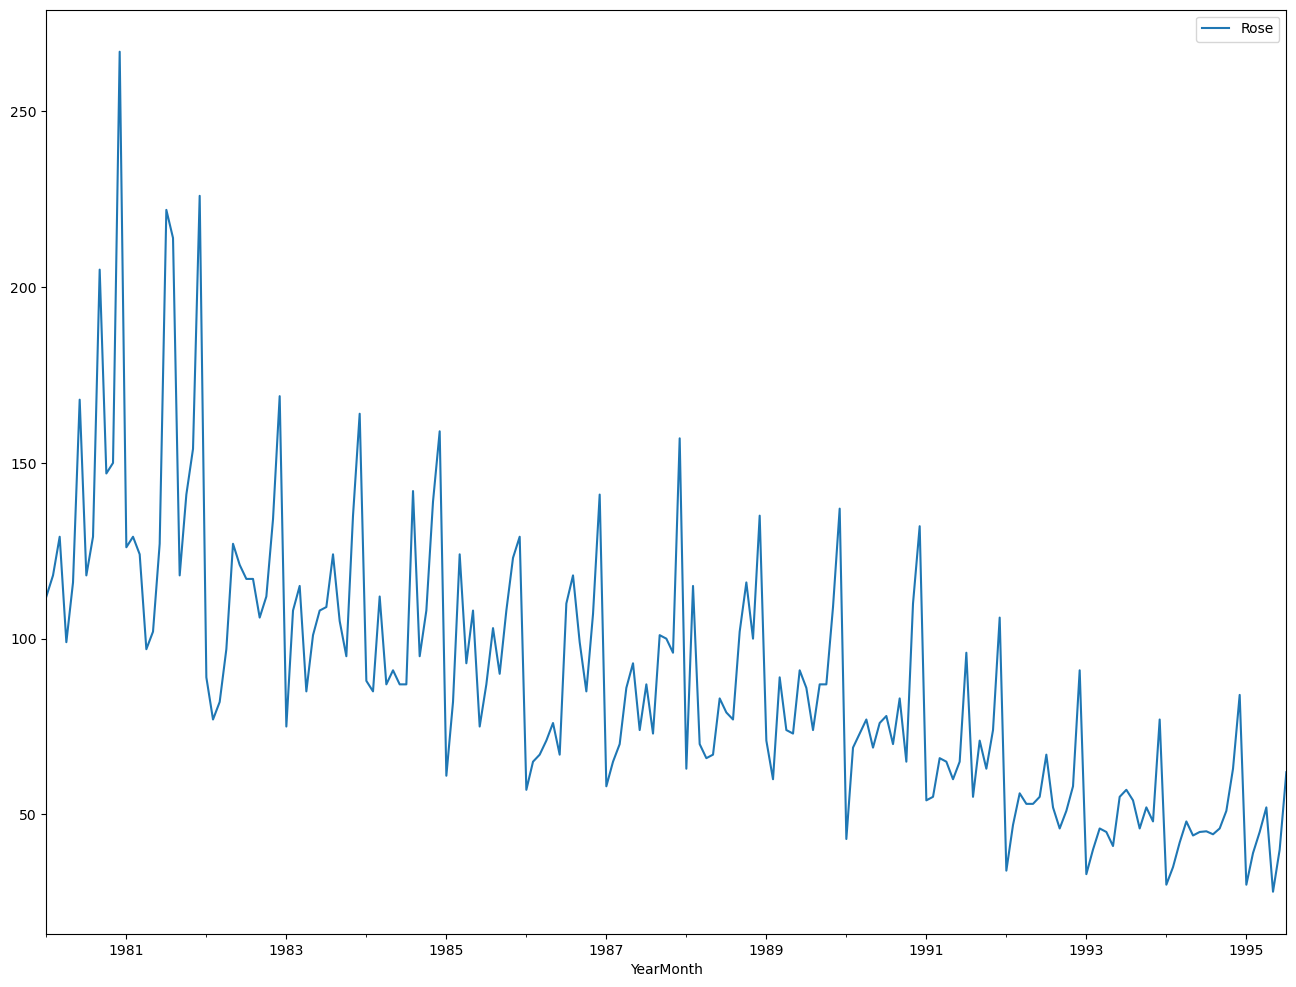

In [275]:
df_Rose.plot();


In [276]:
df_Rose.isnull().sum()

Rose    0
dtype: int64

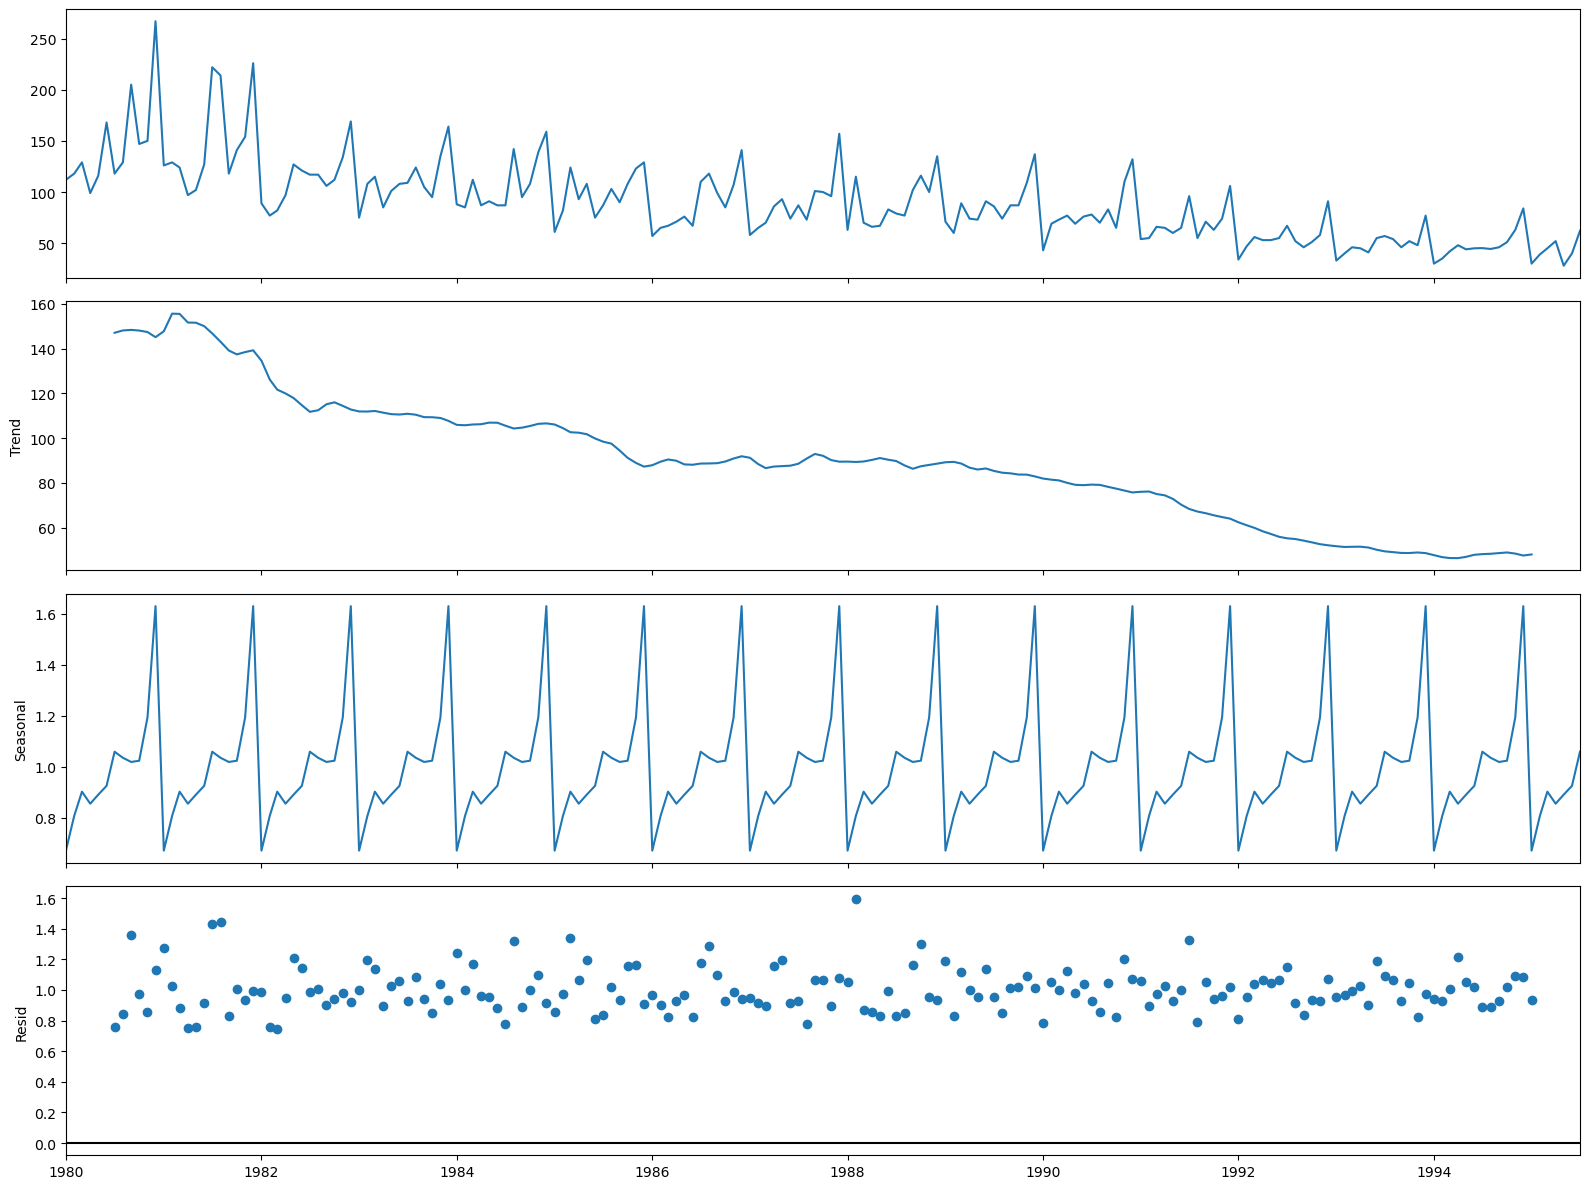

In [277]:
decomposition2 = seasonal_decompose(df_Rose,model='multiplicative')
decomposition2.plot();

## While using Multiplicative seasonality ,the errors are less 

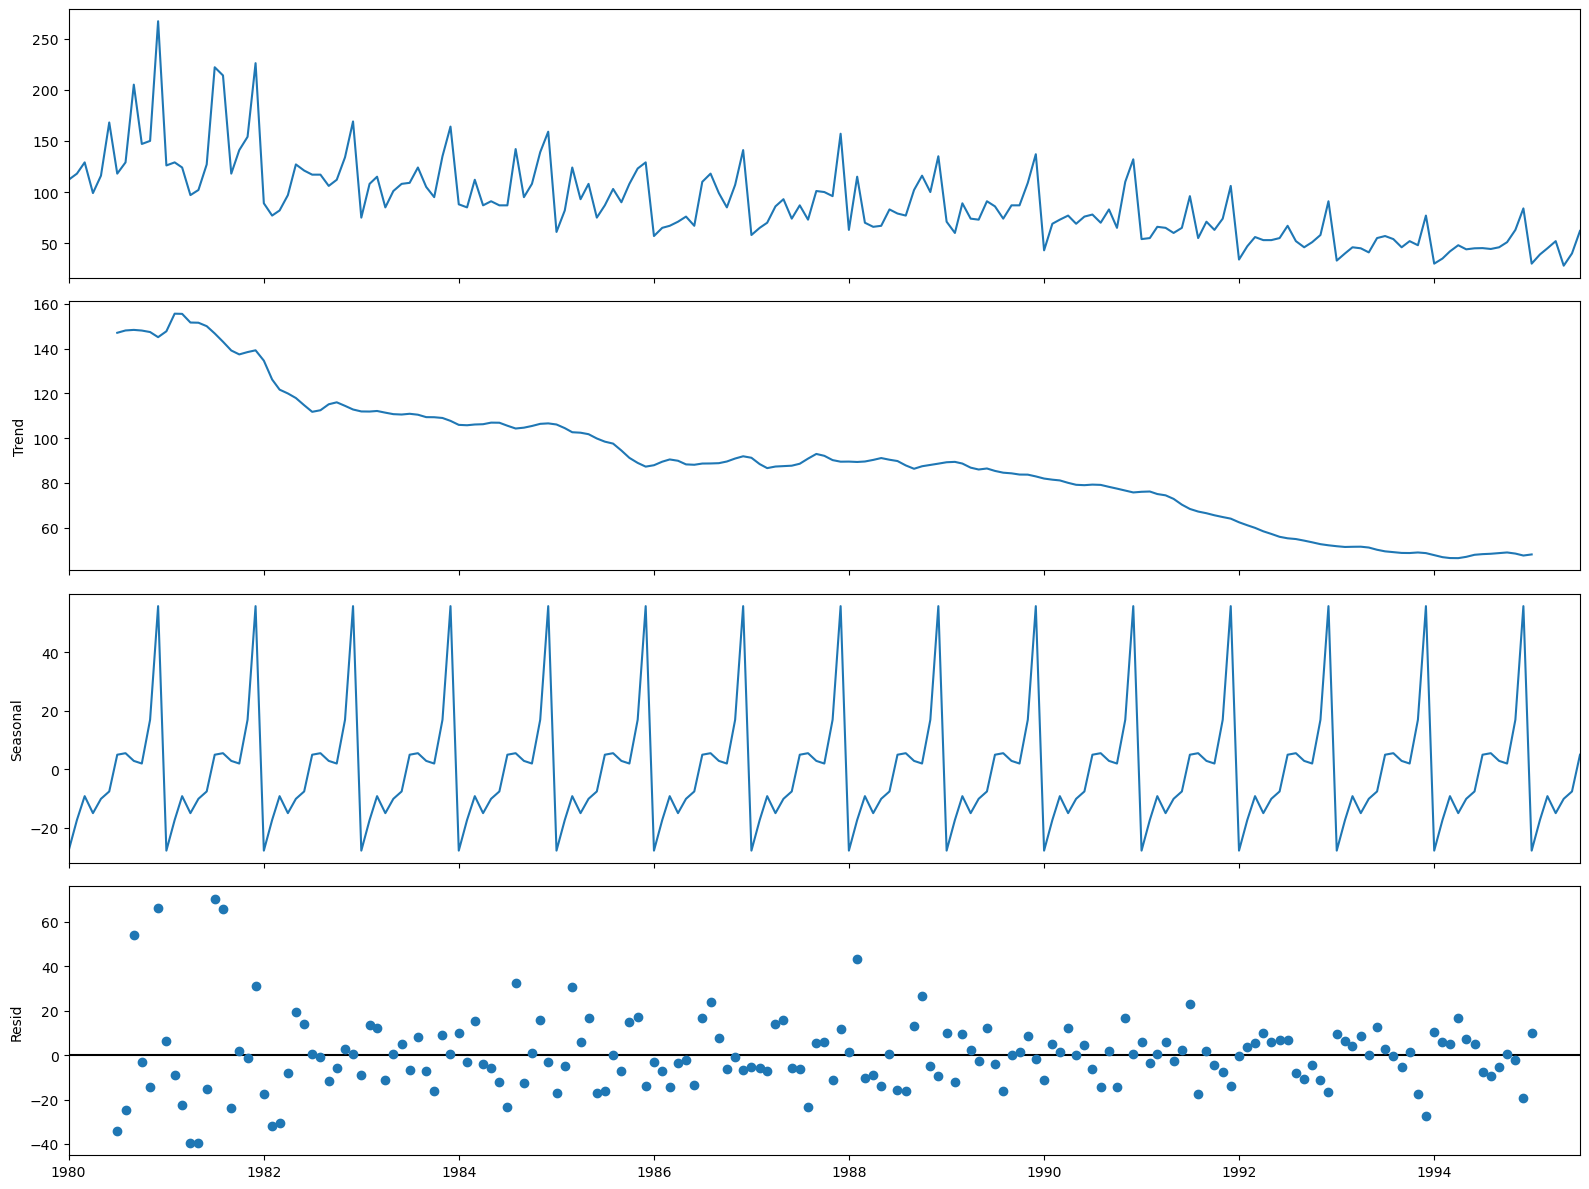

In [278]:
decomposition2 = seasonal_decompose(df_Rose,model='additive')
decomposition2.plot();

## EDA

### Rose Wine

In [279]:
df_Rose.describe()

Rose
count  187.000000
mean    89.906608
std     39.247329
min     28.000000
25%     62.500000
50%     85.000000
75%    111.000000
max    267.000000

In [280]:
df_Rose1=df_Rose.copy()

In [281]:
df_Rose['month'] = df_Rose.index.month

In [282]:
import calendar

In [283]:
df_Rose['month'] = df_Rose['month'].apply(lambda x: calendar.month_abbr[x]) 

In [284]:
df_Rose.head()

Rose month
YearMonth              
1980-01-01  112.0   Jan
1980-02-01  118.0   Feb
1980-03-01  129.0   Mar
1980-04-01   99.0   Apr
1980-05-01  116.0   May

In [285]:
df_Rose['year'] = df_Rose.index.year

In [286]:
month_order = df_Rose.groupby('month')['Rose'].median().sort_values(ascending=False).index


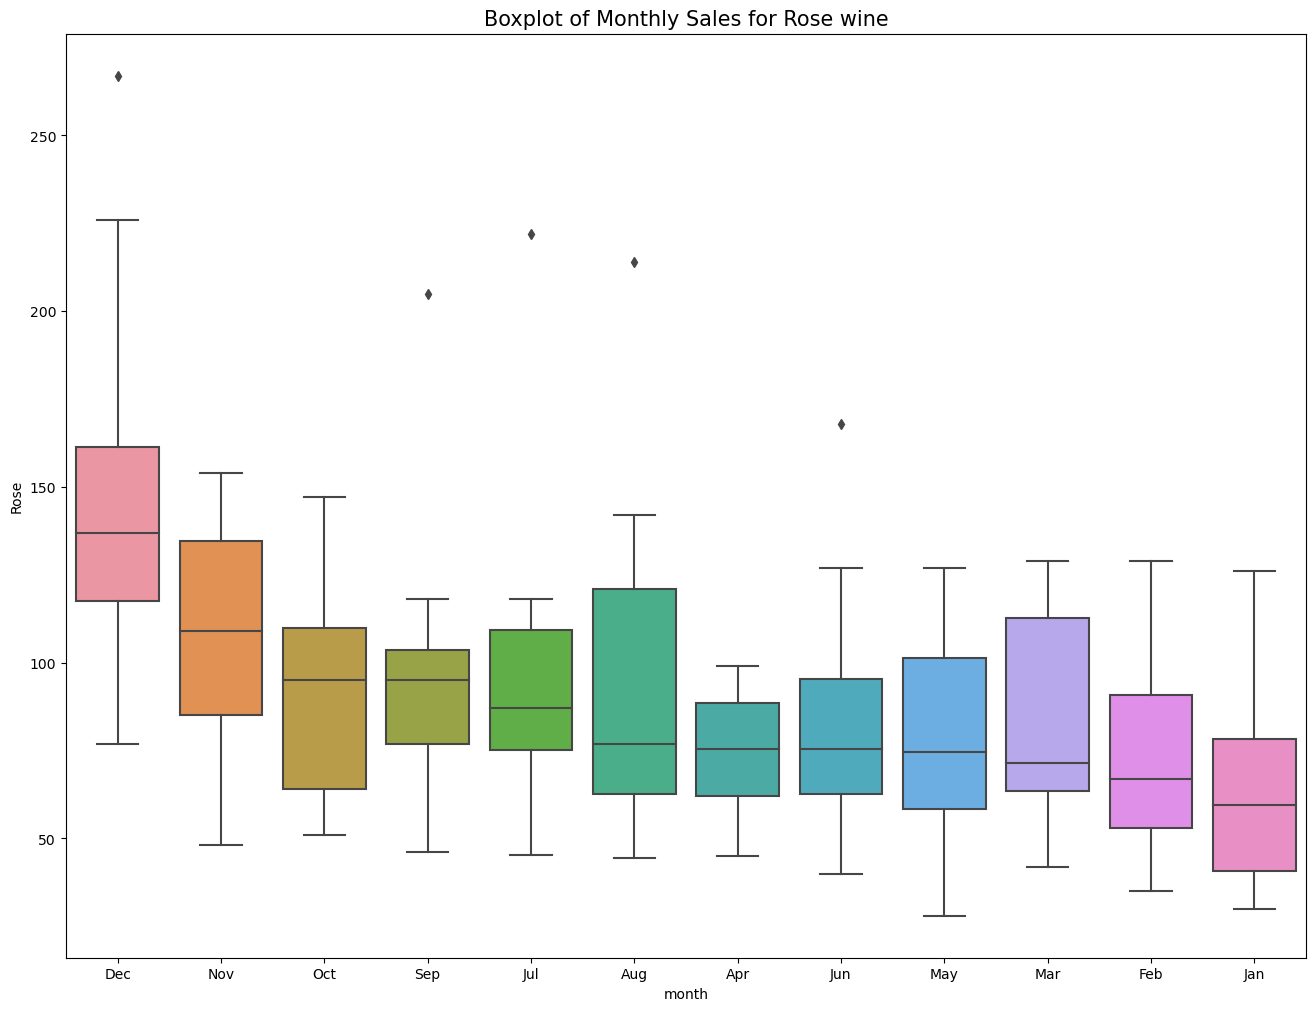

In [287]:
sns.boxplot(x =df_Rose['month'],y=df_Rose['Rose'],order=month_order)
plt.title('Boxplot of Monthly Sales for Rose wine',fontsize=15);

In [288]:
year_order=df_Rose.groupby('year')['Rose'].median().sort_values(ascending=False).index

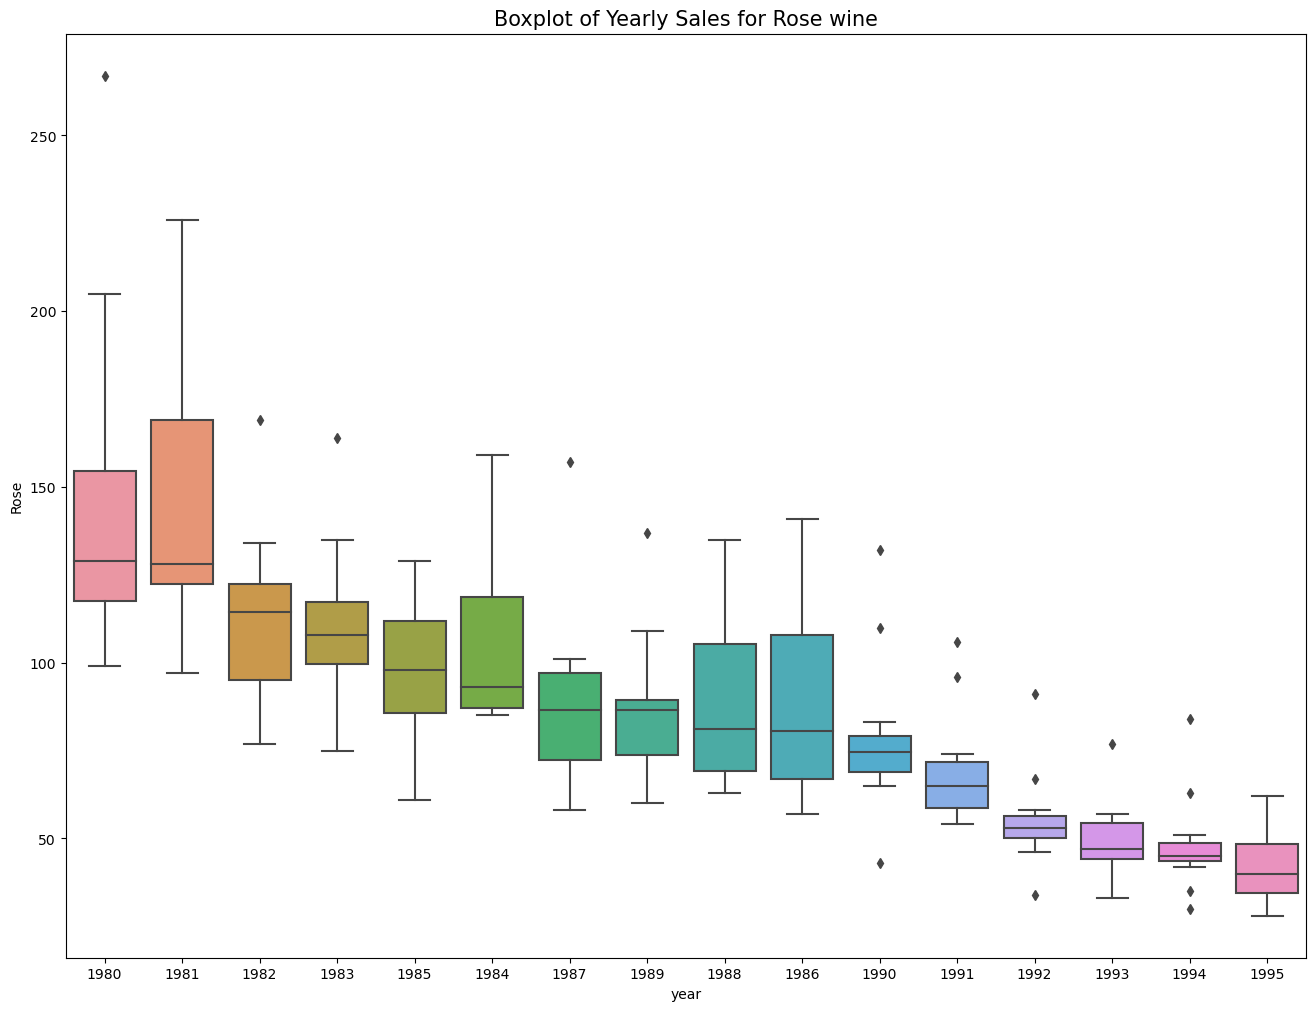

In [289]:
sns.boxplot(x =df_Rose['year'],y=df_Rose['Rose'],order=year_order)
plt.title('Boxplot of Yearly Sales for Rose wine',fontsize=15);

In [290]:
pivot1=pd.pivot_table(df_Rose,values = "Rose", columns = "year", index = "month")
pivot1 = pivot1.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
pivot1

year    1980   1981   1982   1983   1984   1985   1986   1987   1988   1989  \
month                                                                         
Jan    112.0  126.0   89.0   75.0   88.0   61.0   57.0   58.0   63.0   71.0   
Feb    118.0  129.0   77.0  108.0   85.0   82.0   65.0   65.0  115.0   60.0   
Mar    129.0  124.0   82.0  115.0  112.0  124.0   67.0   70.0   70.0   89.0   
Apr     99.0   97.0   97.0   85.0   87.0   93.0   71.0   86.0   66.0   74.0   
May    116.0  102.0  127.0  101.0   91.0  108.0   76.0   93.0   67.0   73.0   
Jun    168.0  127.0  121.0  108.0   87.0   75.0   67.0   74.0   83.0   91.0   
Jul    118.0  222.0  117.0  109.0   87.0   87.0  110.0   87.0   79.0   86.0   
Aug    129.0  214.0  117.0  124.0  142.0  103.0  118.0   73.0   77.0   74.0   
Sep    205.0  118.0  106.0  105.0   95.0   90.0   99.0  101.0  102.0   87.0   
Oct    147.0  141.0  112.0   95.0  108.0  108.0   85.0  100.0  116.0   87.0   
Nov    150.0  154.0  134.0  135.0  139.0  123.0  107.0   96.0  100.0  109.0   
Dec    267.0  226.0  169.0  164.0  159.0  129.0  141.0  157.0  135.0  137.0   

year    1990   1991  1992  1993       1994  1995  
month                                             
Jan     43.0   54.0  34.0  33.0  30.000000  30.0  
Feb     69.0   55.0  47.0  40.0  35.000000  39.0  
Mar     73.0   66.0  56.0  46.0  42.000000  45.0  
Apr     77.0   65.0  53.0  45.0  48.000000  52.0  
May     69.0   60.0  53.0  41.0  44.000000  28.0  
Jun     76.0   65.0  55.0  55.0  45.000000  40.0  
Jul     78.0   96.0  67.0  57.0  45.191702  62.0  
Aug     70.0   55.0  52.0  54.0  44.343965   NaN  
Sep     83.0   71.0  46.0  46.0  46.000000   NaN  
Oct     65.0   63.0  51.0  52.0  51.000000   NaN  
Nov    110.0   74.0  58.0  48.0  63.000000   NaN  
Dec    132.0  106.0  91.0  77.0  84.000000   NaN

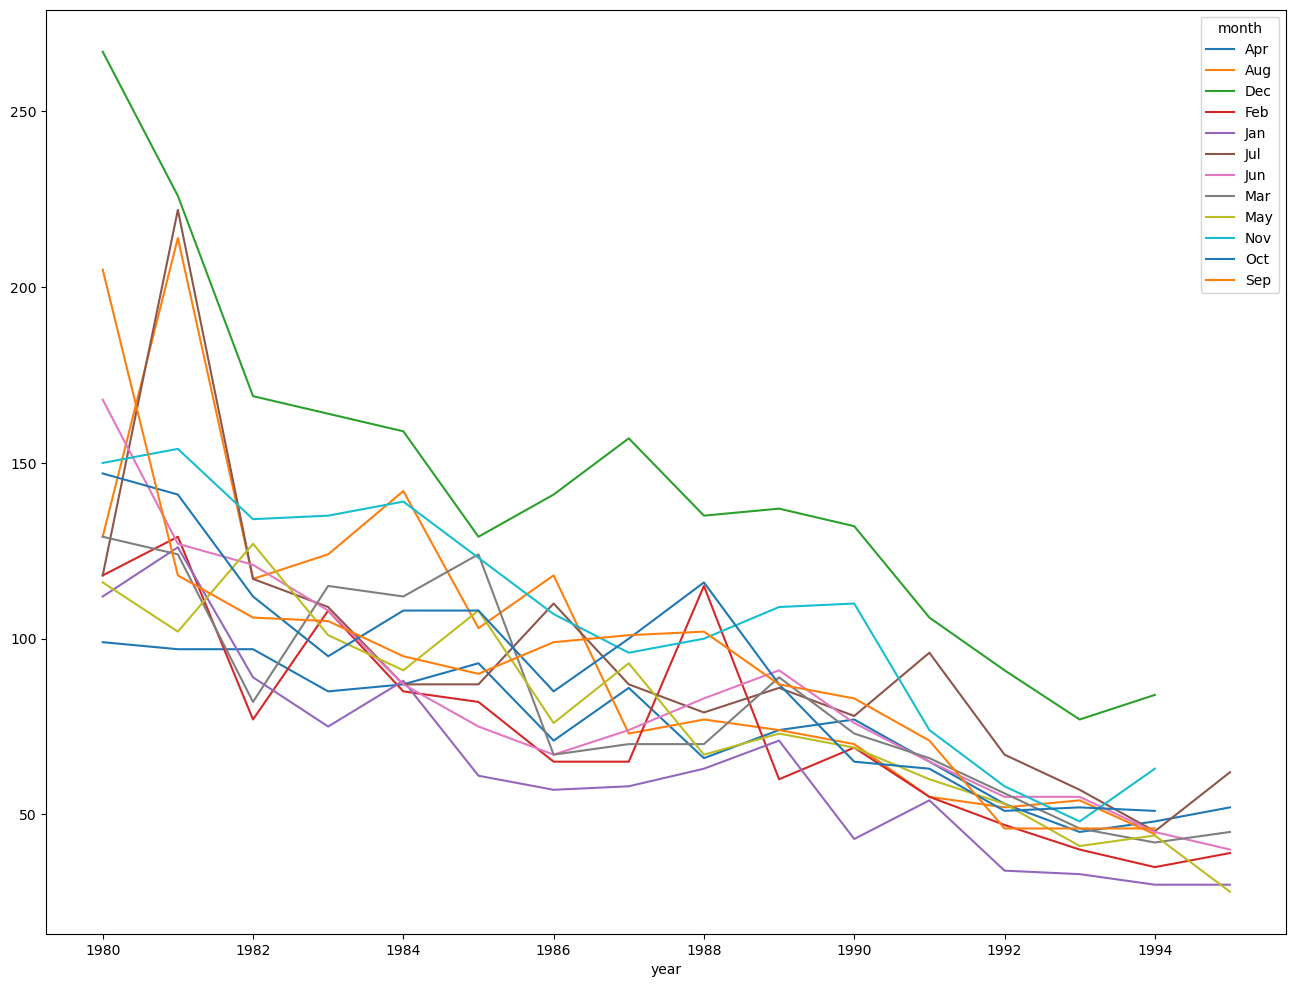

In [291]:
pivot2=pd.pivot_table(df_Rose,values = "Rose", columns = "month", index = "year")
pivot2.plot();

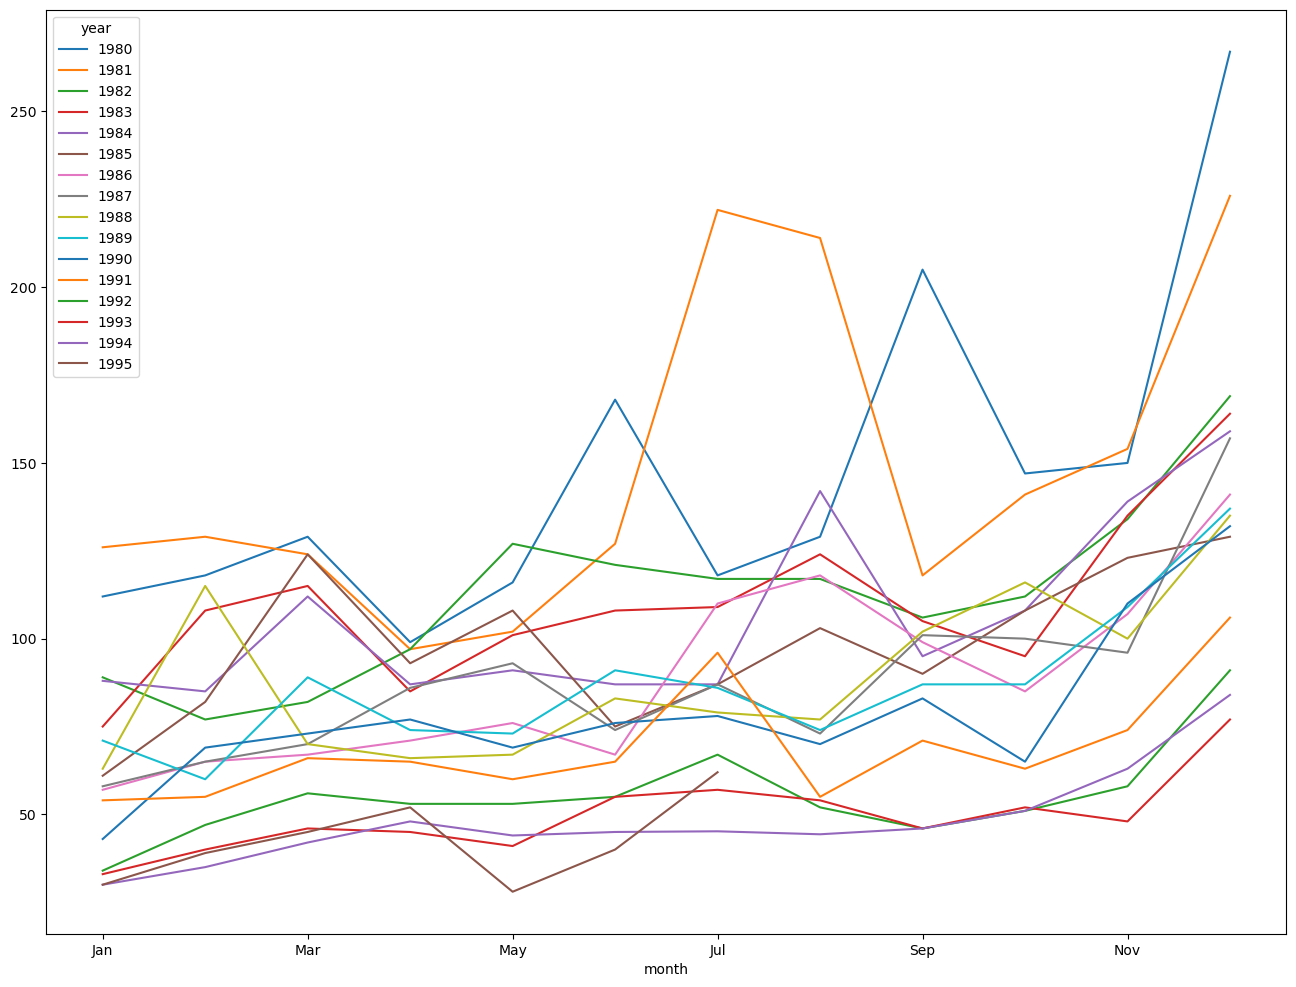

In [292]:
pivot1.plot();

C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


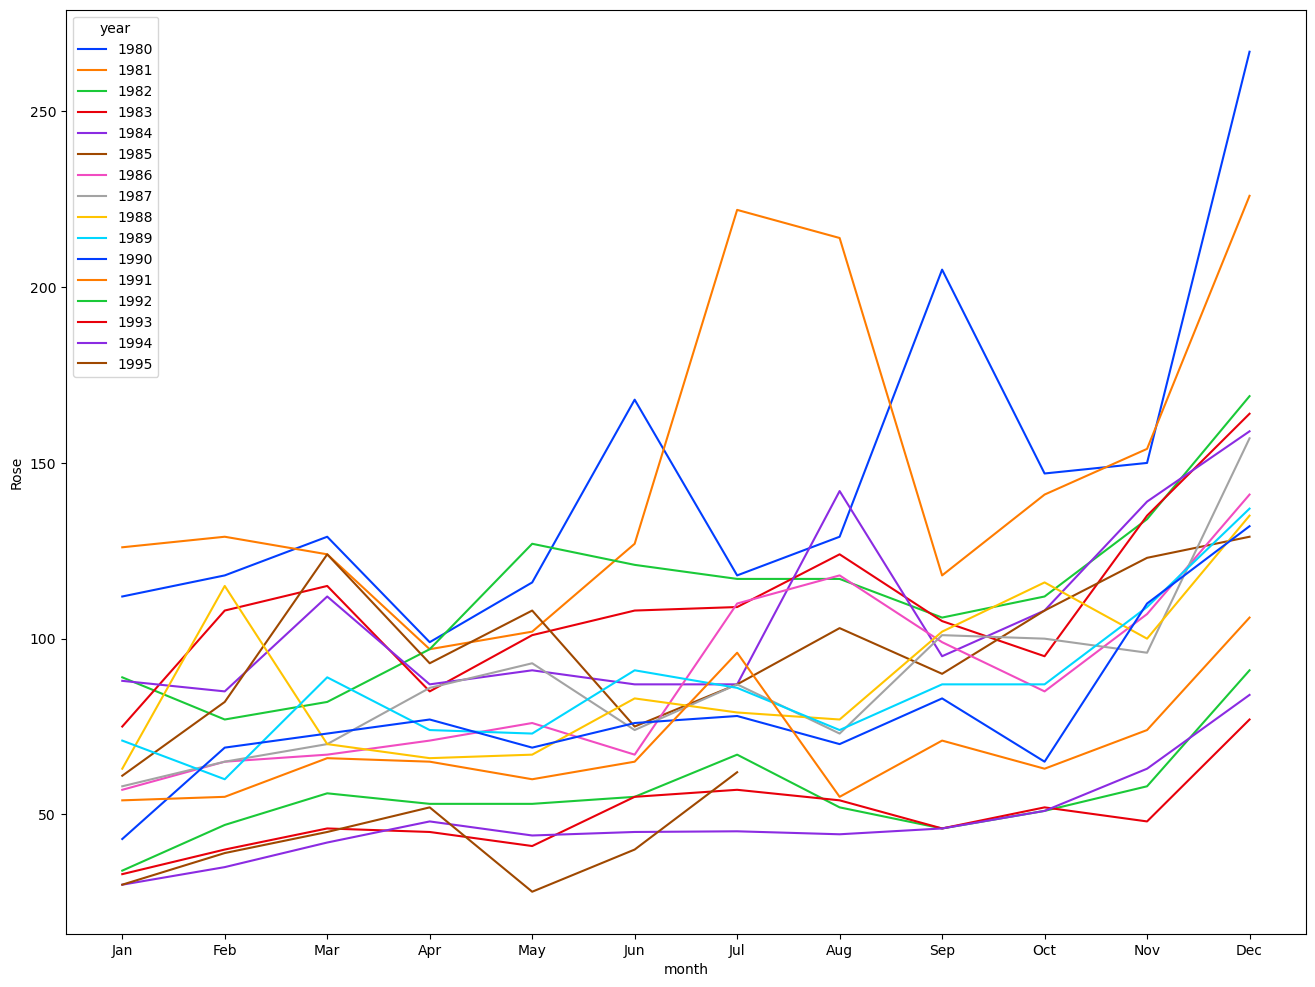

In [293]:
sns.lineplot(data=df_Rose,x='month',y='Rose',hue='year',palette="bright");

C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


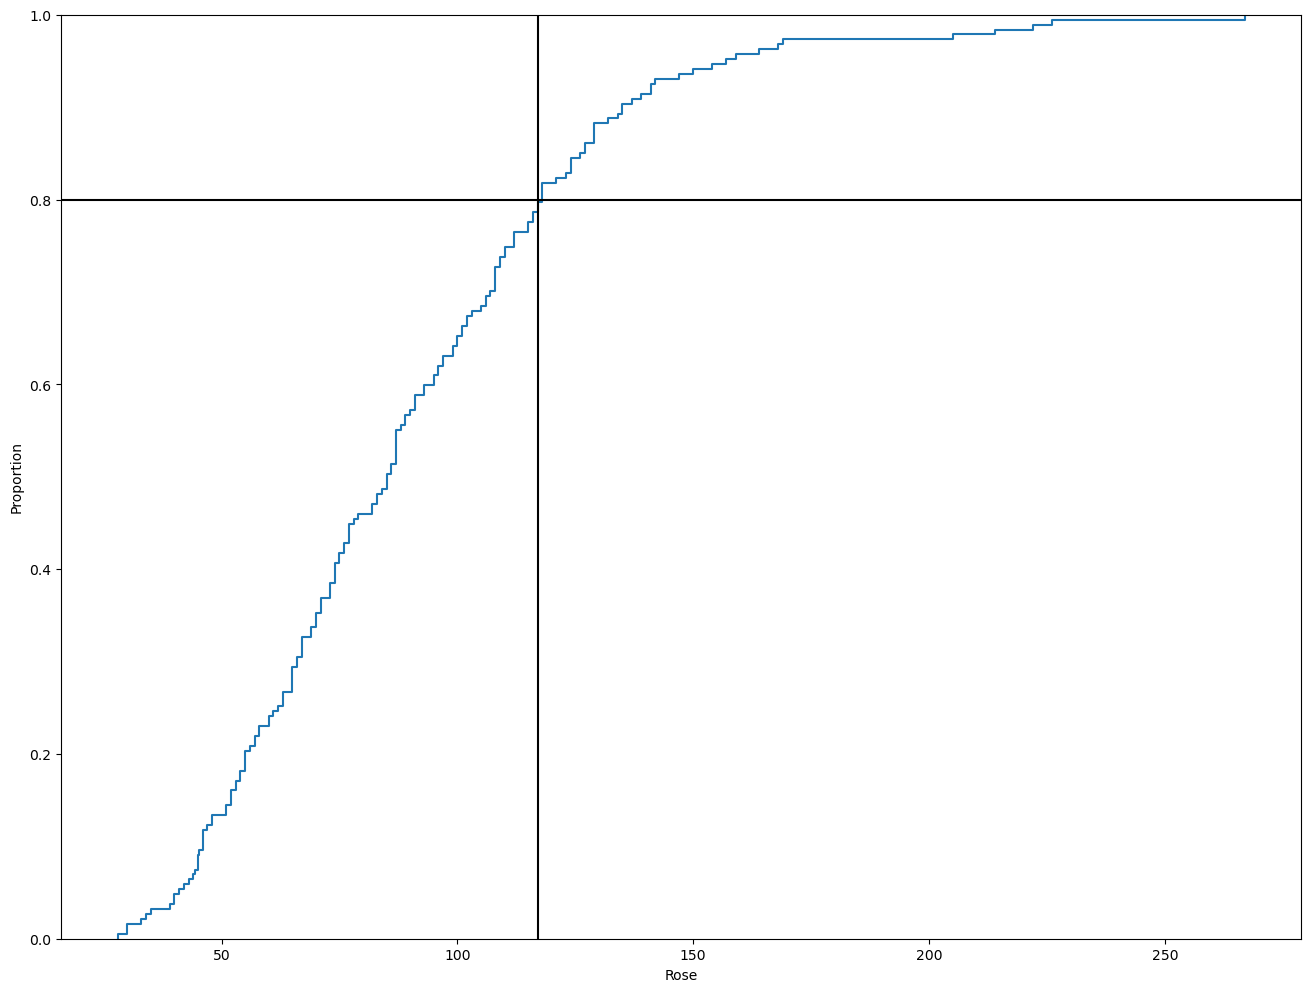

In [294]:
sns.ecdfplot(data=df_Rose,x='Rose')
plt.axhline(0.8,c='black')
plt.axvline(117,c='black');

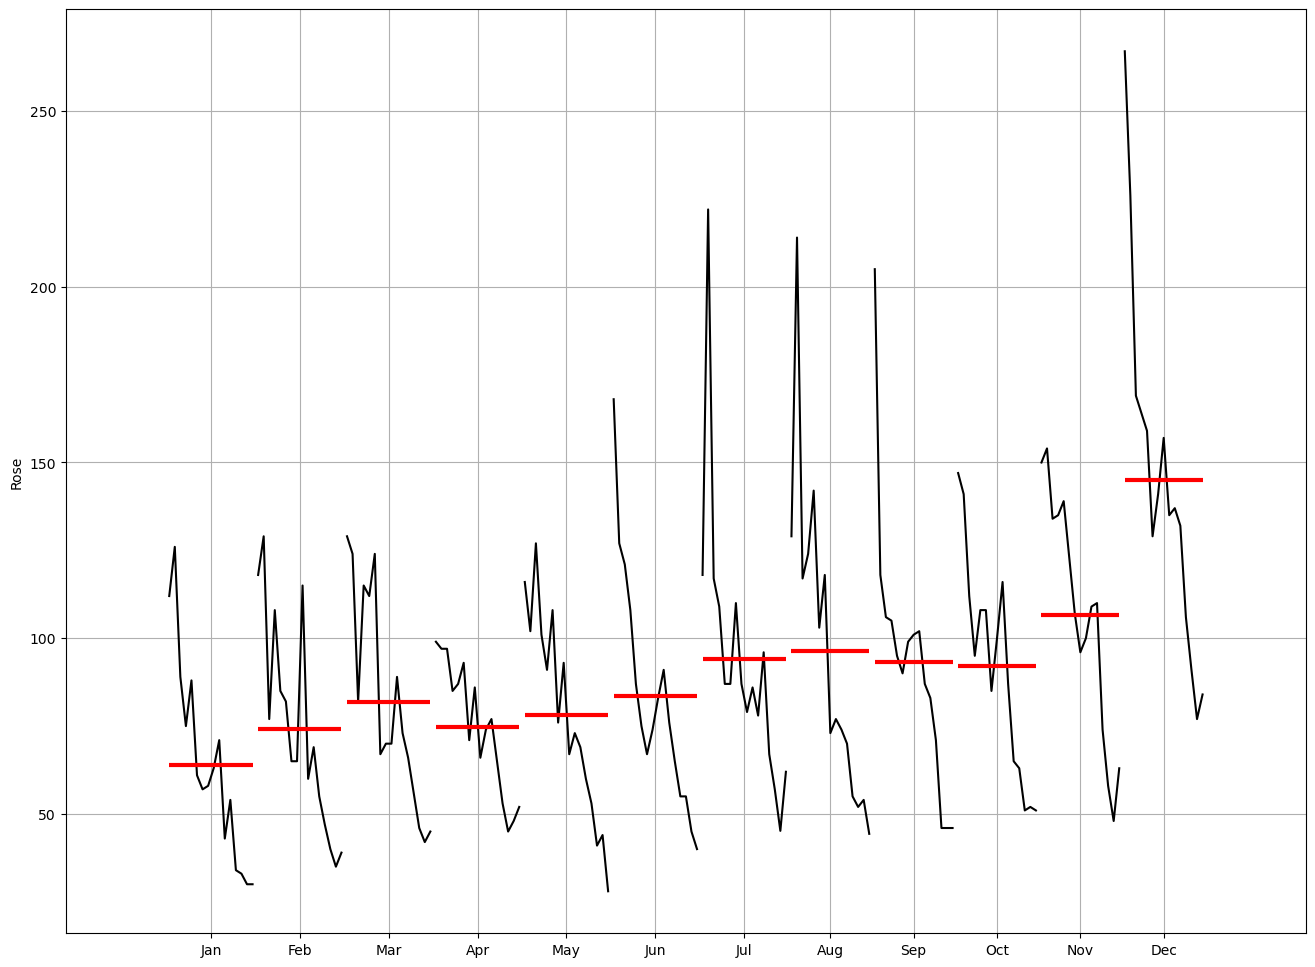

In [295]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df_Rose['Rose'],ylabel='Rose')
plt.grid();

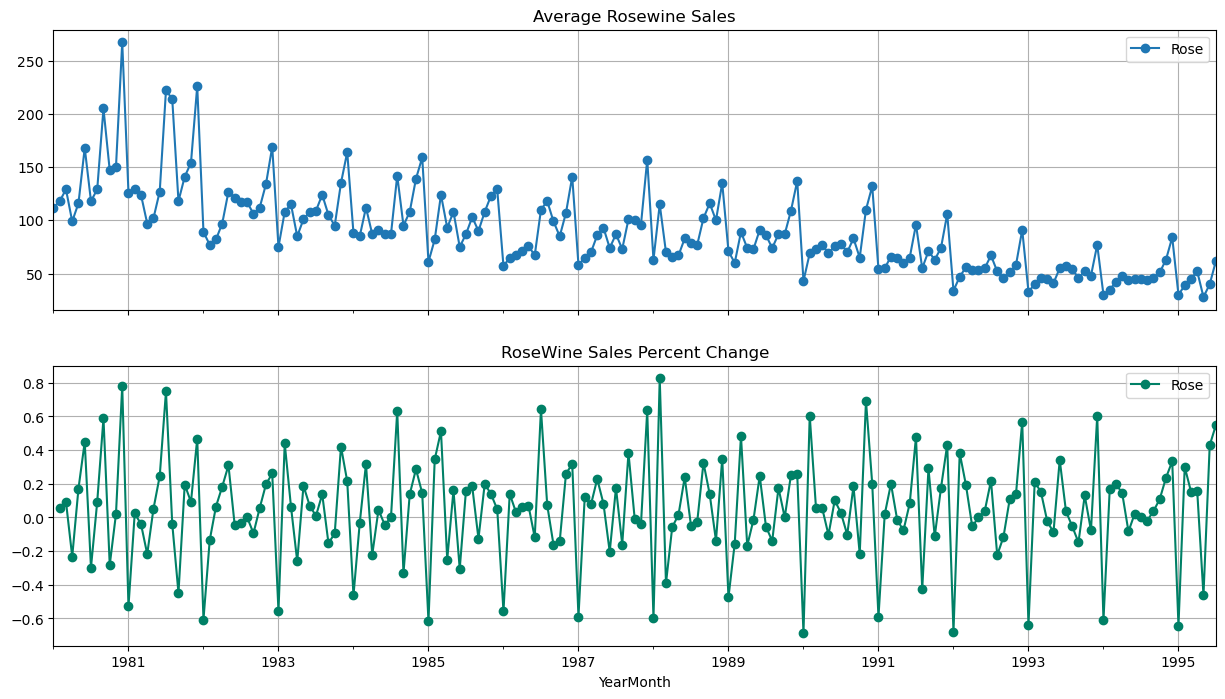

In [296]:
Average    = df_Rose.groupby(df_Rose.index)["Rose"].mean()
pct_change = df_Rose.groupby(df_Rose.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))
ax1 = Average.plot(legend=True,ax=axis1,marker='o',title="Average Rosewine Sales",grid=True)
ax1.set_xticks(range(len(Average)))
ax1.set_xticklabels(Average.index.tolist())
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="RoseWine Sales Percent Change",grid=True)

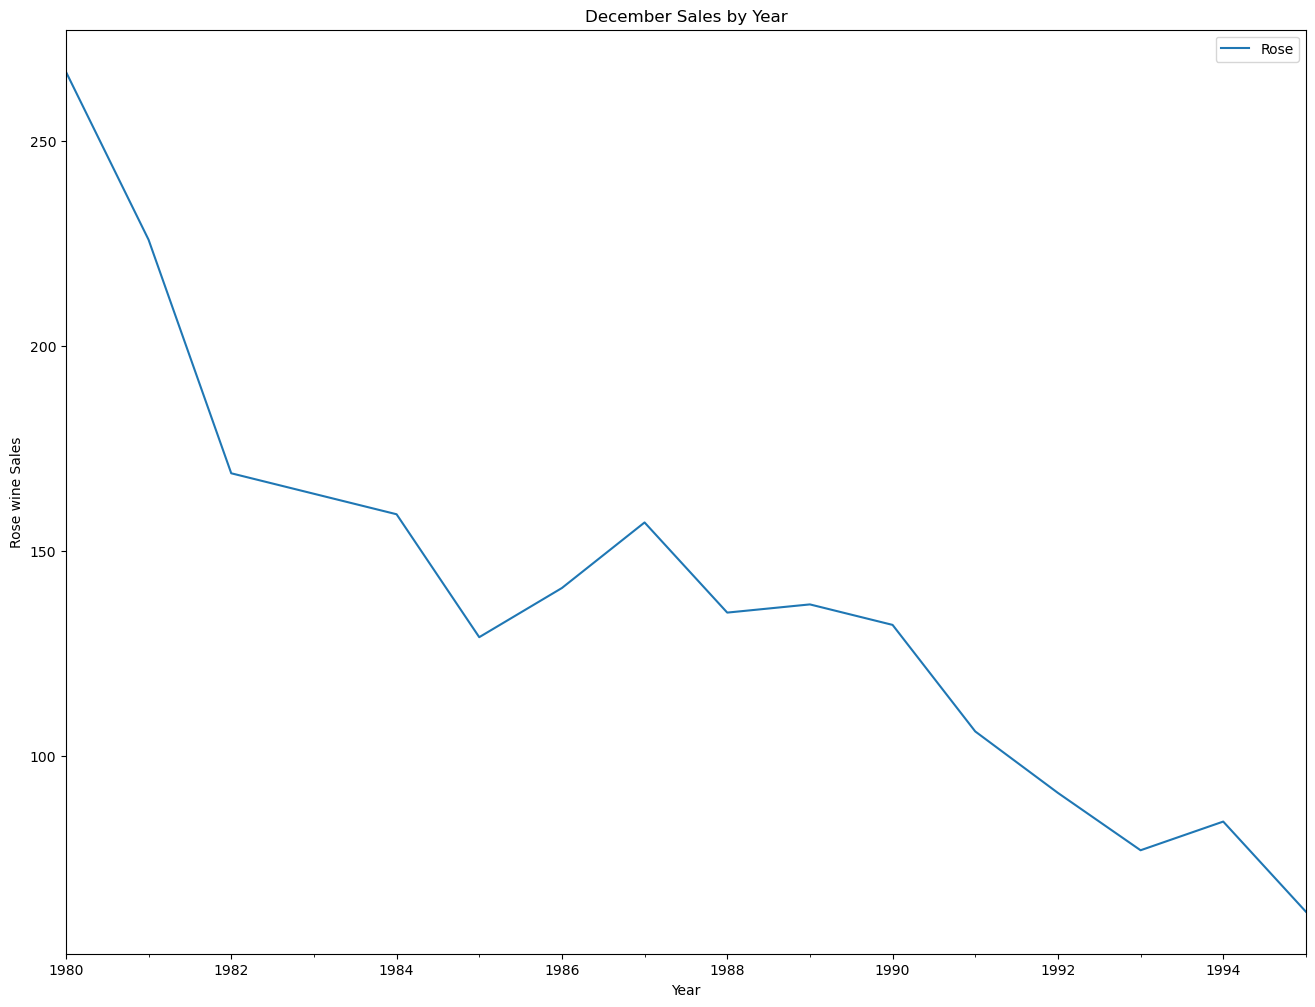

In [297]:
df_Rose1.resample(rule='A').max().plot()
plt.title('December Sales by Year')
plt.xlabel('Year',fontsize=10)
plt.ylabel('Rose wine Sales',fontsize=10);

### From the box plot, we observed that December had the highest sales every year. However, if we break it down further, we see that the sales for this most profitable month have been decreasing each year.

## Sparkling wine

In [298]:
df_Sparkling1=df_Sparkling.copy()

In [299]:
df_Sparkling1.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [300]:
df_Sparkling['Month']=df_Sparkling.index.month
df_Sparkling['Month'] = df_Sparkling['Month'].apply(lambda x: calendar.month_abbr[x])
df_Sparkling['Year']=df_Sparkling.index.year

In [301]:
df_Sparkling.head()

Sparkling Month  Year
YearMonth                        
1980-01-01       1686   Jan  1980
1980-02-01       1591   Feb  1980
1980-03-01       2304   Mar  1980
1980-04-01       1712   Apr  1980
1980-05-01       1471   May  1980

In [302]:
month_order1=df_Sparkling.groupby('Month')['Sparkling'].median().sort_values(ascending=False).index

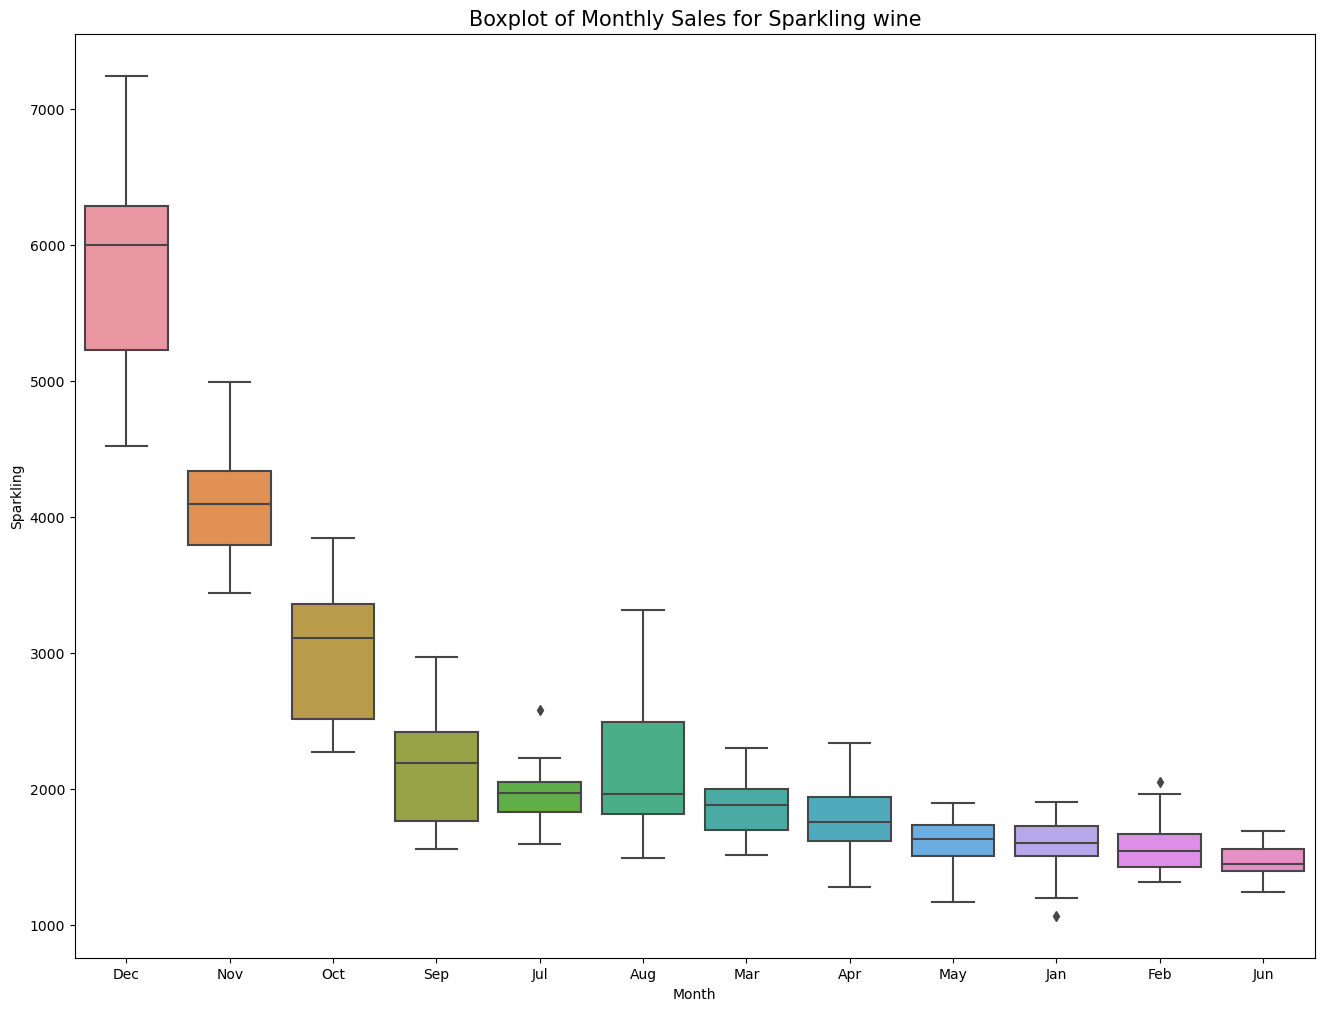

In [303]:
sns.boxplot(x =df_Sparkling['Month'],y=df_Sparkling['Sparkling'],order=month_order1)
plt.title('Boxplot of Monthly Sales for Sparkling wine',fontsize=15);

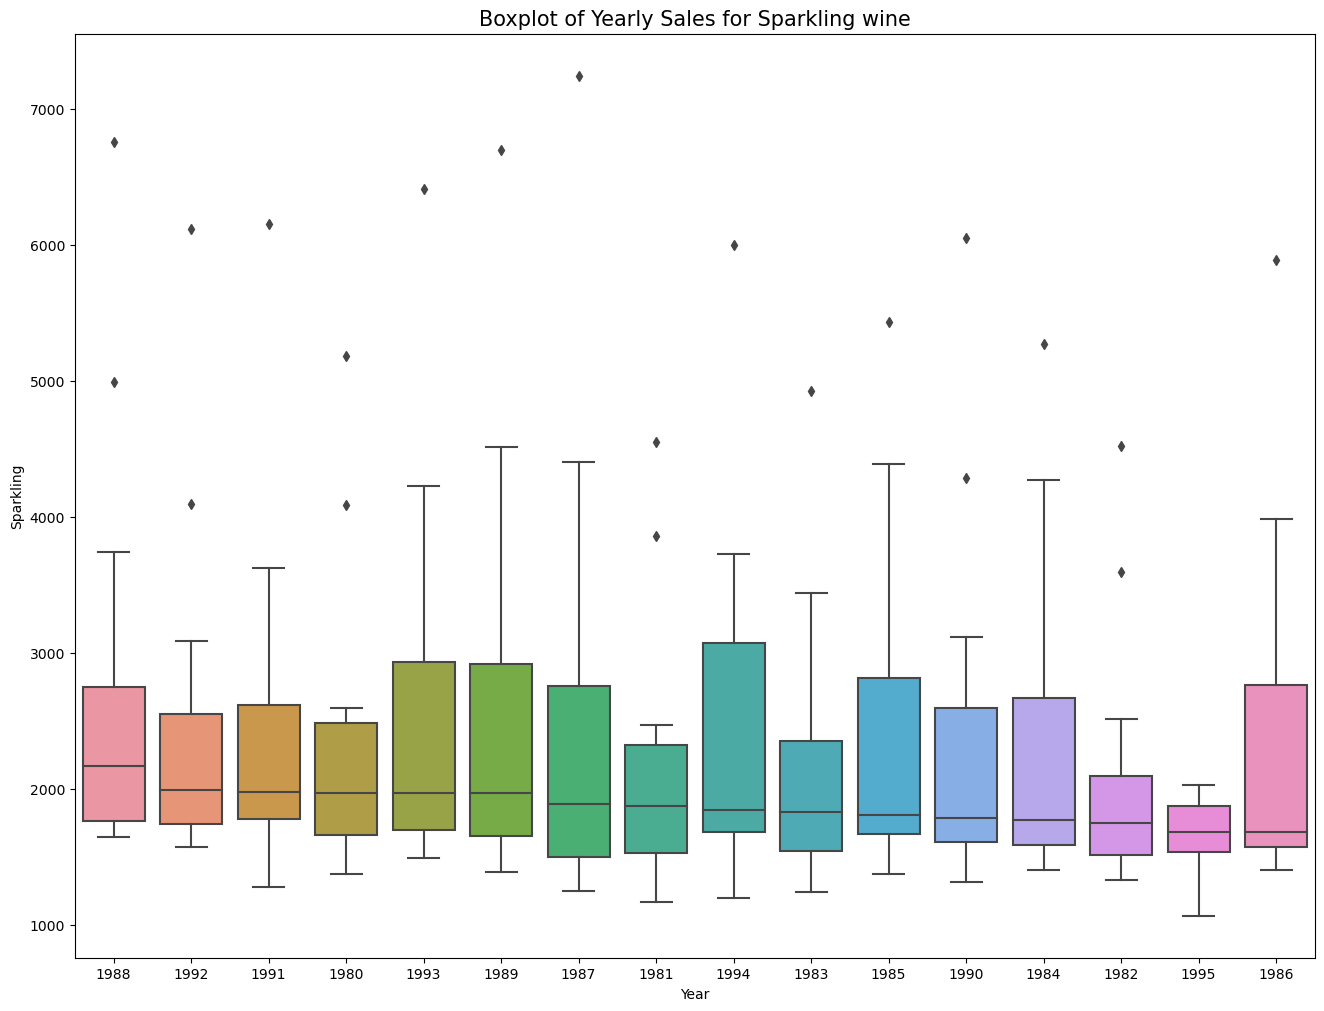

In [304]:
year_order1=df_Sparkling.groupby('Year')['Sparkling'].median().sort_values(ascending=False).index
sns.boxplot(x =df_Sparkling['Year'],y=df_Sparkling['Sparkling'],order=year_order1)
plt.title('Boxplot of Yearly Sales for Sparkling wine',fontsize=15);

## From the boxplot it is clear that,the sales follows no trend whereas the seasonality has a significant effect.

In [305]:
pivot3=pd.pivot_table(df_Sparkling,values = "Sparkling", columns = "Year", index = "Month")
pivot3 = pivot3.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
pivot3

Year     1980    1981    1982    1983    1984    1985    1986    1987    1988  \
Month                                                                           
Jan    1686.0  1530.0  1510.0  1609.0  1609.0  1771.0  1606.0  1389.0  1853.0   
Feb    1591.0  1523.0  1329.0  1638.0  1435.0  1682.0  1523.0  1442.0  1779.0   
Mar    2304.0  1633.0  1518.0  2030.0  2061.0  1846.0  1577.0  1548.0  2108.0   
Apr    1712.0  1976.0  1790.0  1375.0  1789.0  1589.0  1605.0  1935.0  2336.0   
May    1471.0  1170.0  1537.0  1320.0  1567.0  1896.0  1765.0  1518.0  1728.0   
Jun    1377.0  1480.0  1449.0  1245.0  1404.0  1379.0  1403.0  1250.0  1661.0   
Jul    1966.0  1781.0  1954.0  1600.0  1597.0  1645.0  2584.0  1847.0  2230.0   
Aug    2453.0  2472.0  1897.0  2298.0  3159.0  2512.0  3318.0  1930.0  1645.0   
Sep    1984.0  1981.0  1706.0  2191.0  1759.0  1771.0  1562.0  2638.0  2421.0   
Oct    2596.0  2273.0  2514.0  2511.0  2504.0  3727.0  2349.0  3114.0  3740.0   
Nov    4087.0  3857.0  3593.0  3440.0  4273.0  4388.0  3987.0  4405.0  4988.0   
Dec    5179.0  4551.0  4524.0  4923.0  5274.0  5434.0  5891.0  7242.0  6757.0   

Year     1989    1990    1991    1992    1993    1994    1995  
Month                                                          
Jan    1757.0  1720.0  1902.0  1577.0  1494.0  1197.0  1070.0  
Feb    1394.0  1321.0  2049.0  1667.0  1564.0  1968.0  1402.0  
Mar    1982.0  1859.0  1874.0  1993.0  1898.0  1720.0  1897.0  
Apr    1650.0  1628.0  1279.0  1997.0  2121.0  1725.0  1862.0  
May    1654.0  1615.0  1432.0  1783.0  1831.0  1674.0  1670.0  
Jun    1406.0  1457.0  1540.0  1625.0  1515.0  1693.0  1688.0  
Jul    1971.0  1899.0  2214.0  2076.0  2048.0  2031.0  2031.0  
Aug    1968.0  1605.0  1857.0  1773.0  2795.0  1495.0     NaN  
Sep    2608.0  2424.0  2408.0  2377.0  1749.0  2968.0     NaN  
Oct    3845.0  3116.0  3252.0  3088.0  3339.0  3385.0     NaN  
Nov    4514.0  4286.0  3627.0  4096.0  4227.0  3729.0     NaN  
Dec    6694.0  6047.0  6153.0  6119.0  6410.0  5999.0     NaN

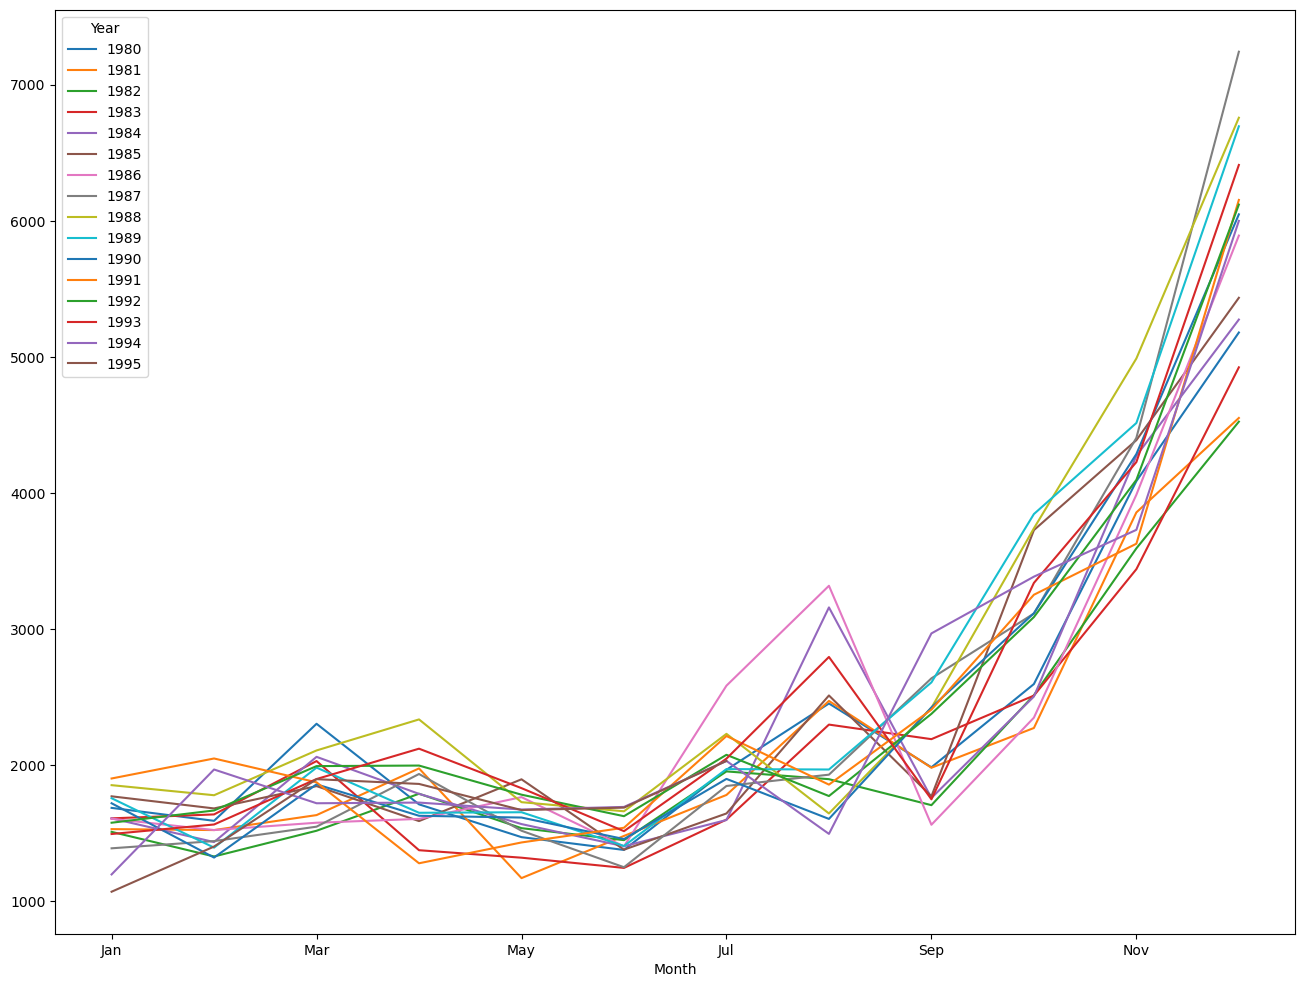

In [306]:
pivot3.plot();

In [307]:
pivot4=pd.pivot_table(df_Sparkling,values = "Sparkling", columns = "Month", index = "Year")
pivot4


Month     Apr     Aug     Dec     Feb     Jan     Jul     Jun     Mar     May  \
Year                                                                            
1980   1712.0  2453.0  5179.0  1591.0  1686.0  1966.0  1377.0  2304.0  1471.0   
1981   1976.0  2472.0  4551.0  1523.0  1530.0  1781.0  1480.0  1633.0  1170.0   
1982   1790.0  1897.0  4524.0  1329.0  1510.0  1954.0  1449.0  1518.0  1537.0   
1983   1375.0  2298.0  4923.0  1638.0  1609.0  1600.0  1245.0  2030.0  1320.0   
1984   1789.0  3159.0  5274.0  1435.0  1609.0  1597.0  1404.0  2061.0  1567.0   
1985   1589.0  2512.0  5434.0  1682.0  1771.0  1645.0  1379.0  1846.0  1896.0   
1986   1605.0  3318.0  5891.0  1523.0  1606.0  2584.0  1403.0  1577.0  1765.0   
1987   1935.0  1930.0  7242.0  1442.0  1389.0  1847.0  1250.0  1548.0  1518.0   
1988   2336.0  1645.0  6757.0  1779.0  1853.0  2230.0  1661.0  2108.0  1728.0   
1989   1650.0  1968.0  6694.0  1394.0  1757.0  1971.0  1406.0  1982.0  1654.0   
1990   1628.0  1605.0  6047.0  1321.0  1720.0  1899.0  1457.0  1859.0  1615.0   
1991   1279.0  1857.0  6153.0  2049.0  1902.0  2214.0  1540.0  1874.0  1432.0   
1992   1997.0  1773.0  6119.0  1667.0  1577.0  2076.0  1625.0  1993.0  1783.0   
1993   2121.0  2795.0  6410.0  1564.0  1494.0  2048.0  1515.0  1898.0  1831.0   
1994   1725.0  1495.0  5999.0  1968.0  1197.0  2031.0  1693.0  1720.0  1674.0   
1995   1862.0     NaN     NaN  1402.0  1070.0  2031.0  1688.0  1897.0  1670.0   

Month     Nov     Oct     Sep  
Year                           
1980   4087.0  2596.0  1984.0  
1981   3857.0  2273.0  1981.0  
1982   3593.0  2514.0  1706.0  
1983   3440.0  2511.0  2191.0  
1984   4273.0  2504.0  1759.0  
1985   4388.0  3727.0  1771.0  
1986   3987.0  2349.0  1562.0  
1987   4405.0  3114.0  2638.0  
1988   4988.0  3740.0  2421.0  
1989   4514.0  3845.0  2608.0  
1990   4286.0  3116.0  2424.0  
1991   3627.0  3252.0  2408.0  
1992   4096.0  3088.0  2377.0  
1993   4227.0  3339.0  1749.0  
1994   3729.0  3385.0  2968.0  
1995      NaN     NaN     NaN

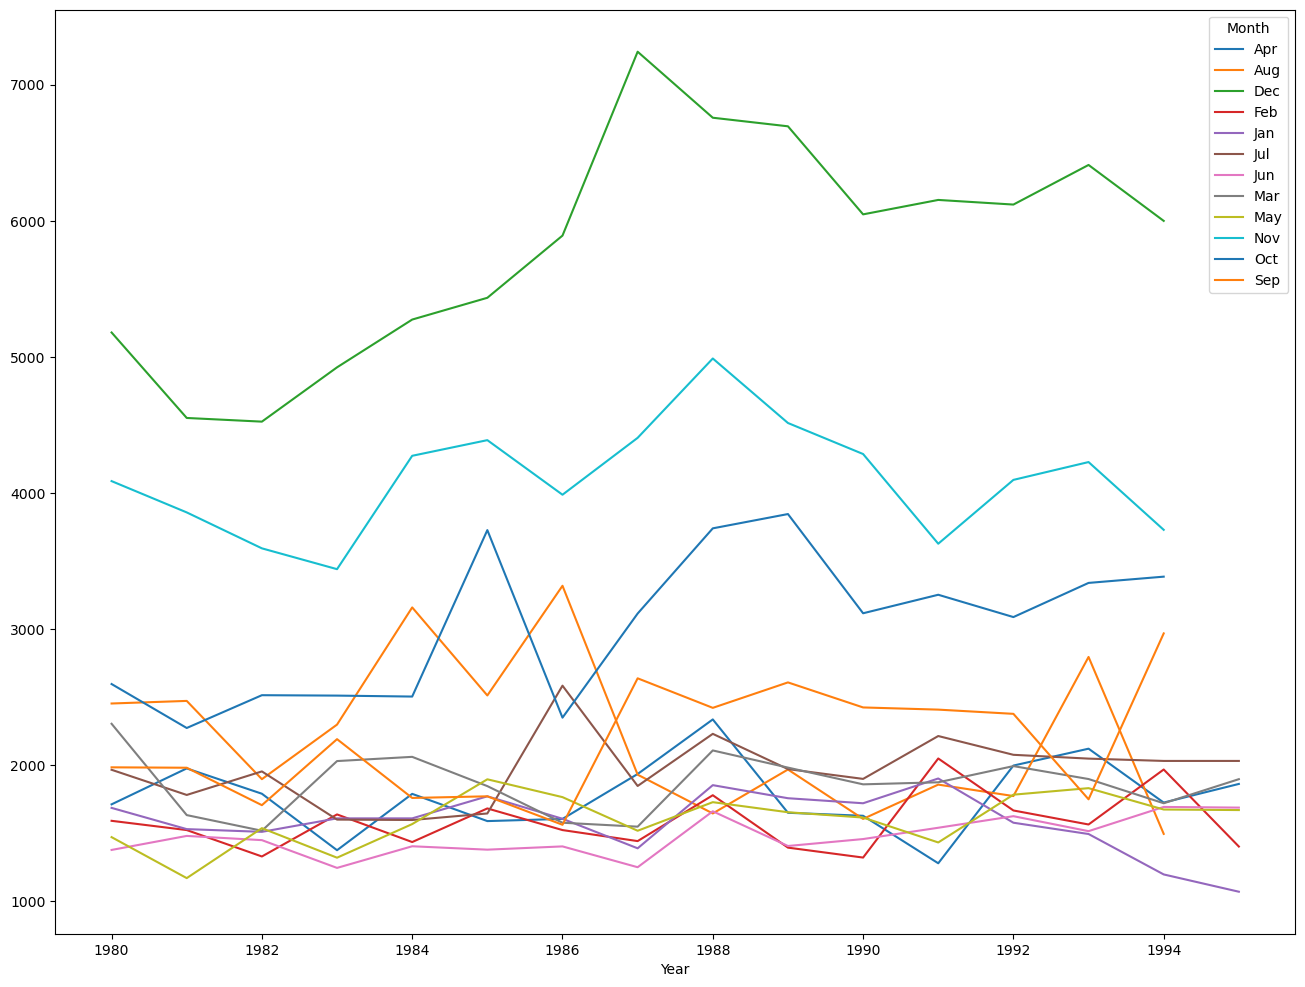

In [308]:
pivot4.plot();

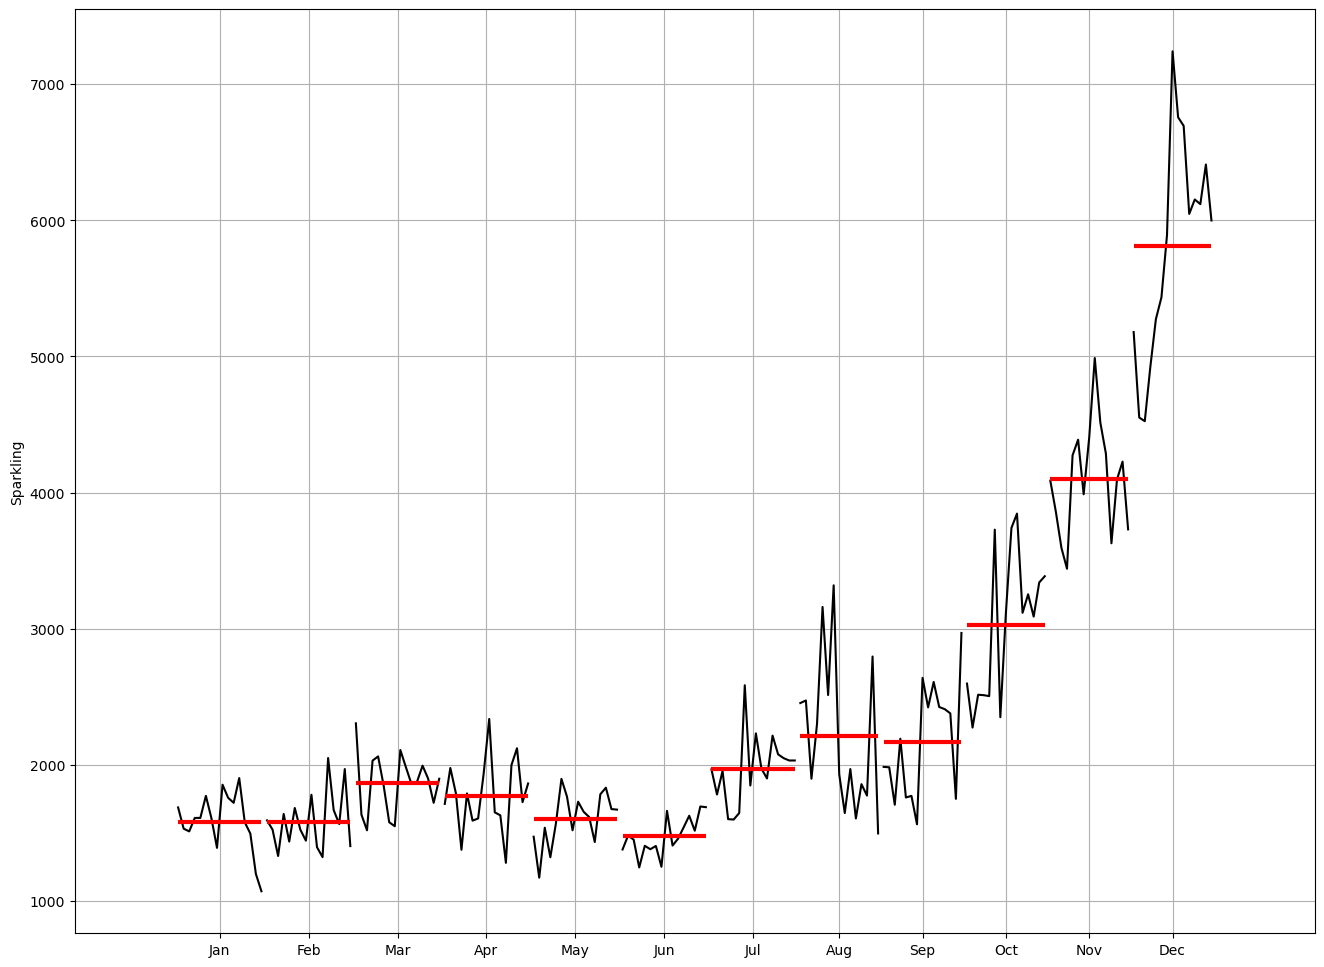

In [309]:
month_plot(df_Sparkling['Sparkling'],ylabel='Sparkling')
plt.grid();

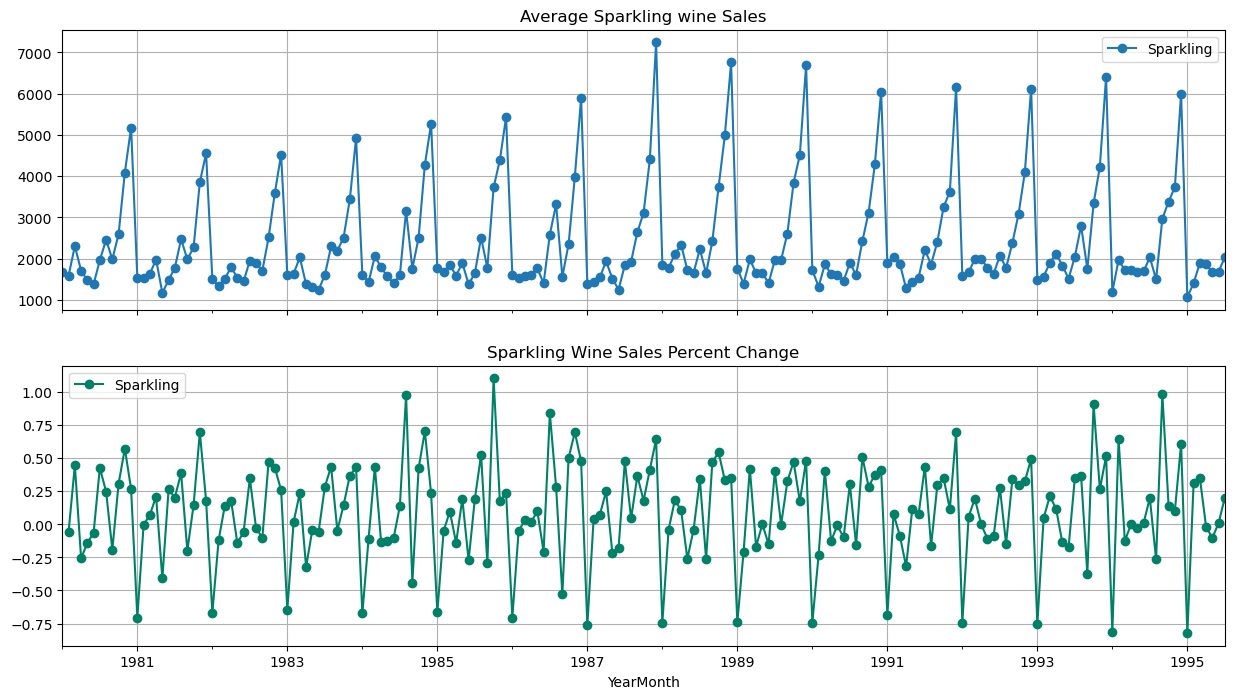

In [310]:
Average    = df_Sparkling.groupby(df_Sparkling.index)["Sparkling"].mean()
pct_change = df_Sparkling.groupby(df_Sparkling.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))
ax1 = Average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling wine Sales",grid=True)
ax1.set_xticks(range(len(Average)))
ax1.set_xticklabels(Average.index.tolist())
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling Wine Sales Percent Change",grid=True)

In [311]:
df_Sparkling1.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

## Train Test split

In [312]:
train_sparkling=df_Sparkling1[df_Sparkling1.index.year < 1992]
test_sparkling=df_Sparkling1[df_Sparkling1.index.year >= 1992]

In [313]:
train_sparkling.tail()

Sparkling
YearMonth            
1991-08-01       1857
1991-09-01       2408
1991-10-01       3252
1991-11-01       3627
1991-12-01       6153

In [314]:
len(train_sparkling)

144

In [315]:
len(test_sparkling)

43

In [316]:
test_sparkling.head()

Sparkling
YearMonth            
1992-01-01       1577
1992-02-01       1667
1992-03-01       1993
1992-04-01       1997
1992-05-01       1783

# Linear regression

In [317]:
LinearRegression_train = train_sparkling.copy()
LinearRegression_test = test_sparkling.copy()

In [318]:
train_time = [i+1 for i in range(len(train_sparkling))]
test_time = [i+145 for i in range(len(test_sparkling))]

In [319]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

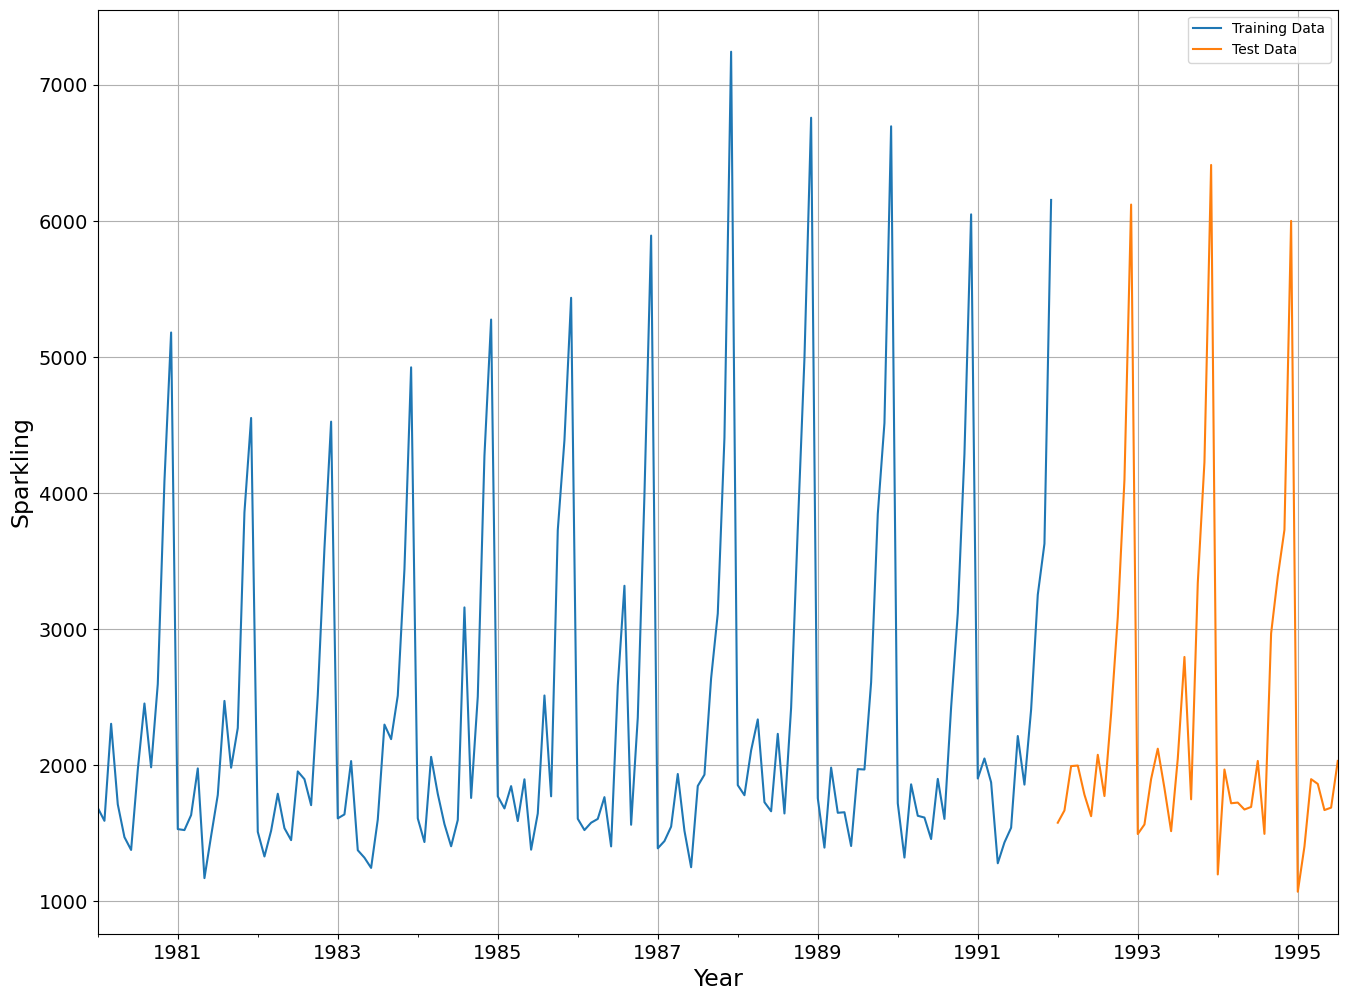

In [320]:
train_sparkling['Sparkling'].plot(fontsize=14)
test_sparkling['Sparkling'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.xlabel('Year',fontsize=17)
plt.ylabel('Sparkling',fontsize=17)
plt.show();

In [321]:
LinearRegression_train.head()

Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5

In [322]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

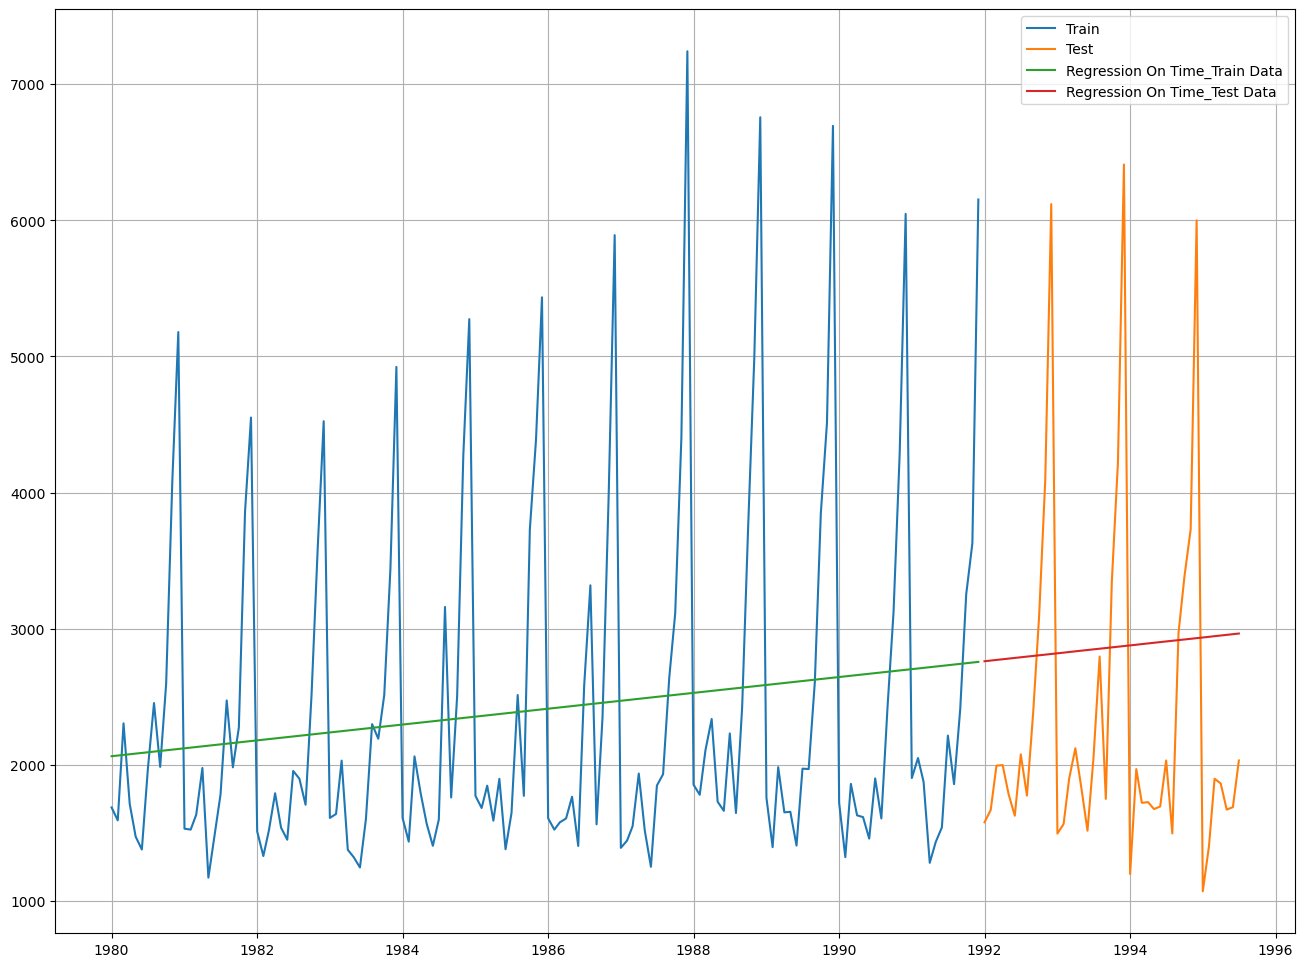

In [323]:
train_predictions_model        = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['Predictions'] = train_predictions_model

test_predictions_model        = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['Predictions'] = test_predictions_model

plt.plot( train_sparkling['Sparkling'], label='Train')
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(LinearRegression_train['Predictions'], label='Regression On Time_Train Data')
plt.plot(LinearRegression_test['Predictions'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [324]:
from sklearn import metrics

In [325]:
rmse_lr=metrics.root_mean_squared_error(test_sparkling['Sparkling'],test_predictions_model)
print("For Regression On Time forecast on the Test Data,  RMSE is %3.3f " %(rmse_lr))

For Regression On Time forecast on the Test Data,  RMSE is 1356.625 


In [326]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_lr]},index=['Linear Regression'])
resultsDf

Test RMSE
Linear Regression  1356.624538

# Simple Average

In [327]:
SimpleAverage_train = train_sparkling.copy()
SimpleAverage_test = test_sparkling.copy()
SimpleAverage_test['Mean_Forecast'] = train_sparkling['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  Mean_Forecast
YearMonth                           
1992-01-01       1577    2408.930556
1992-02-01       1667    2408.930556
1992-03-01       1993    2408.930556
1992-04-01       1997    2408.930556
1992-05-01       1783    2408.930556

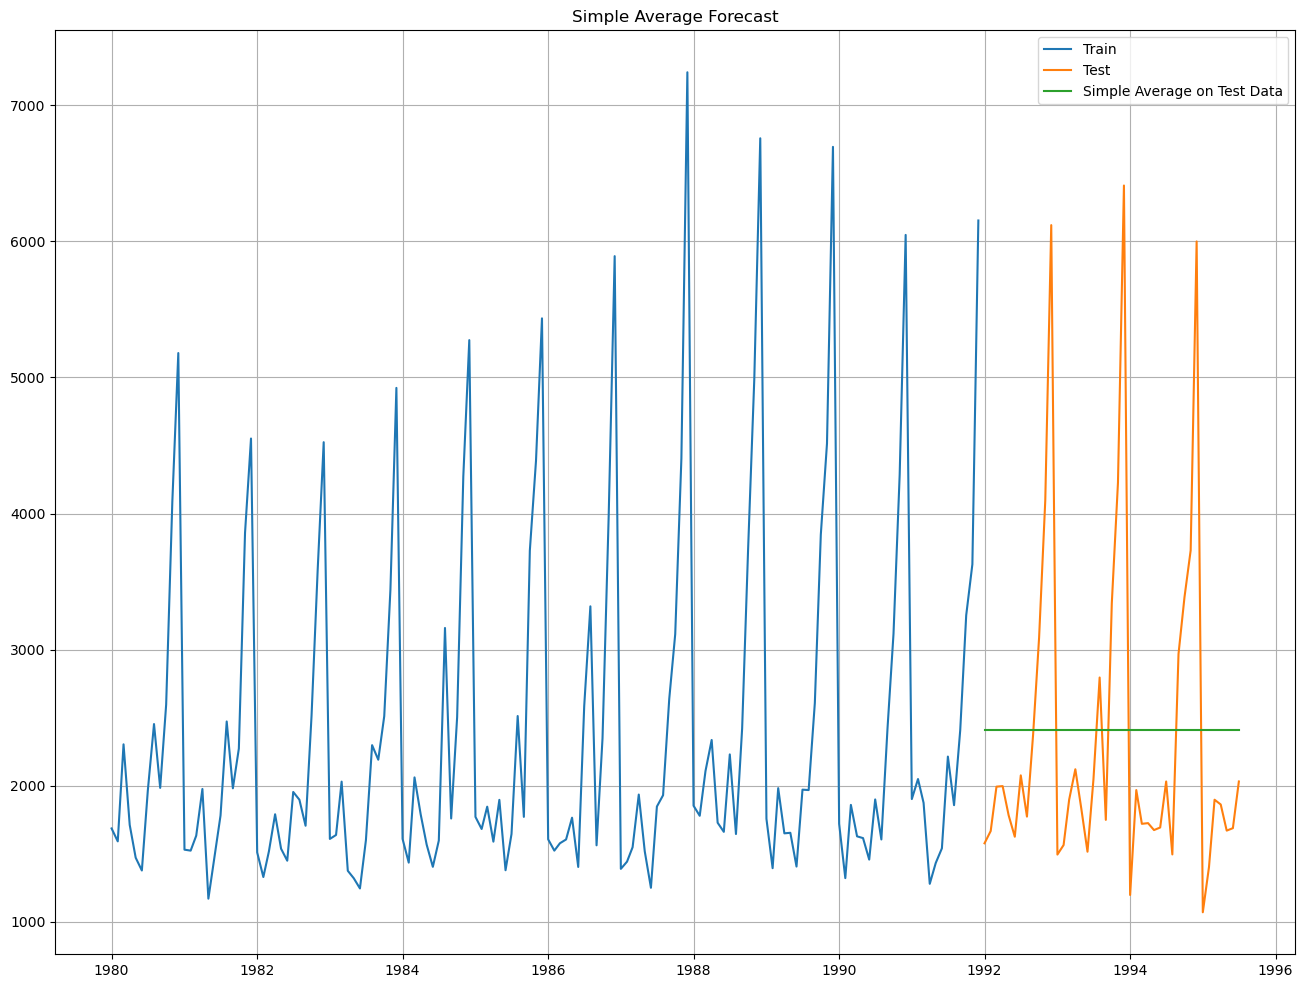

In [328]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['Mean_Forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [329]:
rmse_simple_average=metrics.root_mean_squared_error(test_sparkling['Sparkling'],SimpleAverage_test['Mean_Forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_simple_average))

For Simple Average forecast on the Test Data,  RMSE is 1268.683


In [330]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_simple_average]}
                           ,index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
Linear Regression     1356.624538
Simple Average Model  1268.683035

# Moving Average

In [331]:
MovingAverage_Sparkling = df_Sparkling1.copy()
MovingAverage_Sparkling.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [332]:
MovingAverage_Sparkling['Trailing_2'] = MovingAverage_Sparkling['Sparkling'].rolling(2).mean()
MovingAverage_Sparkling['Trailing_4'] = MovingAverage_Sparkling['Sparkling'].rolling(4).mean()
MovingAverage_Sparkling['Trailing_6'] = MovingAverage_Sparkling['Sparkling'].rolling(6).mean()
MovingAverage_Sparkling['Trailing_8'] = MovingAverage_Sparkling['Sparkling'].rolling(8).mean()
MovingAverage_Sparkling['Trailing_10'] = MovingAverage_Sparkling['Sparkling'].rolling(10).mean()



In [333]:
MovingAverage_Sparkling.head(10)

Sparkling  Trailing_2  Trailing_4   Trailing_6  Trailing_8  \
YearMonth                                                                
1980-01-01       1686         NaN         NaN          NaN         NaN   
1980-02-01       1591      1638.5         NaN          NaN         NaN   
1980-03-01       2304      1947.5         NaN          NaN         NaN   
1980-04-01       1712      2008.0     1823.25          NaN         NaN   
1980-05-01       1471      1591.5     1769.50          NaN         NaN   
1980-06-01       1377      1424.0     1716.00  1690.166667         NaN   
1980-07-01       1966      1671.5     1631.50  1736.833333         NaN   
1980-08-01       2453      2209.5     1816.75  1880.500000    1820.000   
1980-09-01       1984      2218.5     1945.00  1827.166667    1857.250   
1980-10-01       2596      2290.0     2249.75  1974.500000    1982.875   

            Trailing_10  
YearMonth                
1980-01-01          NaN  
1980-02-01          NaN  
1980-03-01          NaN  
1980-04-01          NaN  
1980-05-01          NaN  
1980-06-01          NaN  
1980-07-01          NaN  
1980-08-01          NaN  
1980-09-01          NaN  
1980-10-01       1914.0

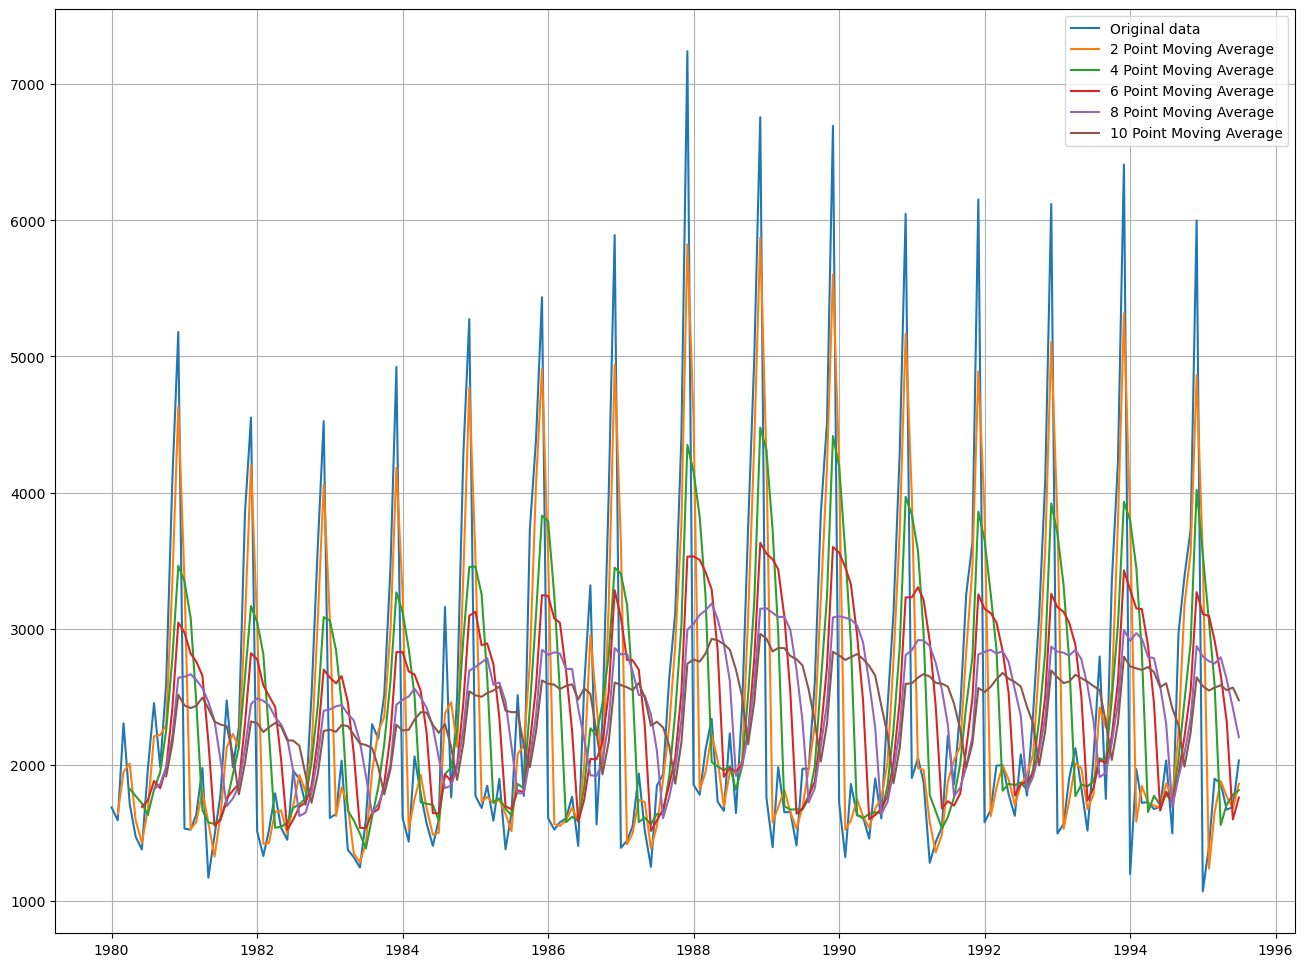

In [334]:

plt.plot(MovingAverage_Sparkling['Sparkling'], label='Original data')
plt.plot(MovingAverage_Sparkling['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage_Sparkling['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage_Sparkling['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage_Sparkling['Trailing_8'],label = '8 Point Moving Average')
plt.plot(MovingAverage_Sparkling['Trailing_10'],label = '10 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [335]:
MovingAverage_Sparkling_train=MovingAverage_Sparkling[MovingAverage_Sparkling.index.year < 1992]
MovingAverage_Sparkling_test=MovingAverage_Sparkling[MovingAverage_Sparkling.index.year >= 1992]

In [336]:
MovingAverage_Sparkling_train.tail()

Sparkling  Trailing_2  Trailing_4   Trailing_6  Trailing_8  \
YearMonth                                                                
1991-08-01       1857      2035.5     1760.75  1699.333333    1768.375   
1991-09-01       2408      2132.5     2004.75  1788.333333    1831.625   
1991-10-01       3252      2830.0     2432.75  2117.166667    1982.000   
1991-11-01       3627      3439.5     2786.00  2483.000000    2201.125   
1991-12-01       6153      4890.0     3860.00  3251.833333    2810.375   

            Trailing_10  
YearMonth                
1991-08-01       2448.0  
1991-09-01       2260.2  
1991-10-01       1980.7  
1991-11-01       2153.2  
1991-12-01       2563.6

In [337]:
MovingAverage_Sparkling_test.head()

Sparkling  Trailing_2  Trailing_4   Trailing_6  Trailing_8  \
YearMonth                                                                
1992-01-01       1577      3865.0     3652.25  3145.666667    2828.500   
1992-02-01       1667      1622.0     3256.00  3114.000000    2844.375   
1992-03-01       1993      1830.0     2847.50  3044.833333    2816.750   
1992-04-01       1997      1995.0     1808.50  2835.666667    2834.250   
1992-05-01       1783      1890.0     1860.00  2528.333333    2756.125   

            Trailing_10  
YearMonth                
1992-01-01       2533.9  
1992-02-01       2572.7  
1992-03-01       2628.8  
1992-04-01       2674.5  
1992-05-01       2631.4

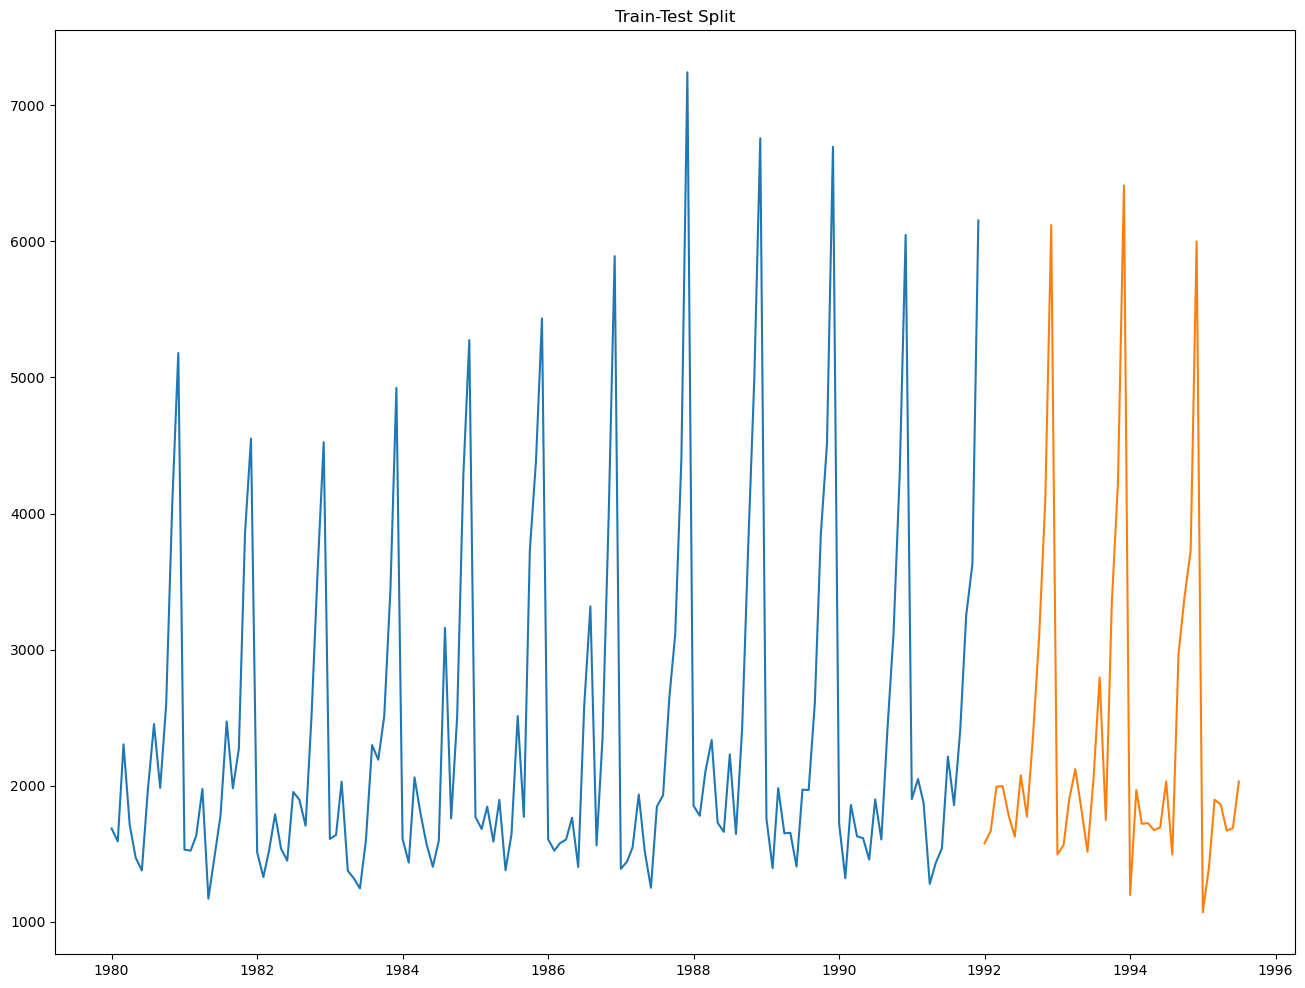

In [338]:
plt.plot(MovingAverage_Sparkling_train['Sparkling'], label='Train')
plt.plot(MovingAverage_Sparkling_test['Sparkling'], label='Test')
plt.title('Train-Test Split');


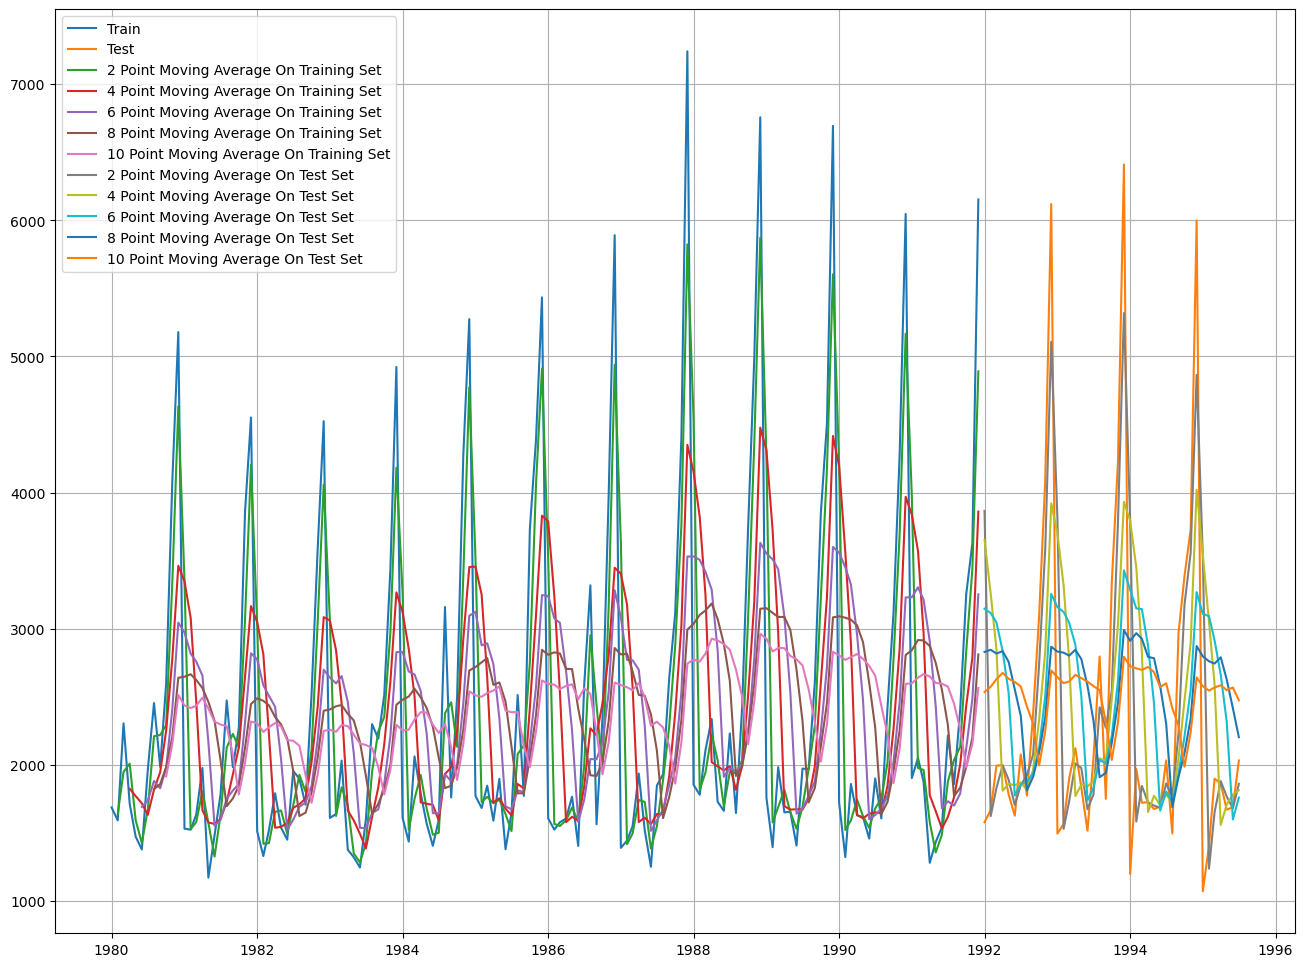

In [339]:
plt.plot(MovingAverage_Sparkling_train['Sparkling'], label='Train')
plt.plot(MovingAverage_Sparkling_test['Sparkling'], label='Test')

plt.plot(MovingAverage_Sparkling_train['Trailing_2'], label='2 Point Moving Average On Training Set')
plt.plot(MovingAverage_Sparkling_train['Trailing_4'], label='4 Point Moving Average On Training Set')
plt.plot(MovingAverage_Sparkling_train['Trailing_6'],label = '6 Point Moving Average On Training Set')
plt.plot(MovingAverage_Sparkling_train['Trailing_8'],label = '8 Point Moving Average On Training Set')
plt.plot(MovingAverage_Sparkling_train['Trailing_10'],label = '10 Point Moving Average On Training Set')

plt.plot(MovingAverage_Sparkling_test['Trailing_2'], label='2 Point Moving Average On Test Set')
plt.plot(MovingAverage_Sparkling_test['Trailing_4'], label='4 Point Moving Average On Test Set')
plt.plot(MovingAverage_Sparkling_test['Trailing_6'],label = '6 Point Moving Average On Test Set')
plt.plot(MovingAverage_Sparkling_test['Trailing_8'],label = '8 Point Moving Average On Test Set')
plt.plot(MovingAverage_Sparkling_test['Trailing_10'],label = '10 Point Moving Average On Test Set')

plt.legend(loc = 'best')
plt.grid();

## Model Evaluation

In [340]:
Rmse_MA_2 = metrics.root_mean_squared_error(test_sparkling['Sparkling'],MovingAverage_Sparkling_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(Rmse_MA_2))


Rmse_MA_4 = metrics.root_mean_squared_error(test_sparkling['Sparkling'],MovingAverage_Sparkling_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(Rmse_MA_4))


Rmse_MA_6 = metrics.root_mean_squared_error(test_sparkling['Sparkling'],MovingAverage_Sparkling_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(Rmse_MA_6))


Rmse_MA_8 = metrics.root_mean_squared_error(test_sparkling['Sparkling'],MovingAverage_Sparkling_test['Trailing_8'])
print("For 8 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f " %(Rmse_MA_8))

Rmse_MA_10 = metrics.root_mean_squared_error(test_sparkling['Sparkling'],MovingAverage_Sparkling_test['Trailing_10'])
print("For 10 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f " %(Rmse_MA_10))

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 834.626
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 1169.866
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 1277.869
For 8 point Moving Average Model forecast on the Test Data,  RMSE is 1329.140 
For 10 point Moving Average Model forecast on the Test Data,  RMSE is 1324.530 


### Moving Average 2 has the least RMSE

In [341]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [Rmse_MA_2,Rmse_MA_4
                                          ,Rmse_MA_6,Rmse_MA_8,Rmse_MA_10]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','8pointTrailingMovingAverage','10pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
Linear Regression             1356.624538
Simple Average Model          1268.683035
2pointTrailingMovingAverage    834.625762
4pointTrailingMovingAverage   1169.865511
6pointTrailingMovingAverage   1277.869178
8pointTrailingMovingAverage   1329.140031
10pointTrailingMovingAverage  1324.529863

# Single Exponential Smoothening

In [342]:
SES_train = train_sparkling.copy()
SES_test = test_sparkling.copy()

In [343]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [344]:
model_SES = SimpleExpSmoothing(SES_train,initialization_method='estimated')
model_SES_autofit = model_SES.fit(optimized=True)
model_SES_autofit.params

C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.056234830918812144,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1804.0444740358766,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [345]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test_sparkling))

In [346]:
SES_test.head()

Sparkling      predict
YearMonth                         
1992-01-01       1577  2709.288832
1992-02-01       1667  2709.288832
1992-03-01       1993  2709.288832
1992-04-01       1997  2709.288832
1992-05-01       1783  2709.288832

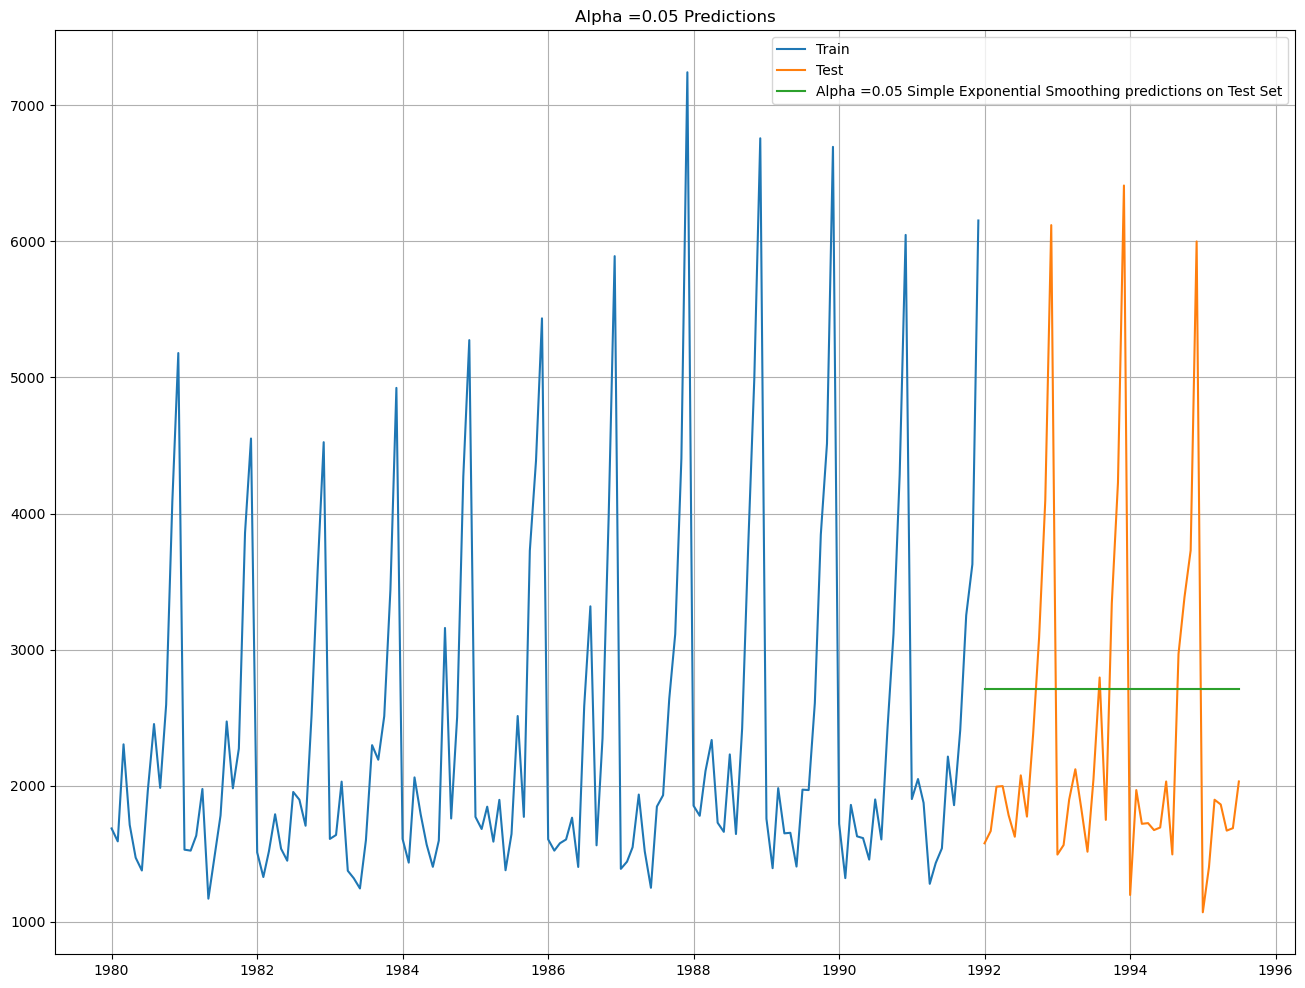

In [347]:
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.05 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.05 Predictions');

In [348]:
Rmse_SES=metrics.root_mean_squared_error(test_sparkling['Sparkling'],SES_test['predict'])
print("For Alpha =0.05 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(Rmse_SES))



For Alpha =0.05 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1310.262


In [349]:
resultsDf_4=pd.DataFrame({'Test RMSE' :[Rmse_SES]},index=['Alpha =0.05 Simple Exponential Smoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
Linear Regression                         1356.624538
Simple Average Model                      1268.683035
2pointTrailingMovingAverage                834.625762
4pointTrailingMovingAverage               1169.865511
6pointTrailingMovingAverage               1277.869178
8pointTrailingMovingAverage               1329.140031
10pointTrailingMovingAverage              1324.529863
Alpha =0.05 Simple Exponential Smoothing  1310.262407

# Double Exponential Smoothening

In [350]:
DES_train = train_sparkling.copy()
DES_test = test_sparkling.copy()

In [351]:
model_DES = Holt(DES_train,initialization_method='estimated')
model_DES_autofit = model_DES.fit(optimized=True)
model_DES_autofit.params

C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.6649999999999999,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1502.1999999999998,
 'initial_trend': 74.87272727272733,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [352]:
DES_test['predict']=model_DES_autofit.forecast(len(test_sparkling))

In [353]:
Rmse_Des=metrics.root_mean_squared_error(test_sparkling['Sparkling'],DES_test['predict'])
print("For Alpha =0.66 and Beta = 0.0001 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(Rmse_Des))

For Alpha =0.66 and Beta = 0.0001 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 4773.352


In [354]:
resultsDf_5=pd.DataFrame({'Test RMSE':[Rmse_Des]},index=['Alpha =0.66 and Beta = 0.0001'])
resultsDf=pd.concat([resultsDf,resultsDf_5])

In [355]:
resultsDf

Test RMSE
Linear Regression                         1356.624538
Simple Average Model                      1268.683035
2pointTrailingMovingAverage                834.625762
4pointTrailingMovingAverage               1169.865511
6pointTrailingMovingAverage               1277.869178
8pointTrailingMovingAverage               1329.140031
10pointTrailingMovingAverage              1324.529863
Alpha =0.05 Simple Exponential Smoothing  1310.262407
Alpha =0.66 and Beta = 0.0001             4773.351788

# Triple Exponential Smoothening Additive Seasonality

In [356]:
TES_train = train_sparkling.copy()
TES_test = test_sparkling.copy()

In [357]:
Model_TES=ExponentialSmoothing(TES_train,trend='additive',seasonal='additive',initialization_method='estimated')
Model_TES_autofit=Model_TES.fit()
Model_TES_autofit.params

C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.0756867562179331,
 'smoothing_trend': 0.04323384777386635,
 'smoothing_seasonal': 0.4452139919393859,
 'damping_trend': nan,
 'initial_level': 2356.5382138493037,
 'initial_trend': -2.171578358251569,
 'initial_seasons': array([-636.2618661 , -723.00592752, -398.6209641 , -473.456901  ,
        -808.45460363, -815.37977886, -384.24156455,   73.01684076,
        -237.47765022,  272.32447907, 1541.43058744, 2590.12226039]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [358]:
TES_test['predict']=Model_TES_autofit.forecast(len(test_sparkling))

In [359]:
TES_test.head()

Sparkling      predict
YearMonth                         
1992-01-01       1577  1703.778080
1992-02-01       1667  1599.061319
1992-03-01       1993  1753.918784
1992-04-01       1997  1409.440014
1992-05-01       1783  1433.236770

In [360]:
Rmse_TES=metrics.root_mean_squared_error(test_sparkling['Sparkling'],TES_test['predict'])
print("For Alpha =0.075,Beta = 0.043 and Gamma = 0.445 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(Rmse_TES))

For Alpha =0.075,Beta = 0.043 and Gamma = 0.445 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 368.571


In [361]:
resultsDf_6=pd.DataFrame({'Test RMSE':[Rmse_TES]},index=['Alpha =0.075,Beta = 0.043 and Gamma = 0.445 TES Additive'])
resultsDf_6

Test RMSE
Alpha =0.075,Beta = 0.043 and Gamma = 0.445 TES...  368.571075

In [362]:
resultsDf=pd.concat([resultsDf,resultsDf_6])
resultsDf

Test RMSE
Linear Regression                                   1356.624538
Simple Average Model                                1268.683035
2pointTrailingMovingAverage                          834.625762
4pointTrailingMovingAverage                         1169.865511
6pointTrailingMovingAverage                         1277.869178
8pointTrailingMovingAverage                         1329.140031
10pointTrailingMovingAverage                        1324.529863
Alpha =0.05 Simple Exponential Smoothing            1310.262407
Alpha =0.66 and Beta = 0.0001                       4773.351788
Alpha =0.075,Beta = 0.043 and Gamma = 0.445 TES...   368.571075

# Triple Exponential Smoothening Multiplicative Seasonality

In [363]:
Model_TES1=ExponentialSmoothing(TES_train,trend='additive',seasonal='multiplicative',initialization_method='estimated')
Model_TES_autofit1=Model_TES1.fit()
Model_TES_autofit1.params

C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.07601283073953388,
 'smoothing_trend': 0.07601116588426715,
 'smoothing_seasonal': 0.3421184113719479,
 'damping_trend': nan,
 'initial_level': 2356.2296856543767,
 'initial_trend': -14.36526885973219,
 'initial_seasons': array([0.72050936, 0.6925866 , 0.90830744, 0.80615789, 0.65609949,
        0.65165502, 0.88388425, 1.13640118, 0.92417371, 1.22406668,
        1.9119011 , 2.43792804]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [364]:
TES_test['predict_multiplicative']=Model_TES_autofit1.forecast(len(test_sparkling))

In [365]:
TES_test.head()

Sparkling      predict  predict_multiplicative
YearMonth                                                 
1992-01-01       1577  1703.778080             1720.344929
1992-02-01       1667  1599.061319             1612.471009
1992-03-01       1993  1753.918784             1795.028838
1992-04-01       1997  1409.440014             1531.065710
1992-05-01       1783  1433.236770             1508.856859

In [366]:
Rmse_TES1=metrics.root_mean_squared_error(test_sparkling['Sparkling'],TES_test['predict_multiplicative'])
print("For Alpha =0.076,Beta = 0.076 and Gamma =0.342 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(Rmse_TES1))

For Alpha =0.076,Beta = 0.076 and Gamma =0.342 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 347.346


In [367]:
resultsDf_9=pd.DataFrame({'Test RMSE':[Rmse_TES1]},index=['Alpha =0.076,Beta = 0.076 and Gamma =0.342 TES Multiplicative'])
resultsDf_9

Test RMSE
Alpha =0.076,Beta = 0.076 and Gamma =0.342 TES ...  347.346366

In [368]:
resultsDf=pd.concat([resultsDf,resultsDf_9])
resultsDf

Test RMSE
Linear Regression                                   1356.624538
Simple Average Model                                1268.683035
2pointTrailingMovingAverage                          834.625762
4pointTrailingMovingAverage                         1169.865511
6pointTrailingMovingAverage                         1277.869178
8pointTrailingMovingAverage                         1329.140031
10pointTrailingMovingAverage                        1324.529863
Alpha =0.05 Simple Exponential Smoothing            1310.262407
Alpha =0.66 and Beta = 0.0001                       4773.351788
Alpha =0.075,Beta = 0.043 and Gamma = 0.445 TES...   368.571075
Alpha =0.076,Beta = 0.076 and Gamma =0.342 TES ...   347.346366

In [369]:
TES_test.head()

Sparkling      predict  predict_multiplicative
YearMonth                                                 
1992-01-01       1577  1703.778080             1720.344929
1992-02-01       1667  1599.061319             1612.471009
1992-03-01       1993  1753.918784             1795.028838
1992-04-01       1997  1409.440014             1531.065710
1992-05-01       1783  1433.236770             1508.856859

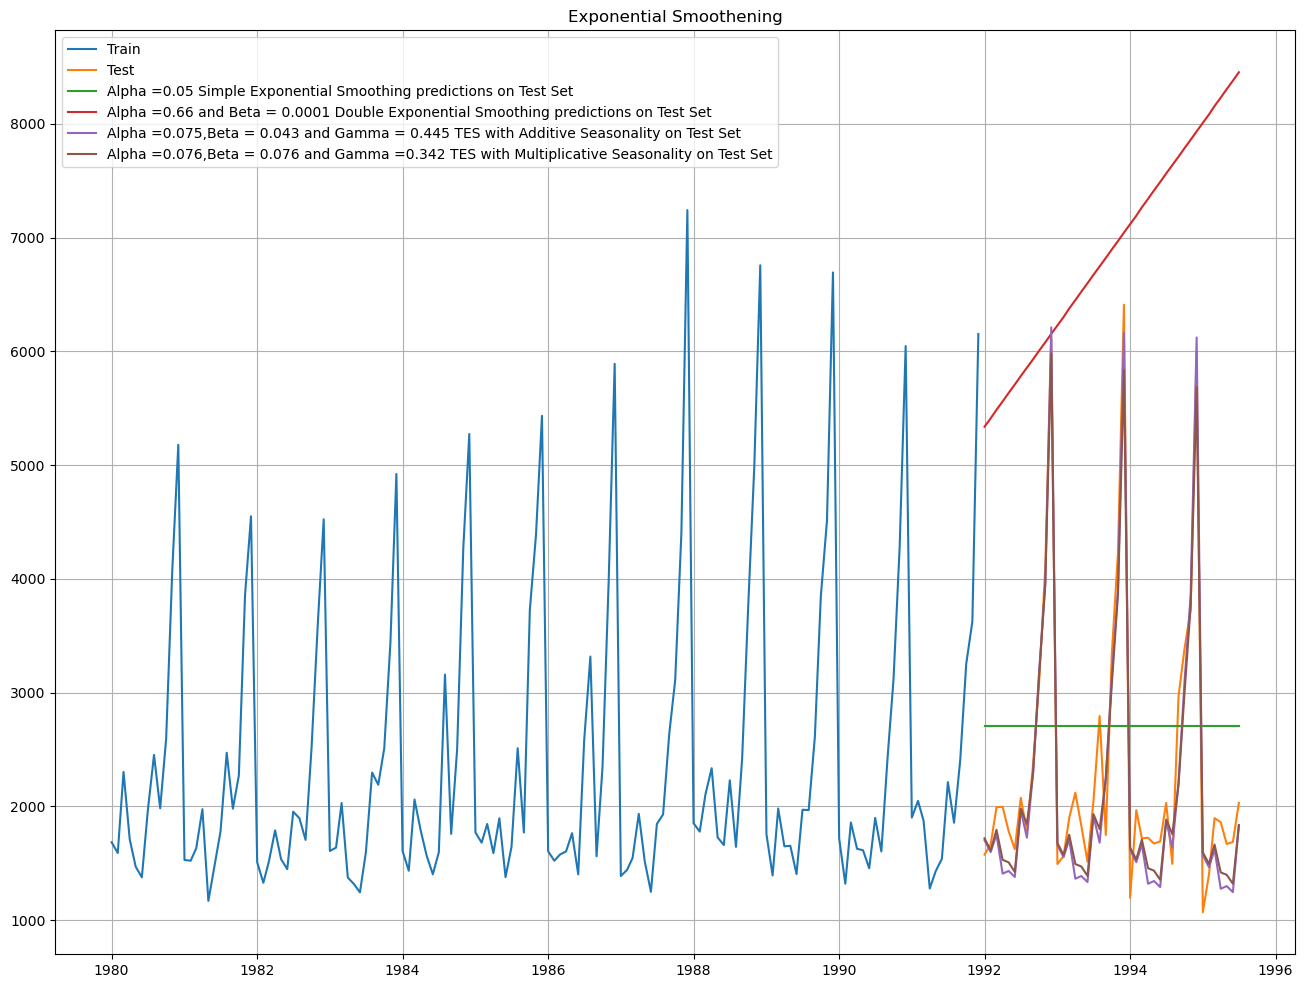

In [370]:
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.05 Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict'],label='Alpha =0.66 and Beta = 0.0001 Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_test['predict'],label='Alpha =0.075,Beta = 0.043 and Gamma = 0.445 TES with Additive Seasonality on Test Set')
plt.plot(TES_test['predict_multiplicative'],label='Alpha =0.076,Beta = 0.076 and Gamma =0.342 TES with Multiplicative Seasonality on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Exponential Smoothening');

In [371]:
resultsDf

Test RMSE
Linear Regression                                   1356.624538
Simple Average Model                                1268.683035
2pointTrailingMovingAverage                          834.625762
4pointTrailingMovingAverage                         1169.865511
6pointTrailingMovingAverage                         1277.869178
8pointTrailingMovingAverage                         1329.140031
10pointTrailingMovingAverage                        1324.529863
Alpha =0.05 Simple Exponential Smoothing            1310.262407
Alpha =0.66 and Beta = 0.0001                       4773.351788
Alpha =0.075,Beta = 0.043 and Gamma = 0.445 TES...   368.571075
Alpha =0.076,Beta = 0.076 and Gamma =0.342 TES ...   347.346366

# Checking For Stationarity

# *<font color='blue'>Dickey-Fuller Test</font>*



- **Null Hypothesis $H_{0}$**: Time Series is non-stationary.
- **Alternate Hypothesis $𝑯_{𝒂}$**: Time Series is stationary.

*So Ideally if p-value < 0.05 then null hypothesis: TS is non-stationary is rejected else the TS is non-stationary is failed to be rejected .*


In [372]:
dftest = adfuller(df_Sparkling1['Sparkling'])
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.360
DF test p-value is 0.6011


## We can see that the p-value is greater than 0.05,therefore the time series is not stationary

## Using plot

In [373]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=6).mean() 
    rolstd = timeseries.rolling(window=6).std()   

   
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

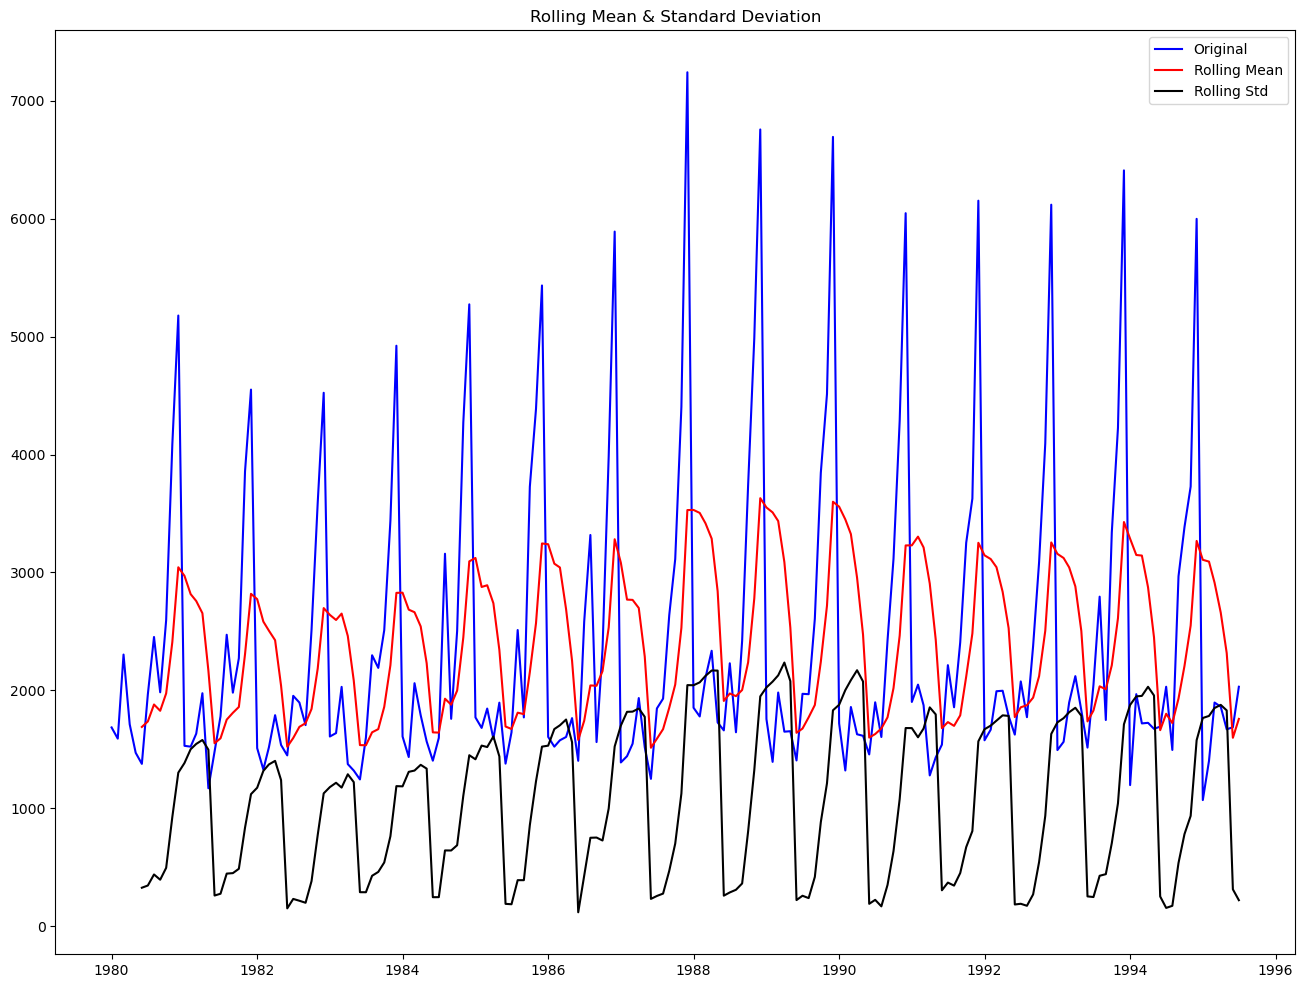

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [374]:
test_stationarity(df_Sparkling['Sparkling'])

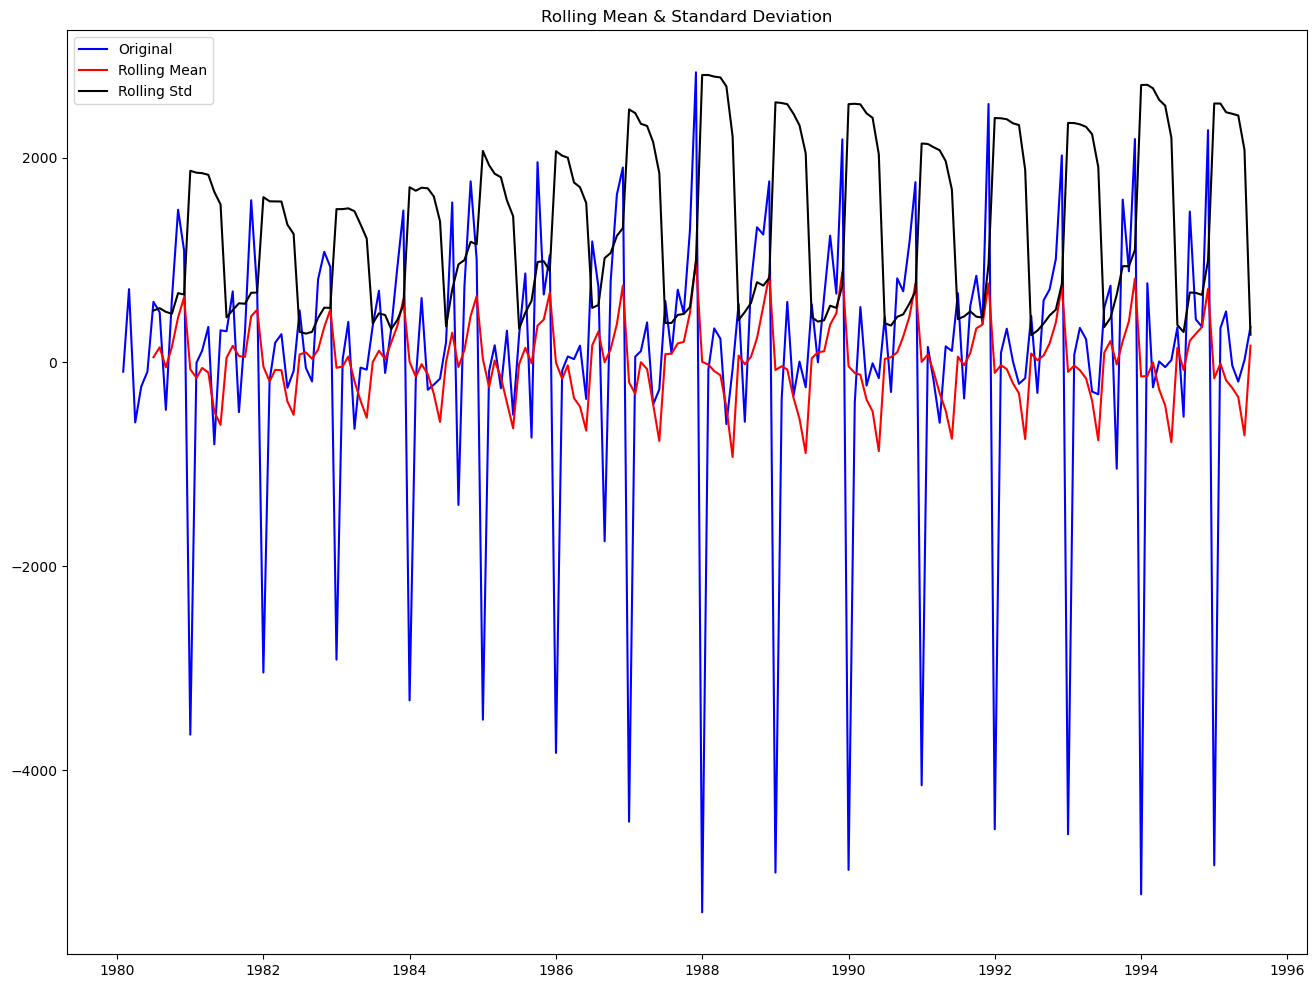

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [375]:
test_stationarity(df_Sparkling1['Sparkling'].diff().dropna())

## We can see that the first order differencing of the time series makes it stationary,as the p value is 0 which is less than 0.05.
## Therefore d=1

# ACF & PACF Plot 

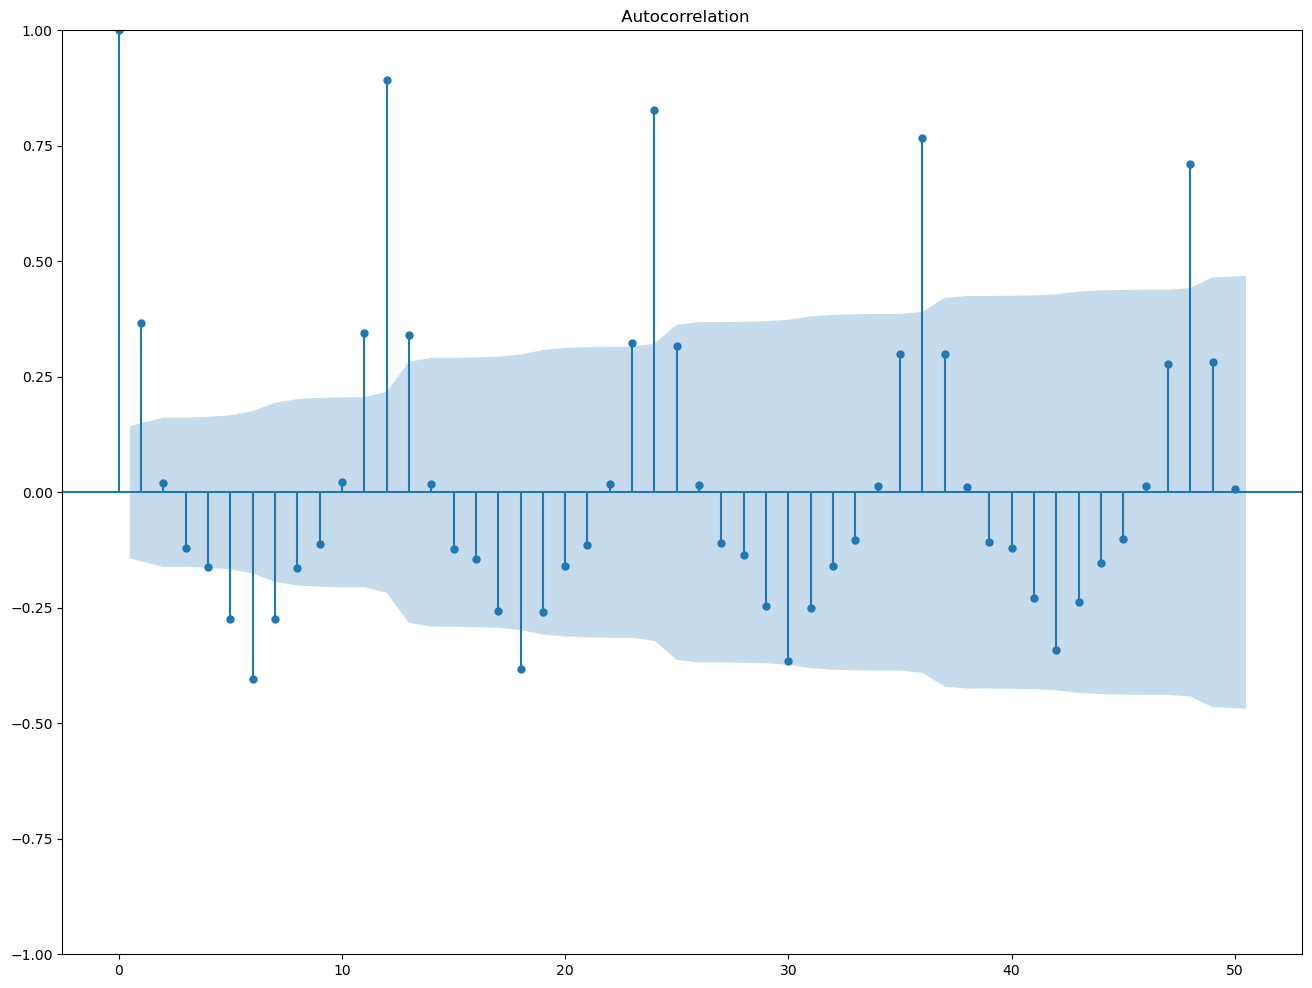

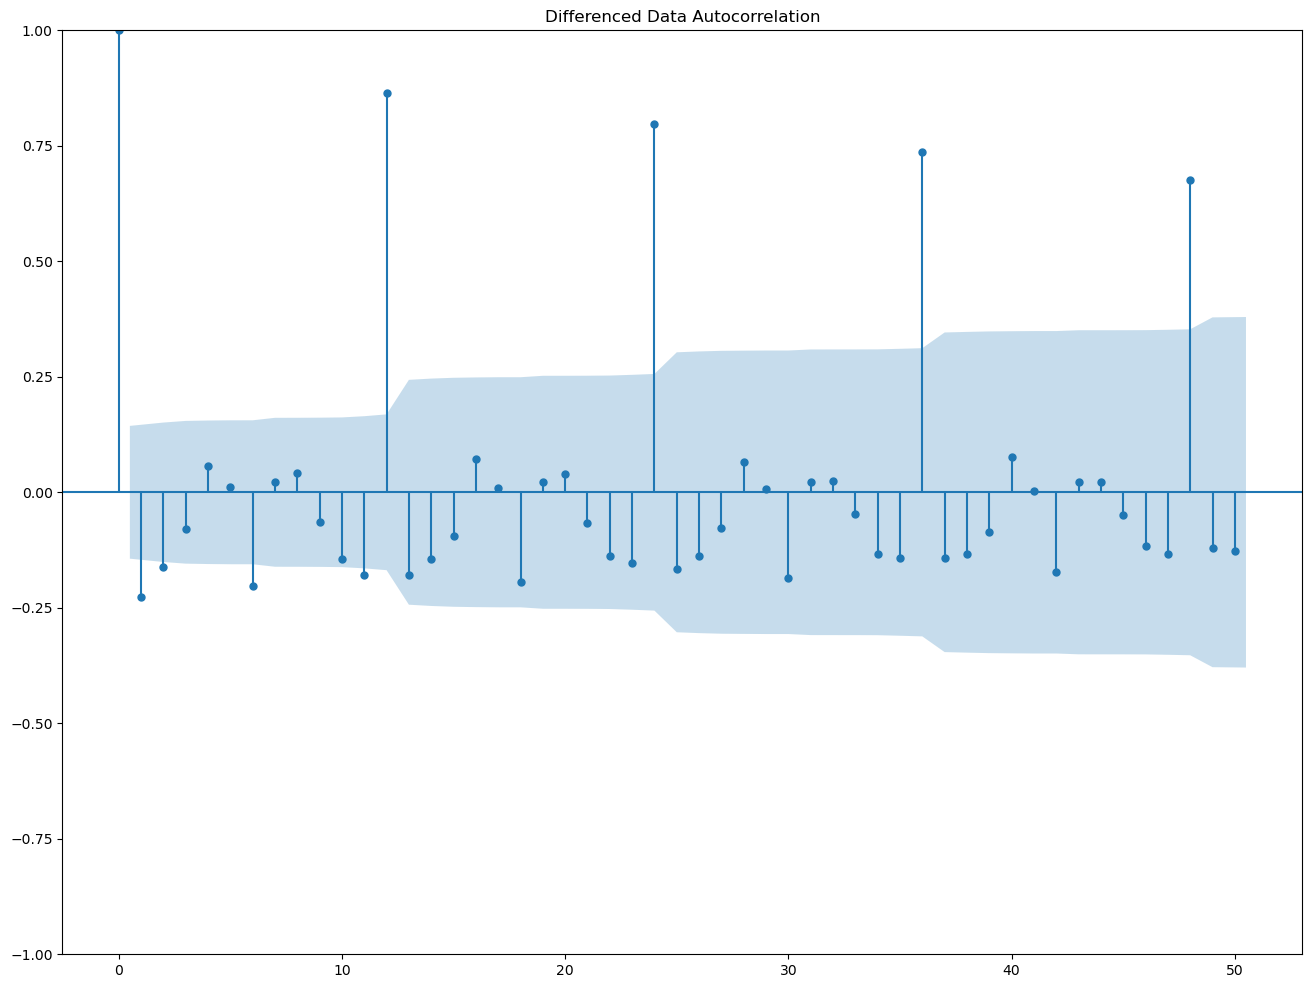

In [376]:
plot_acf(df_Sparkling1['Sparkling'],lags=50,title=' Autocorrelation')
plot_acf(df_Sparkling1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

## From the above ACF plot,we can see that there is no significant correlation in the differenced time series after lag 2.Therefore q=2.

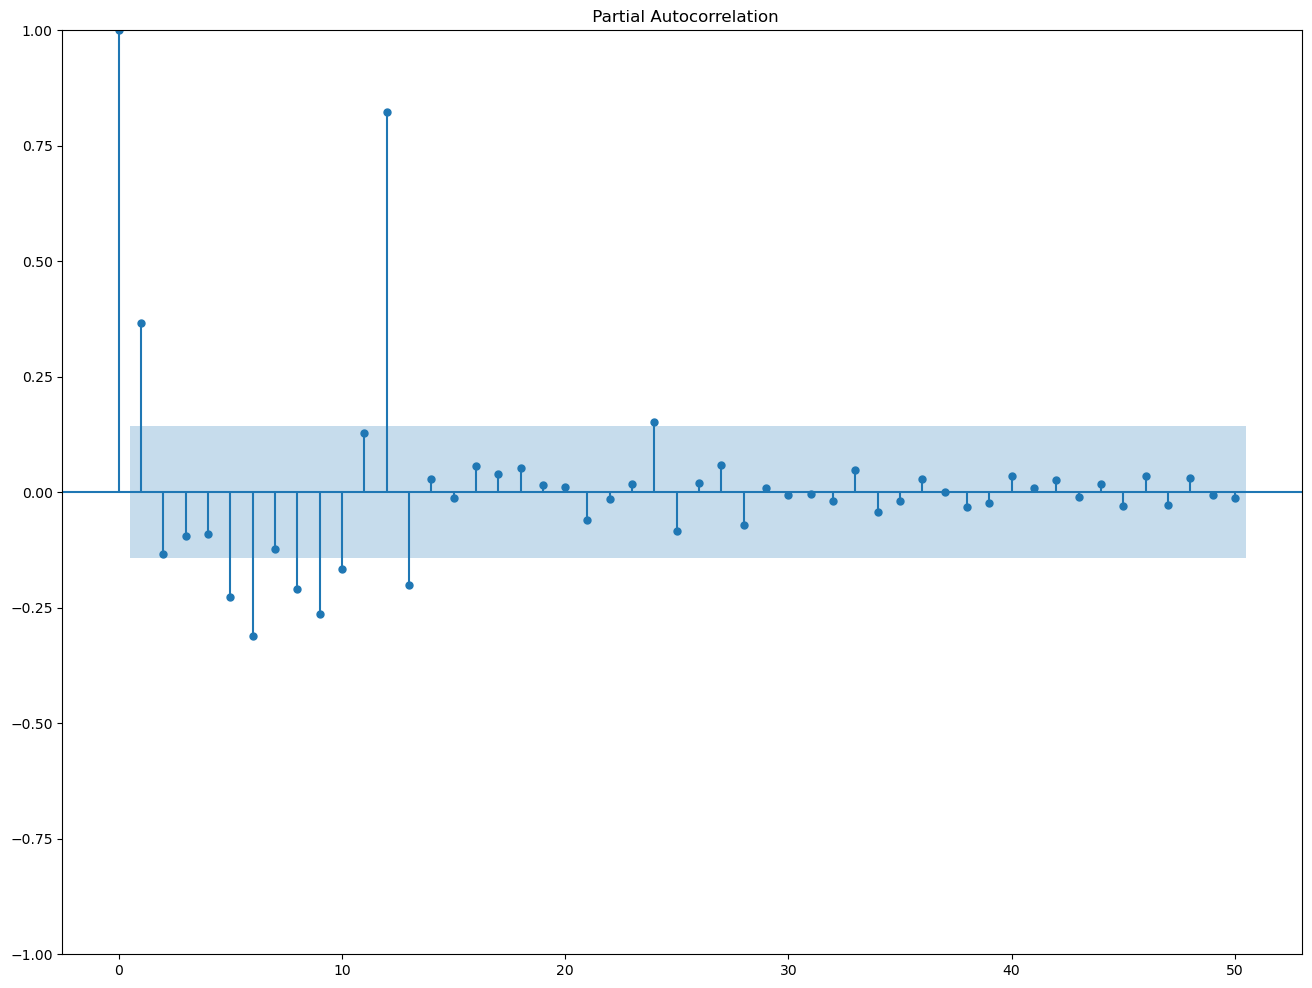

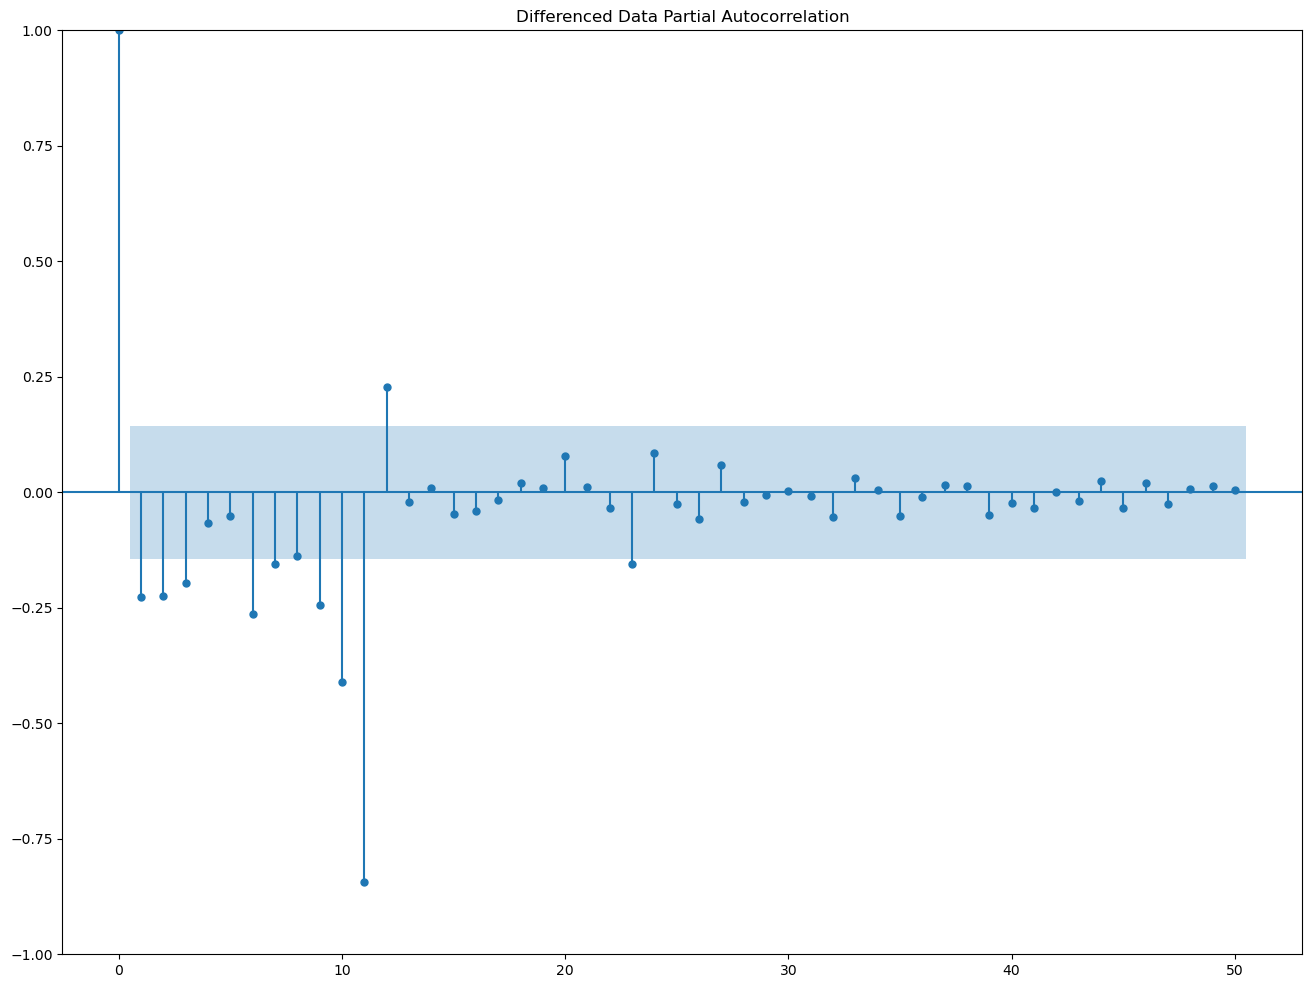

In [377]:
plot_pacf(df_Sparkling1['Sparkling'],lags=50,title=' Partial Autocorrelation')
plot_pacf(df_Sparkling1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show();

## From the above PACF plot,we can see that there is no significant correlation in the differenced time series after lag 3.Therefore p=3.

## ARIMA Model

## Auto ARIMA

In [378]:
import itertools
p = range(0, 4)
q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)


In [379]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [380]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_sparkling['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    result = pd.DataFrame({'param': [param], 'AIC': [ARIMA_model.aic]})
    ARIMA_AIC = pd.concat([ARIMA_AIC, result], ignore_index=True)


ARIMA(0, 1, 0) - AIC:2476.745546947
ARIMA(0, 1, 1) - AIC:2470.903265414375
ARIMA(0, 1, 2) - AIC:2439.471818985695
ARIMA(1, 1, 0) - AIC:2474.923642766007


C:\Users\Abubacker Siddhique\AppData\Local\Temp\ipykernel_14356\3386121752.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ARIMA_AIC = pd.concat([ARIMA_AIC, result], ignore_index=True)


ARIMA(1, 1, 1) - AIC:2440.4861127585123
ARIMA(1, 1, 2) - AIC:2439.7123918134475
ARIMA(2, 1, 0) - AIC:2468.7139871180243
ARIMA(2, 1, 1) - AIC:2438.871734993091
ARIMA(2, 1, 2) - AIC:2419.1669982931653
ARIMA(3, 1, 0) - AIC:2466.3465536939166
ARIMA(3, 1, 1) - AIC:2440.427770864787


C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2) - AIC:2435.4544094926705


C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [381]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8   (2, 1, 2)  2419.166998
11  (3, 1, 2)  2435.454409
7   (2, 1, 1)  2438.871735
2   (0, 1, 2)  2439.471819
5   (1, 1, 2)  2439.712392
10  (3, 1, 1)  2440.427771
4   (1, 1, 1)  2440.486113
9   (3, 1, 0)  2466.346554
6   (2, 1, 0)  2468.713987
1   (0, 1, 1)  2470.903265
3   (1, 1, 0)  2474.923643
0   (0, 1, 0)  2476.745547

In [382]:
Auto_ARIMA = ARIMA(train_sparkling['Sparkling'].values, order=(2,1,2))

results_auto_ARIMA = Auto_ARIMA .fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1204.583
Date:                Fri, 31 May 2024   AIC                           2419.167
Time:                        22:19:25   BIC                           2433.981
Sample:                             0   HQIC                          2425.187
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3214      0.043     30.411      0.000       1.236       1.407
ar.L2         -0.5501      0.062     -8.906      0.000      -0.671      -0.429
ma.L1         -1.9912      0.105    -18.931      0.0

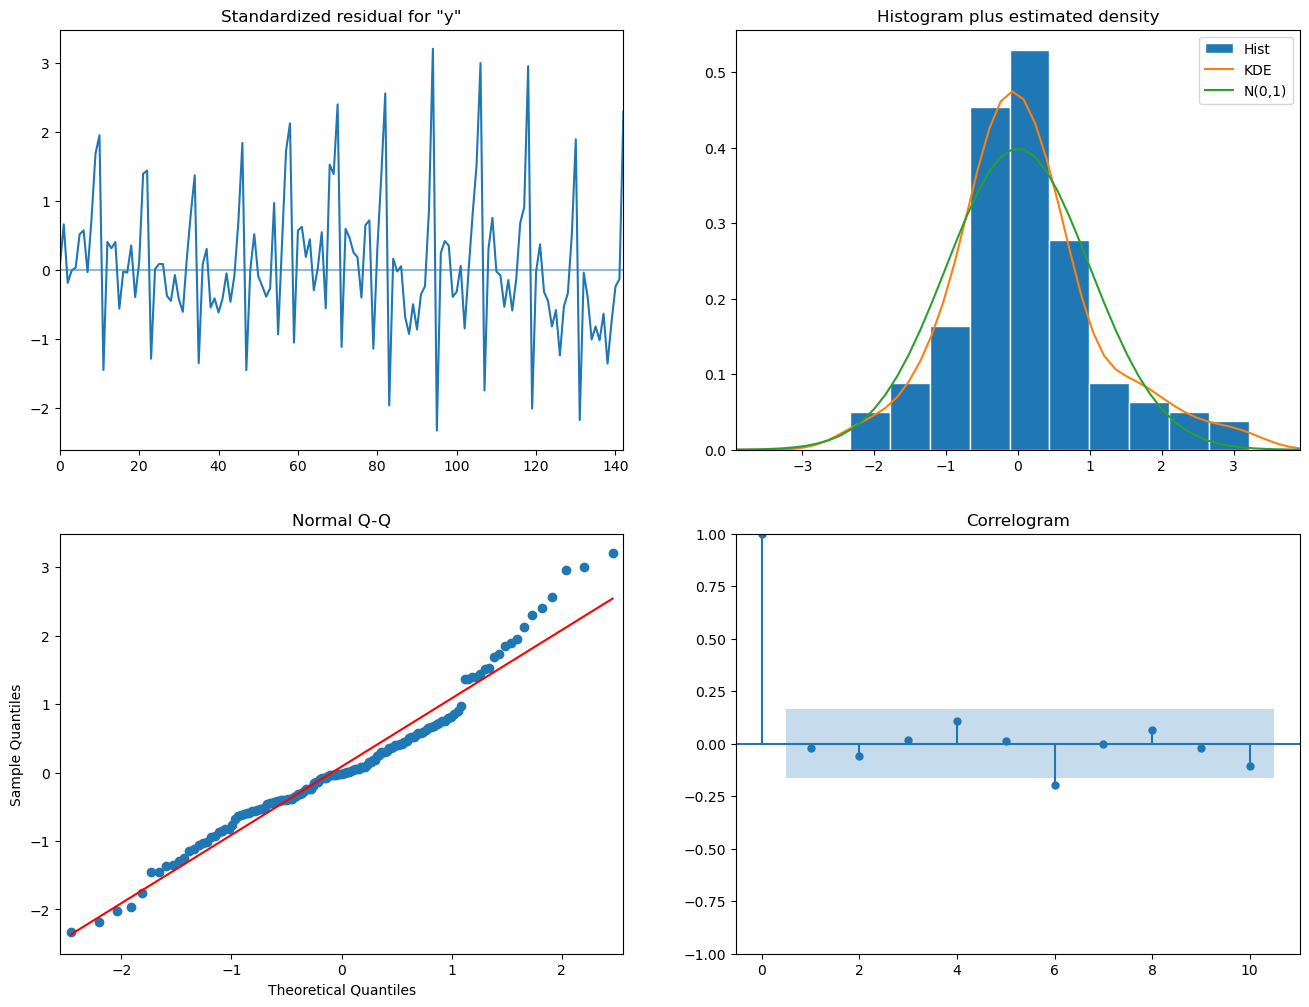

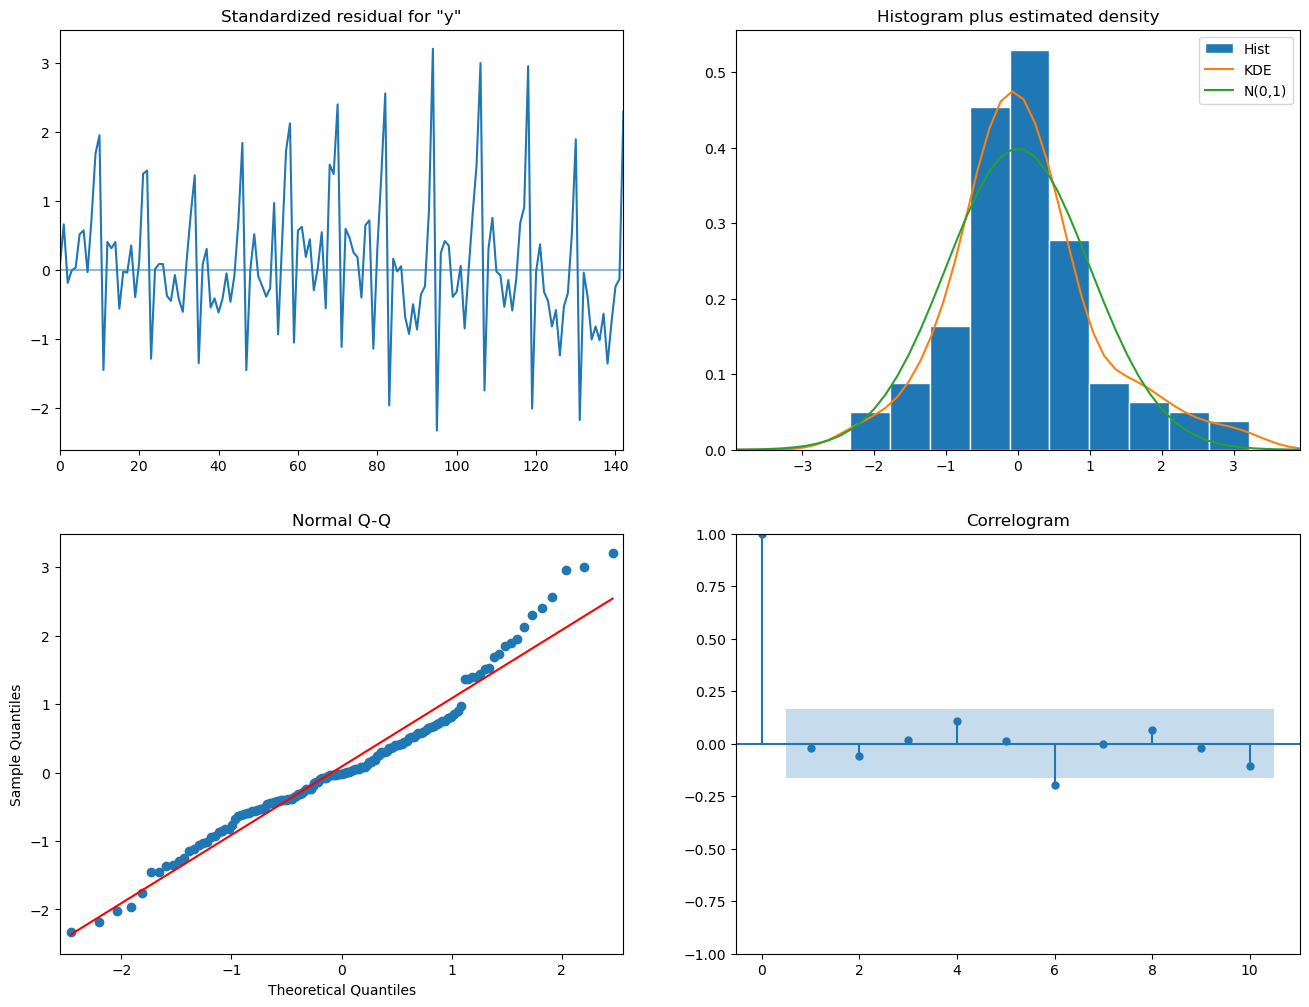

In [383]:
results_auto_ARIMA.plot_diagnostics()

In [384]:
predicted_Auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_sparkling))

In [385]:
RMSE_Auto_ARIMA=metrics.root_mean_squared_error(test_sparkling['Sparkling'],predicted_Auto_ARIMA)
print(RMSE_Auto_ARIMA)

1309.6340528309674


In [386]:
resultsDf_7=pd.DataFrame({'Test RMSE':[RMSE_Auto_ARIMA]},index=['Auto_ARIMA'])
resultsDf=pd.concat([resultsDf,resultsDf_7])
resultsDf

Test RMSE
Linear Regression                                   1356.624538
Simple Average Model                                1268.683035
2pointTrailingMovingAverage                          834.625762
4pointTrailingMovingAverage                         1169.865511
6pointTrailingMovingAverage                         1277.869178
8pointTrailingMovingAverage                         1329.140031
10pointTrailingMovingAverage                        1324.529863
Alpha =0.05 Simple Exponential Smoothing            1310.262407
Alpha =0.66 and Beta = 0.0001                       4773.351788
Alpha =0.075,Beta = 0.043 and Gamma = 0.445 TES...   368.571075
Alpha =0.076,Beta = 0.076 and Gamma =0.342 TES ...   347.346366
Auto_ARIMA                                          1309.634053

##  Manual ARIMA

In [387]:
Manual_ARIMA = ARIMA(train_sparkling['Sparkling'], order=(3,1,2))

results_Manual_ARIMA = Manual_ARIMA.fit()

print(results_Manual_ARIMA.summary())

C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\statsmodels\tsa\st

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  144
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1211.727
Date:                Fri, 31 May 2024   AIC                           2435.454
Time:                        22:19:28   BIC                           2453.231
Sample:                    01-01-1980   HQIC                          2442.678
                         - 12-01-1991                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4392      0.028    -15.676      0.000      -0.494      -0.384
ar.L2          0.3417      0.059      5.790      0.000       0.226       0.457
ar.L3         -0.2191      0.031     -7.064      0.0

C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


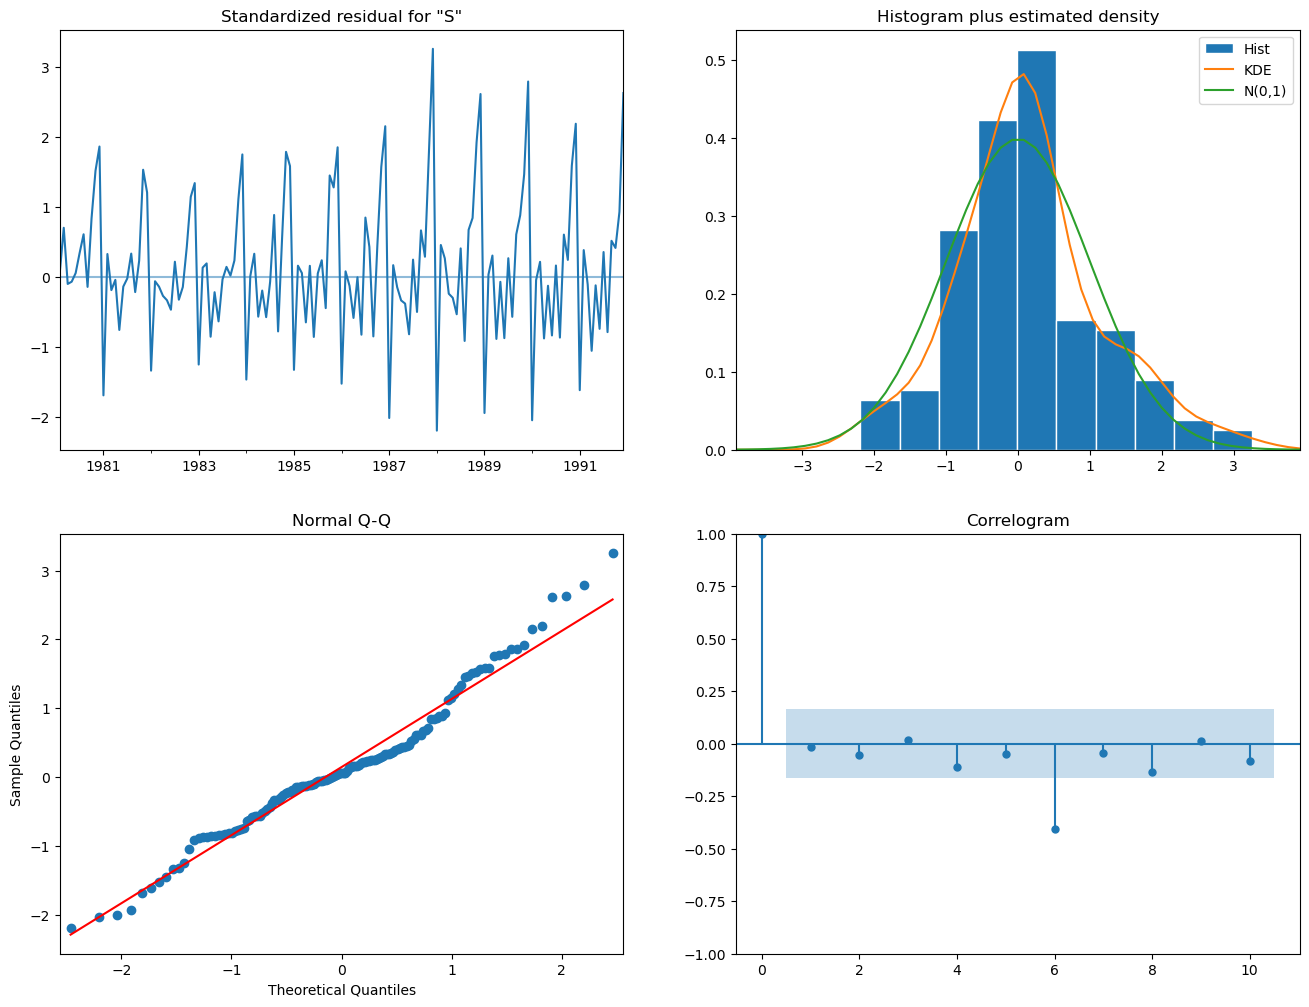

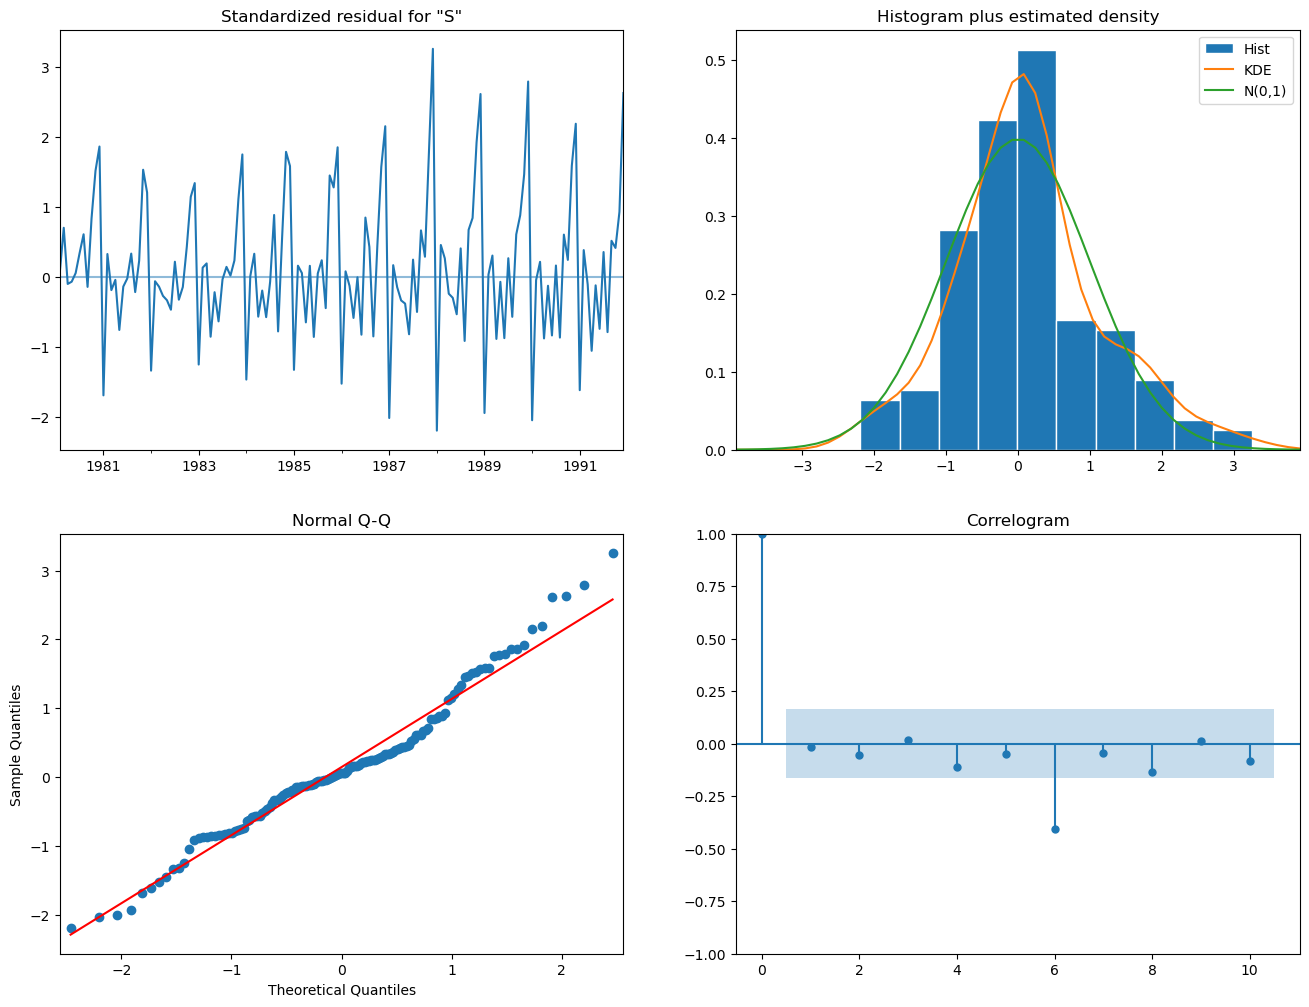

In [388]:
results_Manual_ARIMA.plot_diagnostics()

In [389]:
predicted_Manual_ARIMA = results_Manual_ARIMA.forecast(steps=len(test_sparkling))

In [390]:
RMSE_Manual_ARIMA=metrics.root_mean_squared_error(test_sparkling['Sparkling'],predicted_Manual_ARIMA)
print(RMSE_Manual_ARIMA)

1295.3711463576738


In [391]:
resultsDf_8=pd.DataFrame({'Test RMSE':[RMSE_Manual_ARIMA]},index=['Manual_ARIMA'])
resultsDf=pd.concat([resultsDf,resultsDf_8])
resultsDf

Test RMSE
Linear Regression                                   1356.624538
Simple Average Model                                1268.683035
2pointTrailingMovingAverage                          834.625762
4pointTrailingMovingAverage                         1169.865511
6pointTrailingMovingAverage                         1277.869178
8pointTrailingMovingAverage                         1329.140031
10pointTrailingMovingAverage                        1324.529863
Alpha =0.05 Simple Exponential Smoothing            1310.262407
Alpha =0.66 and Beta = 0.0001                       4773.351788
Alpha =0.075,Beta = 0.043 and Gamma = 0.445 TES...   368.571075
Alpha =0.076,Beta = 0.076 and Gamma =0.342 TES ...   347.346366
Auto_ARIMA                                          1309.634053
Manual_ARIMA                                        1295.371146

# Auto SARIMA

### From the ACF plot,it is clear that for every 12 months there is a significant change.Therefore seasonality =12

### To find the D for SARIMA Model

## Checking if the first order differencing makes it stationary

### First we calculate the first differencing and then shift to 12 as the seasonality from the ACF plot is 12
### First Difference: Removes the trend from the original series.
### Seasonal Difference: Removes the seasonal component after the trend has been removed.


In [392]:
First_diff = df_Sparkling1['Sparkling'].diff().dropna()
Seasonal_diff = First_diff - First_diff.shift(12)

In [393]:
seasonal_df=adfuller(Seasonal_diff.dropna())
print('DF test statistic is %3.3f' %seasonal_df[0])
print('DF test p-value is %1.4f' %seasonal_df[1])      
      

DF test statistic is -5.114
DF test p-value is 0.0000


### Since p value is less than 0.05 after first order seasonal differencing,we are proceeding with D=1

In [394]:
import itertools
p = range(0, 4)
q = range(0, 3)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)


In [395]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC


Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [396]:


for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_auto = sm.tsa.statespace.SARIMAX(train_sparkling['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model_auto.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = pd.concat([SARIMA_AIC, pd.DataFrame({'param': [param],
                                                             'seasonal': [param_seasonal],
                                                             'AIC': [results_SARIMA.aic]})],
                                   ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:2006.6539823811493


C:\Users\Abubacker Siddhique\AppData\Local\Temp\ipykernel_14356\484967953.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  SARIMA_AIC = pd.concat([SARIMA_AIC, pd.DataFrame({'param': [param],


SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:1808.3839722059106
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:1634.505494749647
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:1828.3116716395823
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:1809.6444260109545
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:1636.382100298909
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:1649.6777503580101
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:1650.2172254409722
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:1638.3167743440345
SARIMA(0, 1, 0)x(3, 1, 0, 12) - AIC:1471.18556428424
SARIMA(0, 1, 0)x(3, 1, 1, 12) - AIC:1473.1530854342939
SARIMA(0, 1, 0)x(3, 1, 2, 12) - AIC:1470.796423777972
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1936.5742996260688
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:1745.6364039736372
SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:1574.847338425894
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:1779.570872567776
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:1746.8508543090122
SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:1576.5571341996283
SARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:1604.5757376468944
SARIMA(0, 1, 1)x(

In [397]:
SARIMA_AIC.sort_values(by='AIC',ascending=True)

param       seasonal          AIC
129  (3, 1, 1)  (3, 1, 0, 12)  1390.803612
141  (3, 1, 2)  (3, 1, 0, 12)  1390.965334
130  (3, 1, 1)  (3, 1, 1, 12)  1392.747456
142  (3, 1, 2)  (3, 1, 1, 12)  1392.892464
143  (3, 1, 2)  (3, 1, 2, 12)  1393.614744
..         ...            ...          ...
12   (0, 1, 1)  (0, 1, 0, 12)  1936.574300
108  (3, 1, 0)  (0, 1, 0, 12)  1942.735624
72   (2, 1, 0)  (0, 1, 0, 12)  1961.879432
36   (1, 1, 0)  (0, 1, 0, 12)  1993.765192
0    (0, 1, 0)  (0, 1, 0, 12)  2006.653982

[144 rows x 3 columns]

In [398]:
SARIMA_model_auto1 = sm.tsa.statespace.SARIMAX(train_sparkling['Sparkling'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = SARIMA_model_auto1.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(3, 1, 1)x(3, 1, [], 12)   Log Likelihood                -687.402
Date:                             Fri, 31 May 2024   AIC                           1390.804
Time:                                     22:24:40   BIC                           1410.978
Sample:                                          0   HQIC                          1398.946
                                             - 144                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2177      0.129      1.690      0.091      -0.035       0.470
ar.L2         -0.1339      

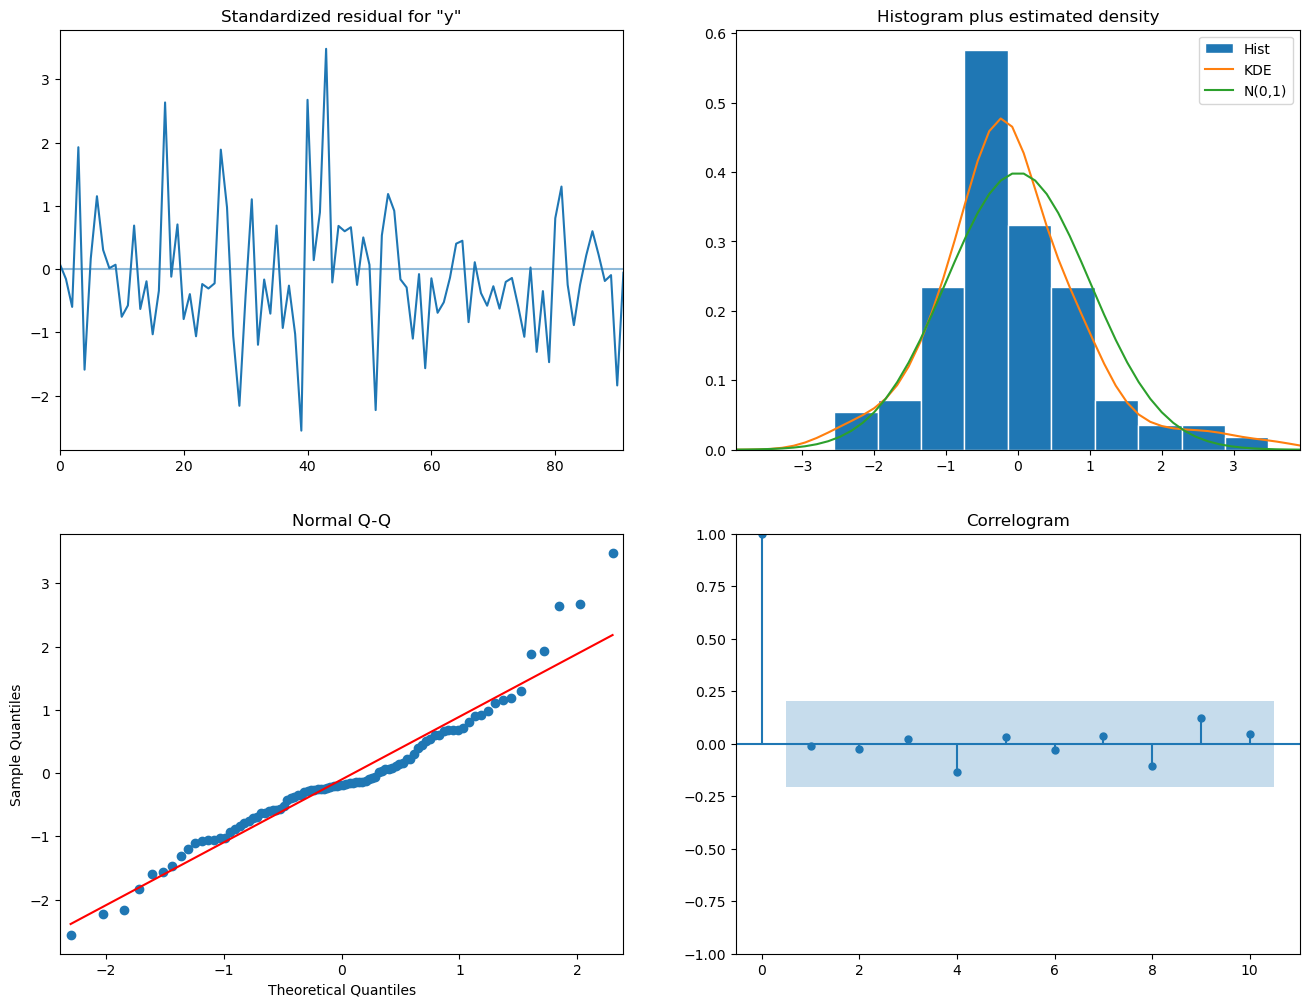

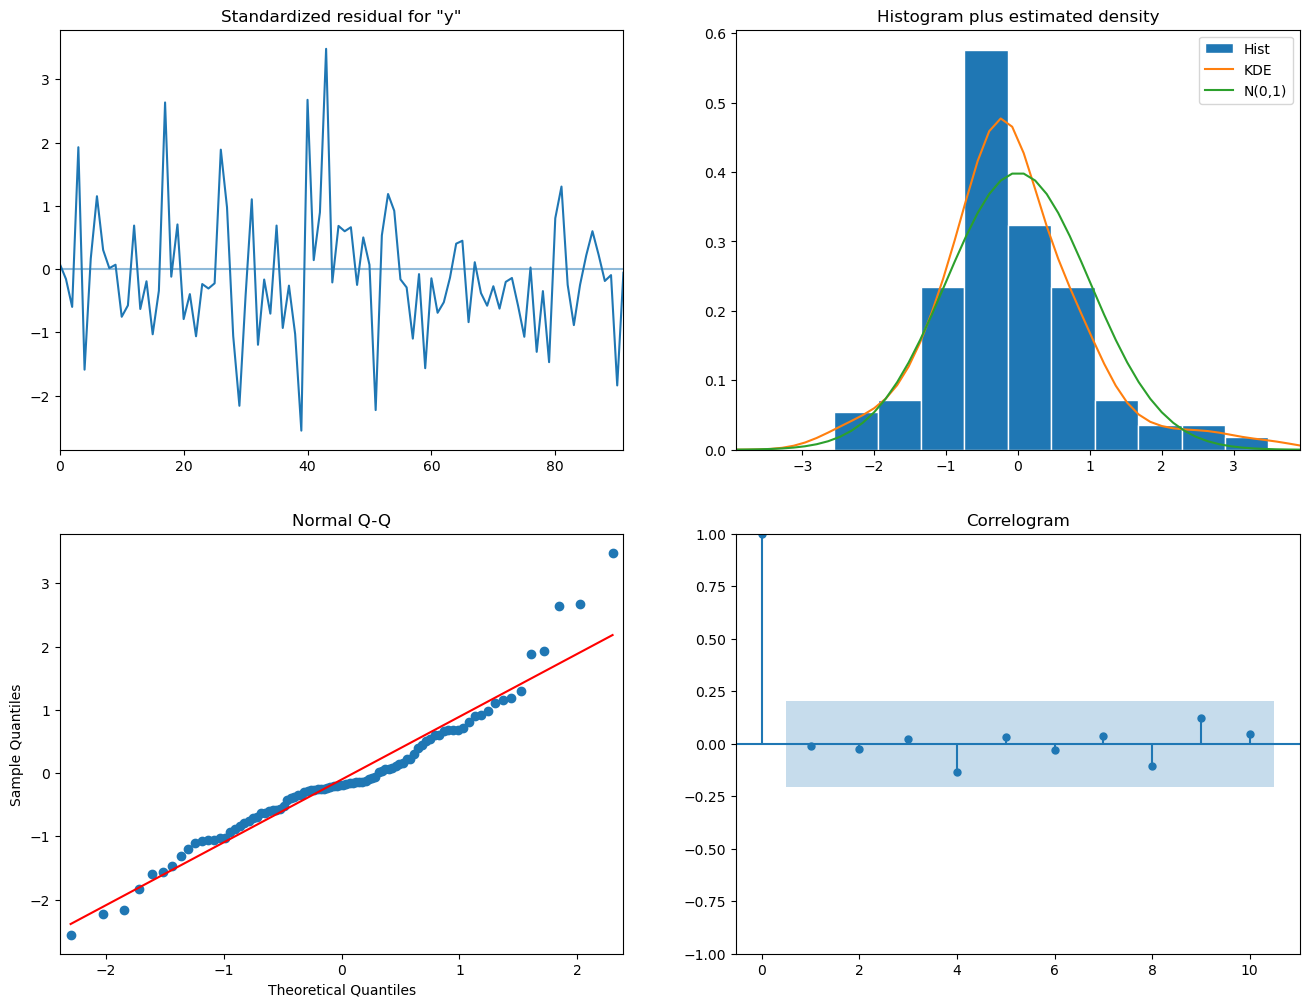

In [399]:
results_auto_SARIMA.plot_diagnostics()

In [400]:
predicted_Auto_SARIMA = results_auto_SARIMA.forecast(steps=len(test_sparkling))
RMSE_Auto_SARIMA=metrics.root_mean_squared_error(test_sparkling['Sparkling'],predicted_Auto_SARIMA)
print(RMSE_Auto_SARIMA)

344.6683449742621


In [401]:
resultsDf_10=pd.DataFrame({'Test RMSE':[RMSE_Auto_SARIMA]},index=['Auto_SARIMA'])
resultsDf=pd.concat([resultsDf,resultsDf_10])
resultsDf

Test RMSE
Linear Regression                                   1356.624538
Simple Average Model                                1268.683035
2pointTrailingMovingAverage                          834.625762
4pointTrailingMovingAverage                         1169.865511
6pointTrailingMovingAverage                         1277.869178
8pointTrailingMovingAverage                         1329.140031
10pointTrailingMovingAverage                        1324.529863
Alpha =0.05 Simple Exponential Smoothing            1310.262407
Alpha =0.66 and Beta = 0.0001                       4773.351788
Alpha =0.075,Beta = 0.043 and Gamma = 0.445 TES...   368.571075
Alpha =0.076,Beta = 0.076 and Gamma =0.342 TES ...   347.346366
Auto_ARIMA                                          1309.634053
Manual_ARIMA                                        1295.371146
Auto_SARIMA                                          344.668345

## Manual SARIMA

### Finding optimal P,Q values from PACF & ACF Plots

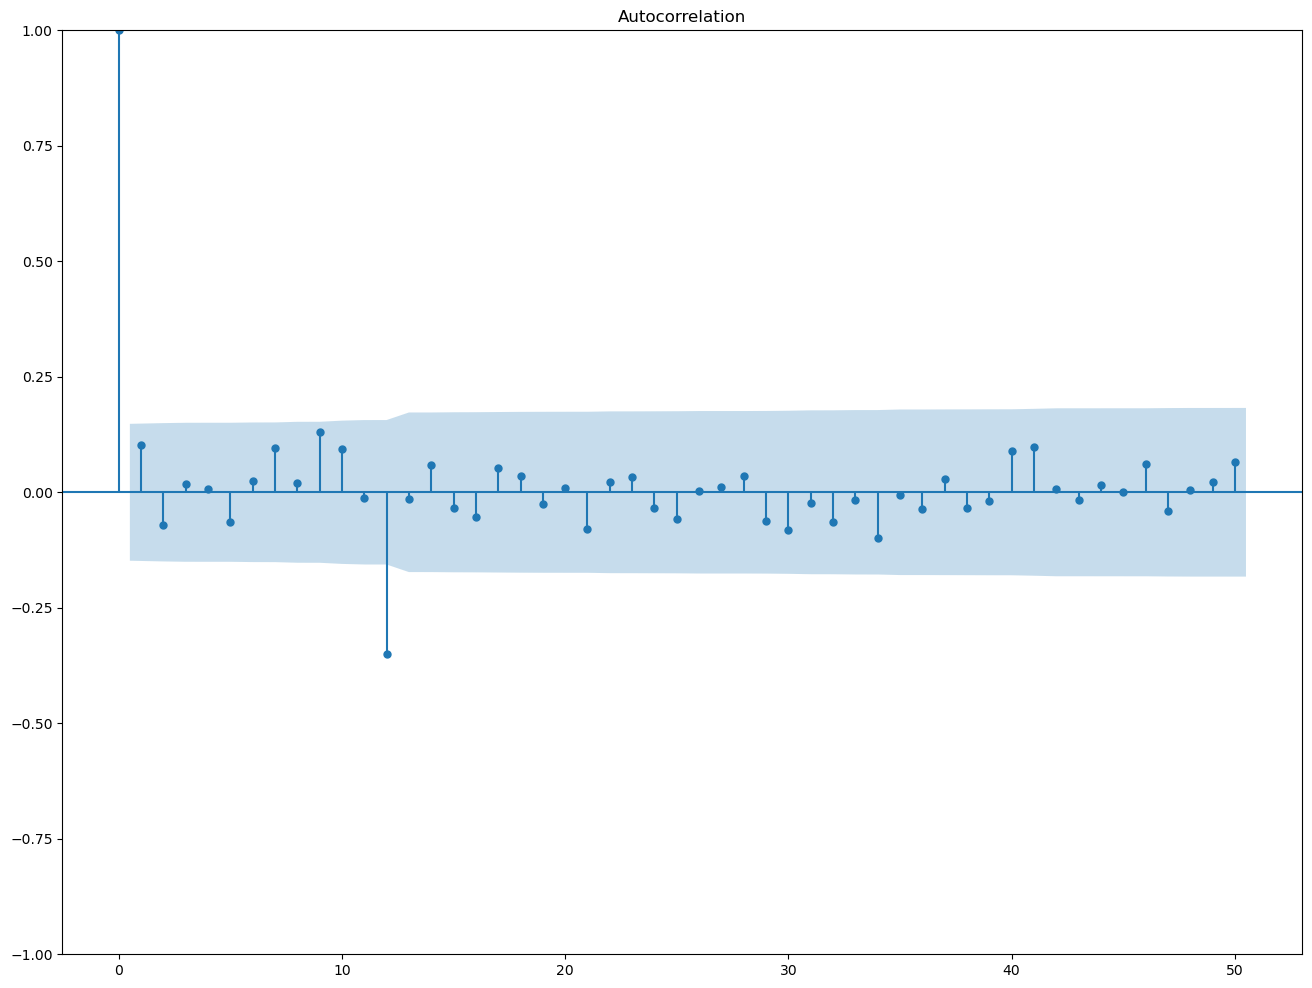

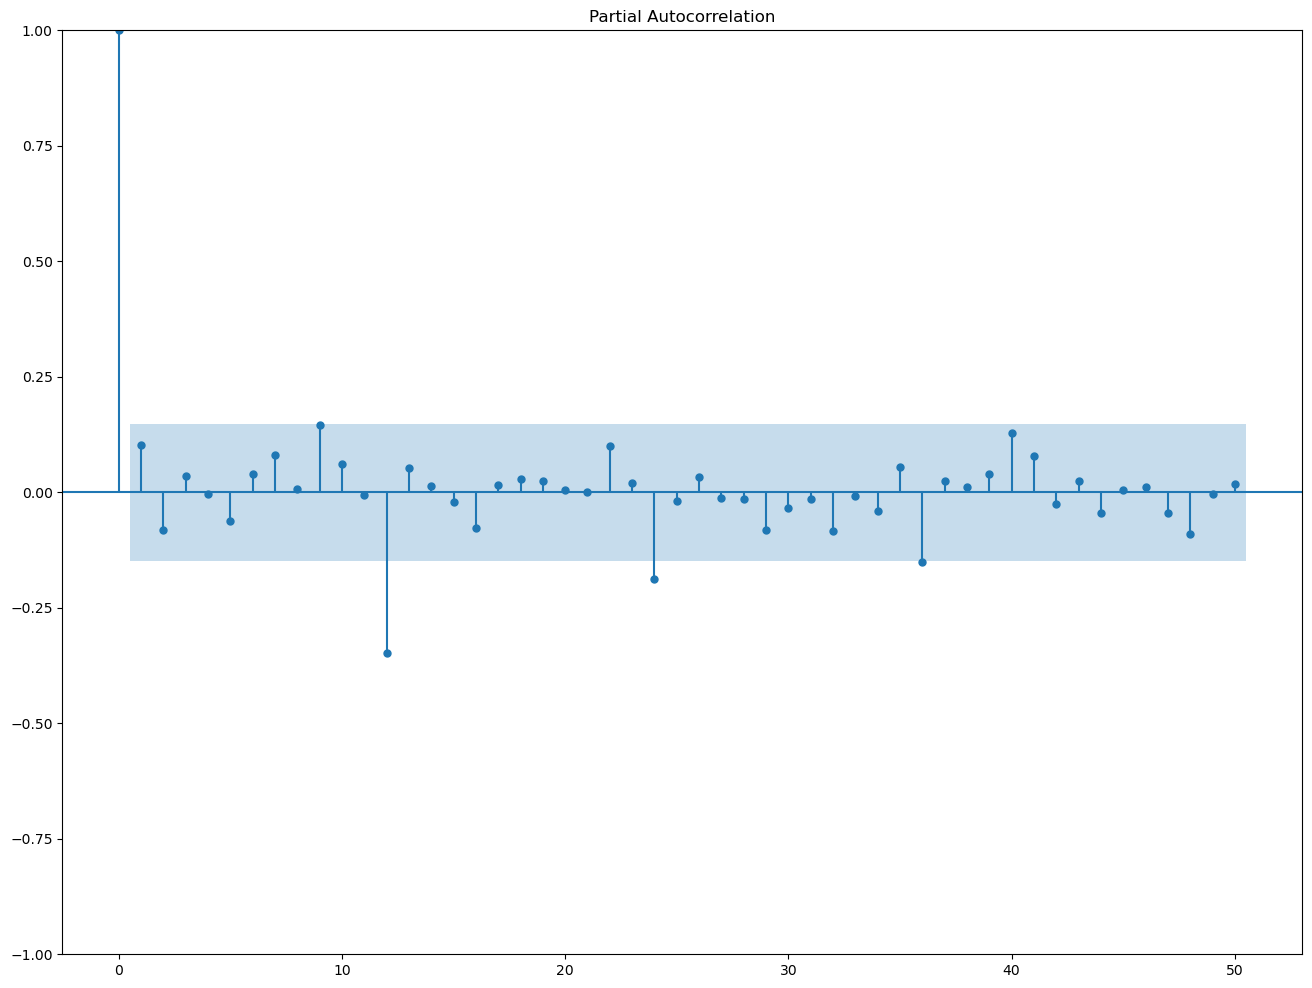

In [402]:
plot_acf((df_Sparkling1['Sparkling'].diff(12).dropna()),lags=50)
plot_pacf((df_Sparkling1['Sparkling'].diff(12).dropna()),lags=50);

### From the plot there is no significant correlation after Q=0,P=0

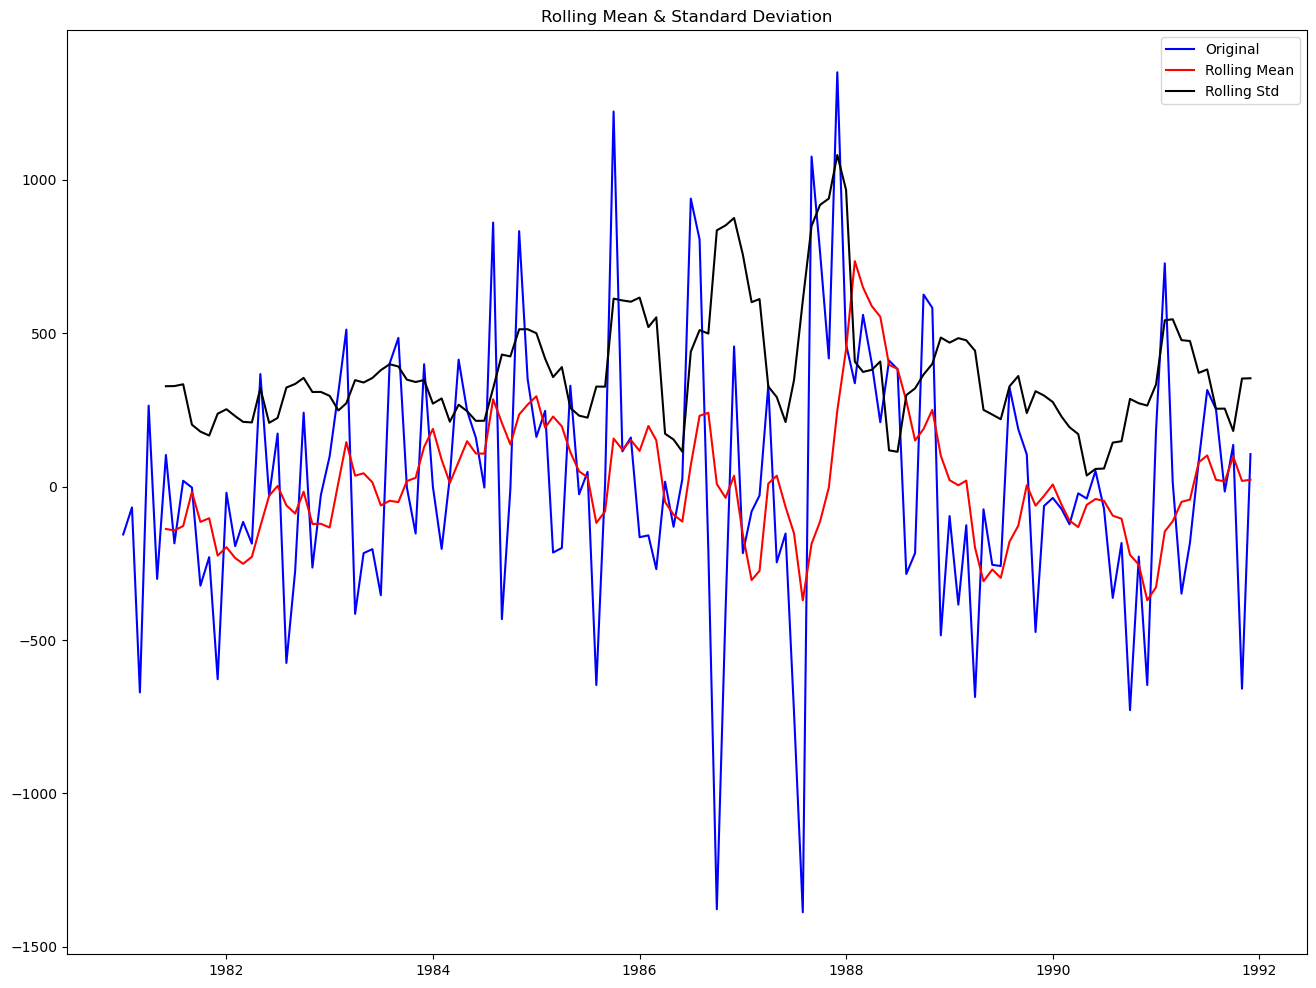

Results of Dickey-Fuller Test:
Test Statistic                -7.896401e+00
p-value                        4.299327e-12
#Lags Used                     1.000000e+00
Number of Observations Used    1.300000e+02
Critical Value (1%)           -3.481682e+00
Critical Value (5%)           -2.884042e+00
Critical Value (10%)          -2.578770e+00
dtype: float64 



In [403]:
test_stationarity((train_sparkling['Sparkling'].diff(12).dropna()))

### D=1

In [404]:
SARIMA_model_Manual = sm.tsa.statespace.SARIMAX(train_sparkling['Sparkling'].values,
                                order=(3,1,2),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_Manual_SARIMA = SARIMA_model_Manual.fit(maxiter=1000)
print(results_Manual_SARIMA.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(3, 1, 2)x(0, 1, [], 12)   Log Likelihood                -952.822
Date:                             Fri, 31 May 2024   AIC                           1917.644
Time:                                     22:24:47   BIC                           1934.756
Sample:                                          0   HQIC                          1924.597
                                             - 144                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6967      0.083     -8.439      0.000      -0.859      -0.535
ar.L2          0.1080      

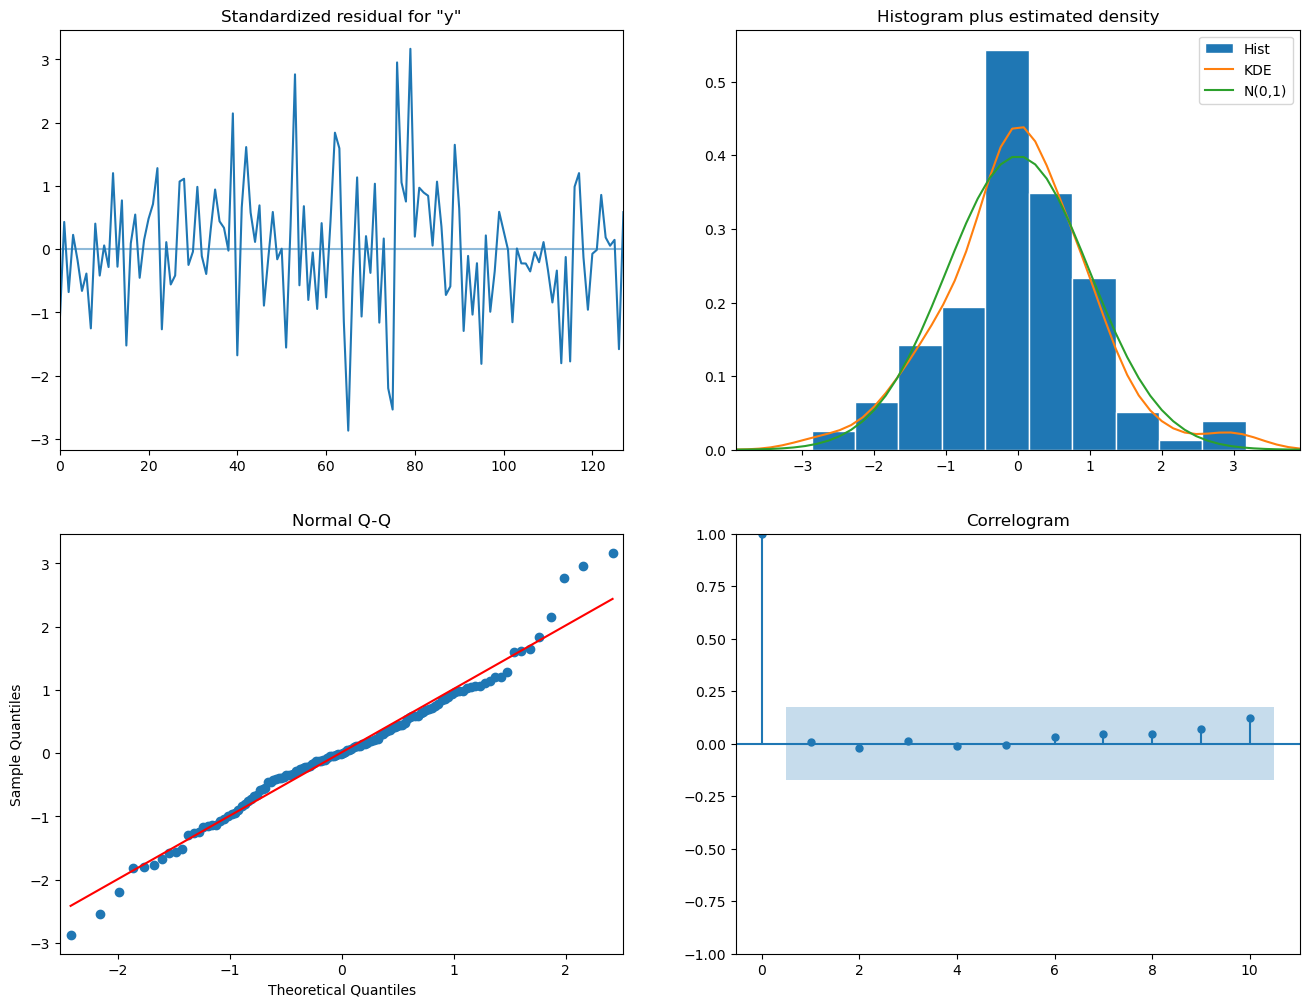

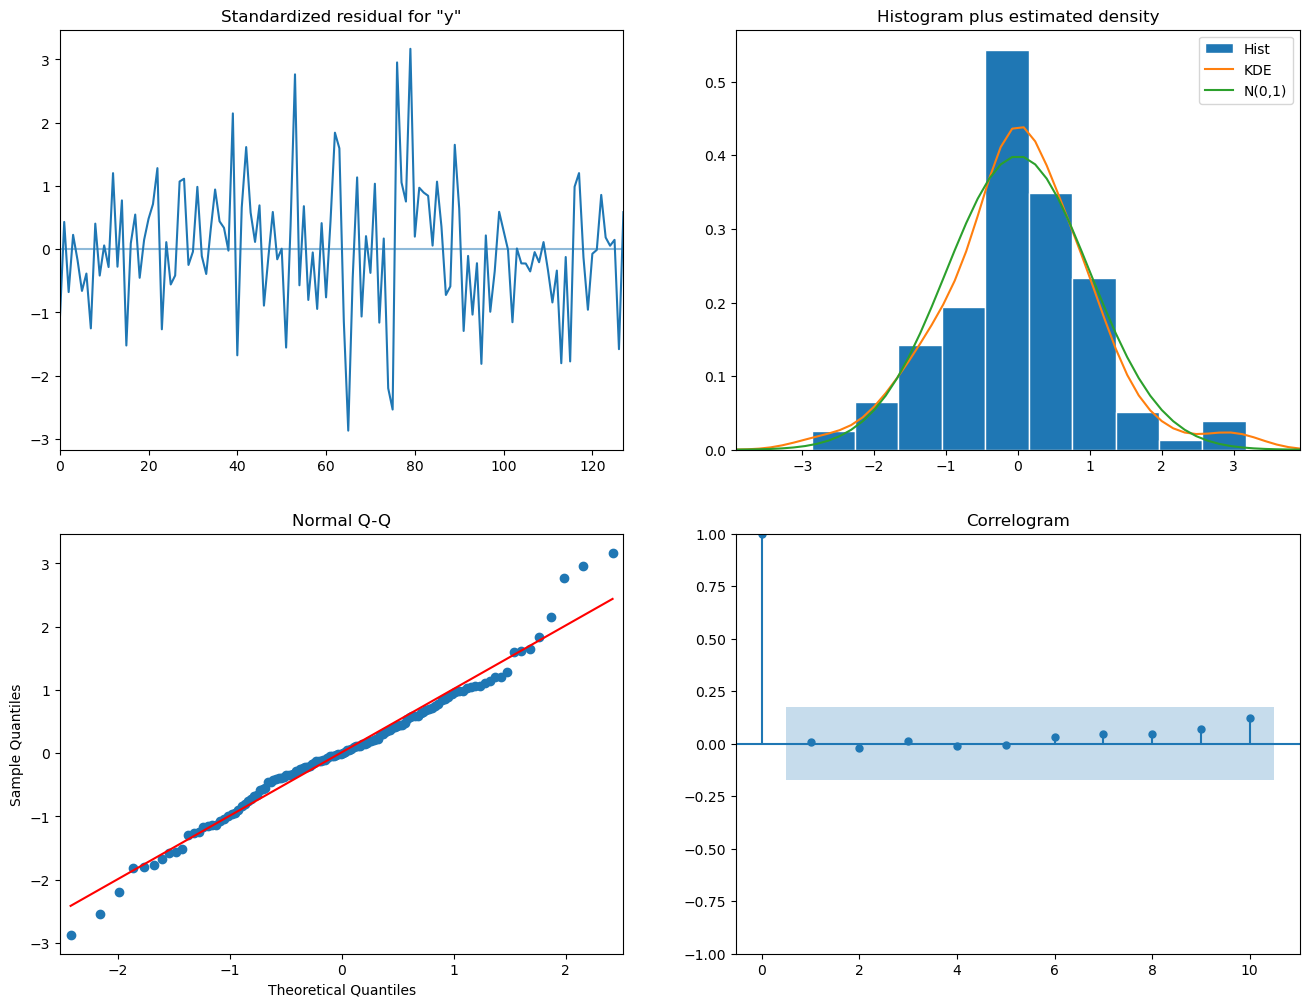

In [405]:
results_Manual_SARIMA.plot_diagnostics()

In [406]:
predicted_Manual_SARIMA = results_Manual_SARIMA.forecast(steps=len(test_sparkling))
RMSE_Manual_SARIMA=metrics.root_mean_squared_error(test_sparkling['Sparkling'],predicted_Manual_SARIMA)
print(RMSE_Manual_SARIMA)

424.89754301171155


In [407]:
resultsDf_11=pd.DataFrame({'Test RMSE':[RMSE_Manual_SARIMA]},index=['Manual_SARIMA'])
resultsDf=pd.concat([resultsDf,resultsDf_11])
resultsDf

Test RMSE
Linear Regression                                   1356.624538
Simple Average Model                                1268.683035
2pointTrailingMovingAverage                          834.625762
4pointTrailingMovingAverage                         1169.865511
6pointTrailingMovingAverage                         1277.869178
8pointTrailingMovingAverage                         1329.140031
10pointTrailingMovingAverage                        1324.529863
Alpha =0.05 Simple Exponential Smoothing            1310.262407
Alpha =0.66 and Beta = 0.0001                       4773.351788
Alpha =0.075,Beta = 0.043 and Gamma = 0.445 TES...   368.571075
Alpha =0.076,Beta = 0.076 and Gamma =0.342 TES ...   347.346366
Auto_ARIMA                                          1309.634053
Manual_ARIMA                                        1295.371146
Auto_SARIMA                                          344.668345
Manual_SARIMA                                        424.897543

In [408]:
resultsDf.sort_values(by='Test RMSE',ascending=True)

Test RMSE
Auto_SARIMA                                          344.668345
Alpha =0.076,Beta = 0.076 and Gamma =0.342 TES ...   347.346366
Alpha =0.075,Beta = 0.043 and Gamma = 0.445 TES...   368.571075
Manual_SARIMA                                        424.897543
2pointTrailingMovingAverage                          834.625762
4pointTrailingMovingAverage                         1169.865511
Simple Average Model                                1268.683035
6pointTrailingMovingAverage                         1277.869178
Manual_ARIMA                                        1295.371146
Auto_ARIMA                                          1309.634053
Alpha =0.05 Simple Exponential Smoothing            1310.262407
10pointTrailingMovingAverage                        1324.529863
8pointTrailingMovingAverage                         1329.140031
Linear Regression                                   1356.624538
Alpha =0.66 and Beta = 0.0001                       4773.351788

## Among the various model,the Auto SARIMA  has the least RMSE

## Building model on the whole dataset

In [409]:
fullmodel = sm.tsa.statespace.SARIMAX(df_Sparkling1['Sparkling'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_fullmodel = fullmodel.fit(maxiter=1000)
print(results_fullmodel.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  187
Model:             SARIMAX(3, 1, 1)x(3, 1, [], 12)   Log Likelihood               -1001.463
Date:                             Fri, 31 May 2024   AIC                           2018.927
Time:                                     22:24:55   BIC                           2042.169
Sample:                                          0   HQIC                          2028.372
                                             - 187                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1157      0.089      1.298      0.194      -0.059       0.290
ar.L2         -0.0820      

In [410]:
fullmodel_prediction_= results_fullmodel.get_forecast(steps=12)

In [411]:
fullmodel_prediction_.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1891.069403  402.096316    1102.975105    2679.163700
1  2473.030665  406.718116    1675.877806    3270.183525
2  3296.362311  406.874395    2498.903150    4093.821471
3  3857.620513  407.539448    3058.857872    4656.383154
4  6118.451496  408.055535    5318.677344    6918.225648

In [412]:
RMSE_fullmodel = metrics.root_mean_squared_error(df_Sparkling1['Sparkling'],results_fullmodel.fittedvalues)

print('RMSE:',RMSE_fullmodel)

RMSE: 547.126490707613


In [413]:
df_Sparkling1.tail()

Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [414]:
data_range=pd.date_range(start='1995-07-01',end='1996-07-01')

In [415]:
pred_full_manual_SARIMA= fullmodel_prediction_.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-07-01',end='1996-07-01', freq='M'))

In [416]:
pred_full_manual_SARIMA.index.name = 'Year/month'

In [417]:
pred_full_manual_SARIMA

y                  mean     mean_se  mean_ci_lower  mean_ci_upper
Year/month                                                       
1995-07-31  1891.069403  402.096316    1102.975105    2679.163700
1995-08-31  2473.030665  406.718116    1675.877806    3270.183525
1995-09-30  3296.362311  406.874395    2498.903150    4093.821471
1995-10-31  3857.620513  407.539448    3058.857872    4656.383154
1995-11-30  6118.451496  408.055535    5318.677344    6918.225648
1995-12-31  1198.509893  408.319079     398.219204    1998.800581
1996-01-31  1584.120086  408.613308     783.252718    2384.987454
1996-02-29  1838.038687  408.925559    1036.559320    2639.518055
1996-03-31  1846.216740  409.228600    1044.143422    2648.290058
1996-04-30  1678.517597  409.530092     875.853366    2481.181829
1996-05-31  1635.654199  409.832614     832.397035    2438.911363
1996-06-30  2013.290670  410.134836    1209.441163    2817.140178

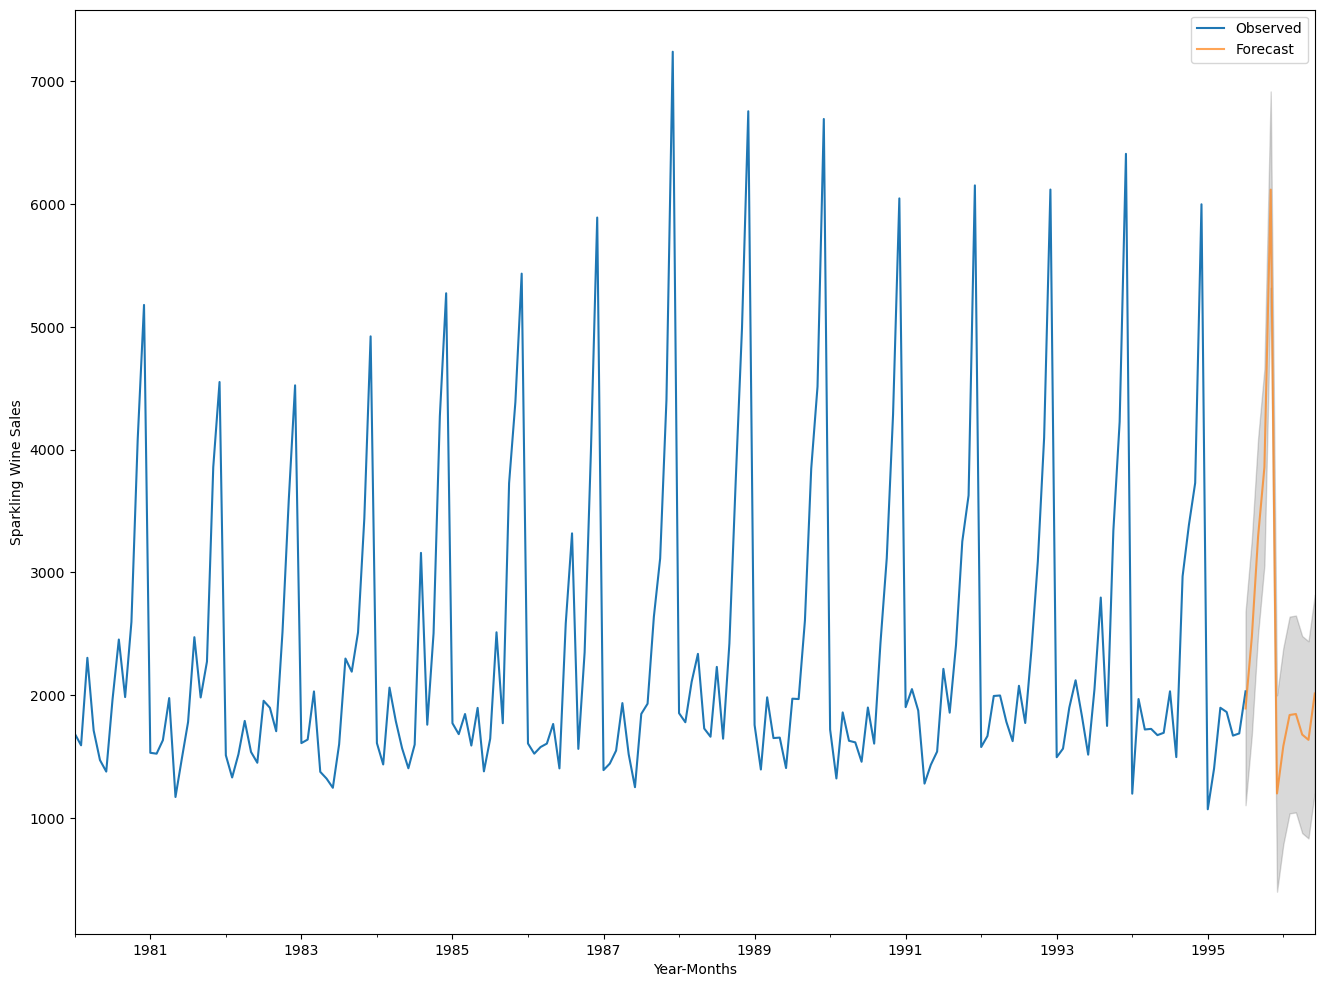

In [418]:
axis = df_Sparkling1['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA.index, pred_full_manual_SARIMA['mean_ci_lower'], 
                  pred_full_manual_SARIMA['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling Wine Sales')
plt.legend(loc='best')
plt.show()